# Setup

This setup is not necessary for the notebook, but shows how the setup of most cells is done. Each cell in the notebook is standalone.

In [3]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import RadioButtons
import math
from scipy.optimize import curve_fit

snapshot = 'm12i' # m12i or m12f or m12m

f = h5py.File(snapshot+"_darkmatter.hdf5", 'r')


#SYNTAX----------------------------------------
#For column : numpy_Array_name[  : ,column] 

#For row : numpy_Array_name[ row, :  ]
#----------------------------------------------

# get particle positions as N x 3 array
pos = np.array(f.get('position'))
x = pos[:,0]
y = pos[:,1]
z = pos[:,2]

# get particle velocities as N x 3 array
vel = np.array(f.get('velocity'))
vx = vel[:,0]
vy = vel[:,1]
vz = vel[:,2]



print('\n'*2)
print('Number of dark matter particles = ',np.shape(vel)[0])
print('\n'*2)


f.close()




Number of dark matter particles =  23019638





# Week 1

Here I created simple histograms for the speed and velocity of DM with some geometries.

## Distance and speed histograms for entire galaxy

(figures 1,2)

In [ ]:
%matplotlib inline
import h5py
import numpy as np
import matplotlib.pyplot as plt
import math

'''
Importing data and other stuff ===============================================================================================
'''
snapshot = 'm12i' # m12i or m12f or m12m

f = h5py.File(snapshot+"_darkmatter.hdf5", 'r')

# get particle positions (galaxy) as N x 3 array
pos = np.array(f.get('position'))
x = pos[:,0]
y = pos[:,1]
z = pos[:,2]

# get particle velocities (galaxy) as N x 3 array
vel = np.array(f.get('velocity'))
vx = vel[:,0]
vy = vel[:,1]
vz = vel[:,2]

radius = np.sqrt(x**2 + y**2)


#array_binned_mode() finds the peak in a histogram
def array_binned_mode(array, num_bins):
    freq, bins = np.histogram(array, bins=num_bins)
    return bins[np.where(freq==freq.max())[0]][0]
'''
==============================================================================================================================
'''

plt.hist(radius, bins=100, density=True)
plt.xlabel('distance from Galactic Center (kpc)')
plt.ylabel('proportion of DM particles')

print('Figure 1: A histogram presenting the proportion of dark matter particles at a given radius around the galaxy')

plt.show()

speed = np.sqrt(vx**2 + vy**2)

fig, ax = plt.subplots()

n, bins, patches = ax.hist(speed, bins=100, density=True)

v = np.linspace(bins[0], bins[-1], 1000)
v_max = array_binned_mode(speed, bins.size)

fv = ( (4*(v**2))/((v_max**3)*math.sqrt(math.pi)) ) * np.exp(-(v**2)/(v_max**2))

ax.plot(v, fv)
ax.set_xlabel('speed (km/s)')
ax.set_ylabel('proportion of DM particles')
print('Figure 2: A histogram presenting the proportion of dark matter particles at a given speed within 200 kpc of the Galactic Center')


plt.show()

print('\n'*5)

## Distance and speed histograms for annulus defined in xy-plane between 7 and 9 kpc from Galactic Center

(figures 3,4)

In [ ]:
%matplotlib inline
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

'''
Importing data and other stuff ===============================================================================================
'''
snapshot = 'm12i' # m12i or m12f or m12m

f = h5py.File(snapshot+"_darkmatter.hdf5", 'r')

# get particle positions (galaxy) as N x 3 array
pos = np.array(f.get('position'))
x = pos[:,0]
y = pos[:,1]
z = pos[:,2]

# get particle velocities (galaxy) as N x 3 array
vel = np.array(f.get('velocity'))
vx = vel[:,0]
vy = vel[:,1]
vz = vel[:,2]

#Earth_ring_filter filters for all DM particles that are between 7 and 9 kpc from Galactic Center

earth_ring_filter = np.logical_and( ( x**2 + y**2 < 81 ), ( x**2 + y**2 > 49 ))

ring_dm_pos = pos[earth_ring_filter]

ring_dm_x = ring_dm_pos[:,0]
ring_dm_y = ring_dm_pos[:,1]
ring_dm_z = ring_dm_pos[:,2]

ring_dm_vel = vel[earth_ring_filter]

ring_dm_vx = ring_dm_vel[:,0]
ring_dm_vy = ring_dm_vel[:,1]
ring_dm_vz = ring_dm_vel[:,2]

galaxy_radius = np.sqrt(ring_dm_x**2 + ring_dm_y**2)

'''
==============================================================================================================================
'''

#model adjusts the maxwellian distribution to acount for escape velocity
def model(v,v_0,p, A):
    v_esc = 523
    fit = A*(((v)**2)*np.exp(-v / v_0)*(np.abs(((v_esc)**2)-((v)**2)))**p)
    return fit

print("Below I use an annulus with an inner radius of 7 kpc and an outer radius of 9 kpc, on the xy plane. This is Earth's ring.","Number of dark matter particles in Earth's ring =",np.shape(ring_dm_pos)[0],'\n'*2)

plt.hist(galaxy_radius, bins=100, density=True)
plt.xlabel('distance from Galactic Center (kpc)')
plt.ylabel('proportion of DM particles')

print('Figure 3: A histogram presenting the proportion of dark matter particles at a given radius from Galactic Center.')

plt.show()

galaxy_speed = np.sqrt(ring_dm_vx**2 + ring_dm_vy**2)

fig, ax = plt.subplots()

n, bins, patches = ax.hist(galaxy_speed, bins=100, density=True)

n, bins = np.histogram(galaxy_speed, bins=100, density=True)

bins = np.array([0.5*(bins[i]+bins[i+1]) for i in range(len(bins)-1)])

ans, cov = curve_fit(model, bins, n, p0=[117,1.1,5e-13], maxfev = 2000)

print(ans)

#I had some issues with curve fitting as some initial test variables for v_esc gave v_esc^2 - v^2 < 0.
#Initialising p0 with proper values fixed this.

v = np.linspace(bins[0], bins[-1], 1000)

fv = model(v, *ans)

ax.plot(v, fv)
ax.set_xlabel('speed (km/s)')
ax.set_ylabel('proportion of DM particles')
print('Figure 4: A histogram presenting the proportion of dark matter particles with a given speed between 7 and 9 kpc from Galactic Center.')

plt.show()

print('\n'*5)

## Histograms heavily influenced by spherical geometry (impractical)

(figures 5,6)

In [ ]:
%matplotlib inline
import h5py
import numpy as np
import matplotlib.pyplot as plt

'''
Importing data and other stuff ===============================================================================================
'''
snapshot = 'm12i' # m12i or m12f or m12m

f = h5py.File(snapshot+"_darkmatter.hdf5", 'r')

# get particle positions (galaxy) as N x 3 array
pos = np.array(f.get('position'))
x = pos[:,0]
y = pos[:,1]
z = pos[:,2]

# get particle velocities (galaxy) as N x 3 array
vel = np.array(f.get('velocity'))
vx = vel[:,0]
vy = vel[:,1]
vz = vel[:,2]

pos_filter = (x-8)**2 + y**2 < 1

close_dm_pos = pos[pos_filter]

close_dm_x = close_dm_pos[:,0]
close_dm_y = close_dm_pos[:,1]
close_dm_z = close_dm_pos[:,2]

close_dm_vel = vel[pos_filter]

close_dm_vx = close_dm_vel[:,0]
close_dm_vy = close_dm_vel[:,1]
close_dm_vz = close_dm_vel[:,2]

earth_radius = np.sqrt((close_dm_x-8)**2 + close_dm_y**2)

'''
==============================================================================================================================
'''

plt.hist(earth_radius, bins=20, density=True)
plt.xlabel('distance from Earth (kpc)')
plt.ylabel('proportion of DM particles')

print('Below I use a spherical geometry, filtering for all DM particles within 1 kpc of Earth. Number of dark matter particles within 1 kpc of Earth =',str(np.shape(close_dm_pos)[0]) + '.' + '\n'*2)

plt.title('Figure 5: A histogram presenting the number of dark matter particles at a given radius around Earth.')

plt.show()


earth_speed = np.sqrt(close_dm_vx**2 + close_dm_vy**2 + close_dm_vz**2)

plt.hist(earth_speed, bins=20, density=True)
plt.xlabel('speed (km/s)')
plt.ylabel('proportion of DM particles')

plt.title('Figure 6: A histogram presenting the proportion of dark matter particles at a given speed within 1 kpc of Earth.')

plt.show()

## Distance and speed histograms for torus between 7 and 9 kpc from Galactic Center

(figures 7,8)

In [ ]:
%matplotlib inline
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

'''
Importing data and other stuff ===============================================================================================
'''
snapshot = 'm12i' # m12i or m12f or m12m

f = h5py.File(snapshot+"_darkmatter.hdf5", 'r')

# get particle positions (galaxy) as N x 3 array
pos = np.array(f.get('position'))
x = pos[:,0]
y = pos[:,1]
z = pos[:,2]

# get particle velocities (galaxy) as N x 3 array
vel = np.array(f.get('velocity'))
vx = vel[:,0]
vy = vel[:,1]
vz = vel[:,2]

#Earth_radius_noG_filter filters for all DM particles in a region between 7 and 9 kpc from Galactic Center and with a constant
#arc length (along x^2 + y^2 = r^2) of 2 kpc.

#The geometry is derived in my written notes and visualised in https://www.desmos.com/calculator/zs9gyap3gc

Earth_radius_noG_filter = np.logical_and(
    np.logical_and( ( x**2 + y**2 < 81 ), ( x**2 + y**2 > 49 ) ),
    np.sqrt(x**2 + y**2) / np.sqrt( (np.tan(1 / np.sqrt(x**2 + y**2)))**2 + 1 ) <= x
)

local_dm_ring_pos = pos[Earth_radius_noG_filter]

local_dm_ring_x = local_dm_ring_pos[:,0]
local_dm_ring_y = local_dm_ring_pos[:,1]
local_dm_ring_z = local_dm_ring_pos[:,2]

local_dm_ring_vel = vel[Earth_radius_noG_filter]

local_dm_ring_vx = local_dm_ring_vel[:,0]
local_dm_ring_vy = local_dm_ring_vel[:,1]
local_dm_ring_vz = local_dm_ring_vel[:,2]

constant_arc_radius = np.sqrt(local_dm_ring_x**2 + local_dm_ring_y**2)

constant_arc_speed = np.sqrt(local_dm_ring_vx**2 + local_dm_ring_vy**2)

#model adjusts the maxwellian distribution to acount for escape velocity
def model(v,v_0,p, A):
    v_esc = 495
    fit = A*(((v)**2)*np.exp(-v / v_0)*(np.abs(((v_esc)**2)-((v)**2)))**p)
    return fit

'''
==============================================================================================================================
'''



plt.hist(constant_arc_radius, bins=50, density=True)
plt.xlabel('distance from Galactic Center (kpc)')
plt.ylabel('proportion of DM particles')

print('Below I use a geometry with constant arc length of 2 kpc, filtering for particles local to Earth.','Number of dark matter particles in geometry =',np.shape(local_dm_ring_pos)[0], '\n'*2)

plt.title('Figure 7: A histogram presenting the number of dark matter particles between 7 and 9 kpc from Galactic Center and local to Earth.')

plt.show()

fig, ax = plt.subplots()

n, bins, patches = ax.hist(constant_arc_speed, bins=50, density=True)

n, bins = np.histogram(constant_arc_speed, bins=100, density=True)

bins = np.array([0.5*(bins[i]+bins[i+1]) for i in range(len(bins)-1)])

ans, cov = curve_fit(model, bins, n, p0=[777,0.4,5e-9], maxfev = 2000)

#I had some issues with curve fitting as some initial test variables for v_esc gave v_esc^2 - v^2 < 0.
#Initialising p0 with proper values fixed this.

v = np.linspace(bins[0], bins[-1], 1000)

fv = model(v, *ans)

ax.plot(v, fv)
ax.set_xlabel('speed (km/s)')
ax.set_ylabel('proportion of DM particles')

plt.title('Figure 8: A histogram presenting the number of dark matter particles at a given speed between 7 and 9 kpc from Galactic Center and local to Earth.')

plt.show()

print('\n'*5)

## Comments on data

In [ ]:
#Some comments:

# No significant deviations have been noticed across each galaxy similation.

# Whether the z-distance is included or not, the graphs appear mostly the
# same(as long as I am consistent with using z-distance or not).

# No significant deviations have been noticed around Earth in comparison to Earth's ring.

# No deviations occur in speed in the local image compared to the global image.

# m12m has a greater peak in speed (just over 200 km/s) in comparison to m12i and m12f (both just under 200 km/s).

# I need to be careful of how I work with the geometries I define. These 
# can produce some interesting graphs that speak more of the geometry than DM itself.

# Week 2

Here we have 2D histograms and the introduction of vR and vPhi.

## Histograms for speed and radius of DM particles

(figures 9,10)

In [ ]:
%matplotlib inline
import h5py
import numpy as np
import math
import matplotlib.pyplot as plt


'''
Importing data and other stuff ===============================================================================================
'''
snapshot = 'm12i' # m12i or m12f or m12m

f = h5py.File(snapshot+"_darkmatter.hdf5", 'r')

# get particle positions (galaxy) as N x 3 array
pos = np.array(f.get('position'))
x = pos[:,0]
y = pos[:,1]
z = pos[:,2]

# get particle velocities (galaxy) as N x 3 array
vel = np.array(f.get('velocity'))
vx = vel[:,0]
vy = vel[:,1]
vz = vel[:,2]

def array_binned_mode(array, num_bins):
    freq, bins = np.histogram(array, bins=num_bins)
    return bins[np.where(freq==freq.max())[0]][0]

'''
==============================================================================================================================
'''


sphere_radius = np.sqrt(x**2 + y**2 + y**2)

plt.hist(sphere_radius, bins=100, density=True)
plt.xlabel('distance from Galactic Center (kpc)')
plt.ylabel('proportion of DM particles')

plt.title('Figure 9: A histogram presenting the proportion of dark matter particles at a given radius around the galaxy')

plt.show()

sphere_speed = np.sqrt(vx**2 + vy**2 + vz**2)

fig, ax = plt.subplots()

n, bins, patches = ax.hist(sphere_speed, bins=100, density=True)

v = np.linspace(bins[0], bins[-1], 1000)
v_max = array_binned_mode(sphere_speed, bins.size)

fv = ( (4*(v**2))/((v_max**3)*math.sqrt(math.pi)) ) * np.exp(-(v**2)/(v_max**2))

ax.plot(v, fv)
ax.set_xlabel('speed (km/s)')
ax.set_ylabel('proportion of DM particles')

plt.title('Figure 10: A histogram presenting the proportion of dark matter particles at a given speed within 200 kpc of the Galactic Center')

plt.show()


print('\n'*5)

## Random stuff below

In [ ]:
%matplotlib inline

# The peak in figure 11 of m12f occurs at heights of 3.88703618e-03 , 3.90376344e-03 , and 3.83952579e-03

# print(n)

# print('The smaller peak in figure 11 of m12f occurs between bins',
#       np.where(np.round(n, 6)== float(0.003887))[0][0],
#       'and',
#       np.where(np.round(n, 6) == float(0.003840))[0][0],
#       'with speeds between',
#       bins[np.where(np.round(n, 6)== float(0.003887))[0]][0],
#       'and',
#       bins[np.where(np.round(n, 6) == float(0.003840))[0]][0]
#      )

from matplotlib.colors import LogNorm

# my_cmap='Blues'

# second_peak_filter = np.logical_and(speed > bins[np.where(np.round(n, 6)== float(0.003887))[0]][0], speed < bins[np.where(np.round(n, 6) == float(0.003840))[0]])

# filter_x = x[second_peak_filter]
# filter_y = y[second_peak_filter]

# h = plt.hist2d(filter_x,filter_y, norm=LogNorm(), cmap=my_cmap, bins=100)
# plt.xlabel("x coordinate (kpc)")
# plt.ylabel("y coordinate (kpc)")
# print('Figure Unnumbered: Number of DM particles at a given position.')

# plt.colorbar(h[3])
# plt.show()

## Speed and position histograms for torus between 7 and 9 kpc from Galactic Center

(figures 11,12)

In [ ]:
%matplotlib notebook
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

'''
Importing data & setup =======================================================================================================
'''
snapshot = 'm12i' # m12i or m12f or m12m

f = h5py.File(snapshot+"_darkmatter.hdf5", 'r')

# get particle positions (galaxy) as N x 3 array
pos = np.array(f.get('position'))
x = pos[:,0]
y = pos[:,1]
z = pos[:,2]

# get particle velocities (galaxy) as N x 3 array
vel = np.array(f.get('velocity'))
vx = vel[:,0]
vy = vel[:,1]
vz = vel[:,2]

costheta = x/np.sqrt(x**2 + y**2)
sintheta = y/np.sqrt(x**2 + y**2)

earth_ring_filter = ( (x-8*costheta)**2 + (y-8*sintheta)**2+z**2 <= 1 )

ring_dm_pos = pos[earth_ring_filter]

ring_dm_x = ring_dm_pos[:,0]
ring_dm_y = ring_dm_pos[:,1]
ring_dm_z = ring_dm_pos[:,2]

ring_dm_vel = vel[earth_ring_filter]

ring_dm_vx = ring_dm_vel[:,0]
ring_dm_vy = ring_dm_vel[:,1]
ring_dm_vz = ring_dm_vel[:,2]

galaxy_sphere_radius = np.sqrt(ring_dm_x**2 + ring_dm_y**2 + ring_dm_z**2)

'''
==============================================================================================================================
'''


#model adjusts the maxwellian distribution to acount for escape velocity
def model(v,v_0,p,v_esc, A):
    fit = A*(((v)**2)*np.exp(-v / v_0)*(((v_esc)**2)-((v)**2))**p)
    return fit

print("Below I use a torus with an inner radius of 7 kpc and an outer radius of 9 kpc, on the xy plane. This is Earth's ring.","Number of dark matter particles in Earth's ring =",np.shape(ring_dm_pos)[0],'\n'*2)

plt.hist(galaxy_sphere_radius, bins=100, density=True)
plt.xlabel('distance from Galactic Center (kpc)')
plt.ylabel('proportion of DM particles')

plt.title("""Figure 11: A histogram presenting the proportion of dark matter
particles at a given radius from Galactic Center.""")

plt.show()

galaxy_sphere_speed = np.sqrt(ring_dm_vx**2 + ring_dm_vy**2 + ring_dm_vz**2)

fig, ax = plt.subplots()

n, bins, patches = ax.hist(galaxy_sphere_speed, bins=100, density=True)

n, bins = np.histogram(galaxy_sphere_speed, bins=100, density=True)

bins = np.array([0.5*(bins[i]+bins[i+1]) for i in range(len(bins)-1)])

ans, cov = curve_fit(model, bins, n, p0=[928,2.32,537, 2.7e-20], maxfev = 2000)

#I had some issues with curve fitting as some initial test variables for v_esc gave v_esc^2 - v^2 < 0.
#Initialising p0 with proper values fixed this.

v = np.linspace(bins[0], bins[-1], 1000)

fv = model(v, *ans)

ax.plot(v, fv)
ax.set_xlabel('speed (km/s)')
ax.set_ylabel('proportion of DM particles')

ax.set_title("""Figure 12: A histogram presenting the proportion of dark matter
particles with a given speed between 7 and 9 kpc from Galactic Center.""")

plt.show()

print('\n'*5)

## Introducing radial and tangential velocity with histograms:

 a) Histogram of radial velocity
 
 b) Histogram of tangential velocity
 
 (figures 13,14)

In [ ]:
%matplotlib inline
import h5py
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

'''
Importing data ===============================================================================================================
'''
snapshot = 'm12i' # m12i or m12f or m12m

f = h5py.File(snapshot+"_darkmatter.hdf5", 'r')

# get particle positions (galaxy) as N x 3 array
pos = np.array(f.get('position'))
x = pos[:,0]
y = pos[:,1]
z = pos[:,2]

# get particle velocities (galaxy) as N x 3 array
vel = np.array(f.get('velocity'))
vx = vel[:,0]
vy = vel[:,1]
vz = vel[:,2]

vR = (vx*x+vy*y)/np.sqrt(x**2 + y**2)

vPhi = (x*vy - y*vx)/np.sqrt(x**2 + y**2)

#vPhi > 0 means clockwise rotation

'''
==============================================================================================================================
'''


_, bins, _ = plt.hist(vR, bins=100, density=True)
mu, sigma = scipy.stats.norm.fit(vR)
best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line)
plt.xlabel("Radial Velocity (km/s)")
plt.ylabel("proportion of DM particles")
print('Figure 13: Proportion of DM particles with a given\nradial velocity (positive denotes outwards, negative\nis inwards)')

plt.show()

print("Average radial velocity:", np.sum(vR)/vR.size,'\n'*2)


_, bins, _ = plt.hist(vPhi, bins=100, density=True)
mu, sigma = scipy.stats.norm.fit(vPhi)
best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line)
plt.xlabel("Tangential Velocity (km/s)")
plt.ylabel("proportion of DM particles")
print('Figure 14: Proportion of DM particles with a given\ntangential velocity (positive denotes clockwise,\nnegative is anticlockwise)')

plt.show()

print("Average tangential velocity:", np.sum(vPhi)/vPhi.size,'\n'*2)

## Velocity and position data over entire galaxy

(figures 15,16,17,18)

In [ ]:
%matplotlib widget
import h5py
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats
from matplotlib.colors import LogNorm

'''
Importing data ===============================================================================================================
'''
snapshot = 'm12i' # m12i or m12f or m12m

f = h5py.File(snapshot+"_darkmatter.hdf5", 'r')

# get particle positions (galaxy) as N x 3 array
pos = np.array(f.get('position'))
x = pos[:,0]
y = pos[:,1]
z = pos[:,2]

# get particle velocities (galaxy) as N x 3 array
vel = np.array(f.get('velocity'))
vx = vel[:,0]
vy = vel[:,1]
vz = vel[:,2]

vR = (vx*x+vy*y)/np.sqrt(x**2 + y**2)

vPhi = (x*vy - y*vx)/np.sqrt(x**2 + y**2)
#vPhi > 0 means clockwise rotation


speed = np.sqrt(vx**2 + vy**2 + vz**2)

radius = np.sqrt(x**2 + y**2)
'''
==============================================================================================================================
'''

my_cmap='Blues'

print('Below we look at the data for the entire galaxy')

h = plt.hist2d(x,y, norm=LogNorm(), cmap=my_cmap, bins=1000)
plt.xlabel("x coordinate (kpc)")
plt.ylabel("y coordinate (kpc)")
print('Figure 15: Number of DM particles at a given position.')

plt.colorbar(h[3])
plt.show()

In [ ]:
%matplotlib inline
import h5py
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats
from matplotlib.colors import LogNorm

'''
Importing data ===============================================================================================================
'''
snapshot = 'm12i' # m12i or m12f or m12m

f = h5py.File(snapshot+"_darkmatter.hdf5", 'r')

# get particle positions (galaxy) as N x 3 array
pos = np.array(f.get('position'))
x = pos[:,0]
y = pos[:,1]
z = pos[:,2]

# get particle velocities (galaxy) as N x 3 array
vel = np.array(f.get('velocity'))
vx = vel[:,0]
vy = vel[:,1]
vz = vel[:,2]

vR = (vx*x+vy*y)/np.sqrt(x**2 + y**2)

vPhi = (x*vy - y*vx)/np.sqrt(x**2 + y**2)
#vPhi > 0 means clockwise rotation


speed = np.sqrt(vx**2 + vy**2 + vz**2)

radius = np.sqrt(x**2 + y**2)
'''
==============================================================================================================================
'''

my_cmap='Blues'

print('Below we look at the data for the entire galaxy')

h = plt.hist2d(x,y, norm=LogNorm(), cmap=my_cmap, bins=100)
plt.xlabel("x coordinate (kpc)")
plt.ylabel("y coordinate (kpc)")
print('Figure 15: Number of DM particles at a given position.')

plt.colorbar(h[3])
plt.show()


h = plt.hist2d(x[speed > 600],y[speed > 600], norm=LogNorm(), cmap=my_cmap, bins=20)

plt.xlabel("x coordinate (kpc)")
plt.ylabel("y coordinate (kpc)")
print('Number of DM particles at a given position with speed > 600 km/s.')

plt.colorbar(h[3])
plt.show()

h = plt.hist2d(radius,z, norm=LogNorm(), cmap=my_cmap, bins=100)
plt.xlabel("distance from Galactic center in x-y plane (kpc)")
plt.ylabel("z coordinate (kpc)")
print('Figure 16: Number of DM particles at a given position.')

plt.colorbar(h[3])
plt.show()

h = plt.hist2d(vR,vPhi, norm=LogNorm(), cmap=my_cmap, bins=100)
plt.xlabel("radial velocity (km/s)")
plt.ylabel("tangential velocity (km/s)")
print('Figure 17: Number of DM particles at a given radial and tangential velocity.')

plt.colorbar(h[3])
plt.show()


h = plt.hist2d(vx,vy, norm=LogNorm(), cmap=my_cmap, bins=100)
plt.xlabel("vx (km/s)")
plt.ylabel("vy (km/s)")
print('Figure 18: Number of DM particles at a given vx and vy.')

plt.colorbar(h[3])
plt.show()


## Velocities for data in torus from 7 kpc to 9 kpc of Galactic Center

(figures 19,20)

In [ ]:
%matplotlib inline
import h5py
import numpy as np
import matplotlib.pyplot as plt


'''
Filtering for data within torus from 7 to 9 kpc from Galactic Center =========================================================
'''
snapshot = 'm12i' # m12i or m12f or m12m

f = h5py.File(snapshot+"_darkmatter.hdf5", 'r')

# get particle positions (galaxy) as N x 3 array
pos = np.array(f.get('position'))
x = pos[:,0]
y = pos[:,1]
z = pos[:,2]

# get particle velocities (galaxy) as N x 3 array
vel = np.array(f.get('velocity'))
vx = vel[:,0]
vy = vel[:,1]
vz = vel[:,2]

vR = (vx*x+vy*y)/np.sqrt(x**2 + y**2)

vPhi = (x*vy - y*vx)/np.sqrt(x**2 + y**2)
#vPhi > 0 means clockwise rotation


costheta = x/np.sqrt(x**2 + y**2)
sintheta = y/np.sqrt(x**2 + y**2)

earth_ring_filter = ( (x-8*costheta)**2 + (y-8*sintheta)**2+z**2 <= 1 )

ring_dm_pos = pos[earth_ring_filter]

ring_dm_x = ring_dm_pos[:,0]
ring_dm_y = ring_dm_pos[:,1]
ring_dm_z = ring_dm_pos[:,2]

ring_dm_radius = np.sqrt(ring_dm_x**2 + ring_dm_y**2)

ring_dm_vel = vel[earth_ring_filter]

ring_dm_vx = ring_dm_vel[:,0]
ring_dm_vy = ring_dm_vel[:,1]
ring_dm_vz = ring_dm_vel[:,2]

ring_dm_vR = vR[earth_ring_filter]
ring_dm_vPhi = vPhi[earth_ring_filter]

'''
==============================================================================================================================
'''


print('Below we look at the data for the torus between 7 and 9 kpc from the galactic center')

h = plt.hist2d(ring_dm_vR,ring_dm_vPhi, cmap='Blues', bins=200)
plt.xlabel("radial velocity (km/s)")
plt.ylabel("tangential velocity (km/s)")
print('Figure 19: Number of DM particles at a given radial and tangential velocity.')

plt.colorbar(h[3])
plt.show()

print("Average radial velocity:", np.sum(ring_dm_vR)/ring_dm_vR.size,'\n'*2)


h = plt.hist2d(ring_dm_vx,ring_dm_vy, cmap='Blues', bins=200)
plt.xlabel("vx (km/s)")
plt.ylabel("vy (km/s)")
print('Figure 20: Number of DM particles at a given vx and vy.')

plt.colorbar(h[3])
plt.show()

print("Average tangential velocity:", np.sum(ring_dm_vPhi)/ring_dm_vPhi.size,'\n'*2)

## Earth (lab) frame of DM particle positions

(figures 21,22)

In [ ]:
%matplotlib inline
import h5py
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats
from matplotlib.colors import LogNorm

'''
Importing positions and velocities in Earth frame ===========================================================================
'''

from datetime import date

base_date = date(2022, 3, 22)
current_date = date(2022, 3, 22)
t = (current_date - base_date).days

v_E = 29.79*(
    math.cos( ( (2*math.pi)/365 ) * t) * np.array([0.9941, 0.188, 0.0042]) +
    math.sin( ( (2*math.pi)/365 ) * t) * np.array([-0.0504, 0.4946, -0.8677])
)

v_PEC = np.array([11.1, 12.2, 7.3])

v_LSR = np.array([0, 220, 0])


# cylindrical coordinates (vR, vPhi, vz)
v_E_total = v_E + v_PEC + v_LSR

snapshot = 'm12i' # m12i or m12f or m12m

f = h5py.File(snapshot+"_darkmatter.hdf5", 'r')

# get particle positions (galaxy) as N x 3 array
pos = np.array(f.get('position'))
x = pos[:,0]
y = pos[:,1]
z = pos[:,2]

# get particle velocities (galaxy) as N x 3 array
vel = np.array(f.get('velocity'))
vx = vel[:,0]
vy = vel[:,1]
vz = vel[:,2]



vR = (vx*x+vy*y)/np.sqrt(x**2 + y**2)

vPhi = (x*vy - y*vx)/(x**2 + y**2)
#vPhi > 0 means clockwise rotation

# get particle positions (earth) as N x 3 array
x_lab = pos[:,0] - 8
y_lab = pos[:,1]
z_lab = pos[:,2]

# get particle velocities (earth) as N x 3 array
vR_lab = vR - v_E_total[0]
vPhi_lab = vPhi + v_E_total[1]
vz_lab = vz - v_E_total[2]

'''
=============================================================================================================================
'''

radius = np.sqrt(x_lab**2 + y_lab**2)

plt.hist(radius, bins=100, density=True)
plt.xlabel('distance from Earth (kpc)')
plt.ylabel('proportion of DM particles')

print('Figure 21: A histogram presenting the proportion of dark matter particles at a given distance from Earth.')

plt.show()

h = plt.hist2d(x_lab,y_lab, norm=LogNorm(), cmap='Blues', bins=100)
plt.xlabel("x coordinate (kpc)")
plt.ylabel("y coordinate (kpc)")

print('Figure 22: Number of DM particles at a given position where (0,0) is Earth.')

plt.colorbar(h[3])

plt.show()

# Week 3

## Histograms for vR and vPhi over entire galaxy

(figures 23,24)

In [ ]:
%matplotlib inline
import h5py
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats
from IPython.display import clear_output

clear_output()

'''
Importing positions and velocities in Earth frame ===========================================================================
'''

from datetime import date

base_date = date(2022, 3, 22)
current_date = date(2022, 3, 22)
t = (current_date - base_date).days

v_E = 29.79*(
    math.cos( ( (2*math.pi)/365 ) * t) * np.array([0.9941, 0.188, 0.0042]) +
    math.sin( ( (2*math.pi)/365 ) * t) * np.array([-0.0504, 0.4946, -0.8677])
)

v_PEC = np.array([11.1, 12.2, 7.3])

v_LSR = np.array([0, 220, 0])


# cylindrical coordinates (vR, vPhi, vz)
v_E_total = v_E + v_PEC + v_LSR

snapshot = 'm12i' # m12i or m12f or m12m

f = h5py.File(snapshot+"_darkmatter.hdf5", 'r')

# get particle positions (galaxy) as N x 3 array
pos = np.array(f.get('position'))
x = pos[:,0]
y = pos[:,1]
z = pos[:,2]

# get particle velocities (galaxy) as N x 3 array
vel = np.array(f.get('velocity'))
vx = vel[:,0]
vy = vel[:,1]
vz = vel[:,2]

vR = (vx*x+vy*y)/np.sqrt(x**2 + y**2)

vPhi = (x*vy - y*vx)/np.sqrt(x**2 + y**2)
#vPhi > 0 means clockwise rotation

# get particle positions (earth) as N x 3 array
x_lab = pos[:,0] - 8
y_lab = pos[:,1]
z_lab = pos[:,2]

# get particle velocities (earth) as N x 3 array
vR_lab = vR - v_E_total[0]
vPhi_lab = vPhi + v_E_total[1]
vz_lab = vz - v_E_total[2]

'''
=============================================================================================================================
'''


_, bins, _ = plt.hist(vR_lab, bins=100, density=True)
mu, sigma = scipy.stats.norm.fit(vR_lab)
best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line)
plt.xlabel("Radial Velocity (km/s)")
plt.ylabel("proportion of DM particles")
print('Figure 23: Proportion of DM particles with a given\nradial velocity (positive denotes outwards, negative\nis inwards)')

plt.show()

print("Average radial velocity:", np.sum(vR_lab)/vR_lab.size,'\n'*2)


_, bins, _ = plt.hist(vPhi_lab, bins=100, density=True)
mu, sigma = scipy.stats.norm.fit(vPhi_lab)
best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line)
plt.xlabel("Tangential Velocity (km/s)")
plt.ylabel("proportion of DM particles")
print('Figure 24: Proportion of DM particles with a given\ntangential velocity (positive denotes clockwise,\nnegative is anticlockwise)')

plt.show()

print("Average tangential velocity:", np.sum(vPhi_lab)/vPhi_lab.size,'\n'*2)

## Histograms for vR and vPhi within 1kpc of Earth

(figures 25,26)

In [ ]:
%matplotlib inline
import h5py
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from IPython.display import clear_output

clear_output()


'''
Importing positions and velocities in Earth frame ===========================================================================
'''

from datetime import date

base_date = date(2022, 3, 22)
current_date = date(2022, 3, 22)
t = (current_date - base_date).days

v_E = 29.79*(
    math.cos( ( (2*math.pi)/365 ) * t) * np.array([0.9941, 0.188, 0.0042]) +
    math.sin( ( (2*math.pi)/365 ) * t) * np.array([-0.0504, 0.4946, -0.8677])
)

v_PEC = np.array([11.1, 12.2, 7.3])

v_LSR = np.array([0, 220, 0])


# cylindrical coordinates (vR, vPhi, vz)
v_E_total = v_E + v_PEC + v_LSR

snapshot = 'm12i' # m12i or m12f or m12m

f = h5py.File(snapshot+"_darkmatter.hdf5", 'r')

# get particle positions (galaxy) as N x 3 array
pos = np.array(f.get('position'))
x = pos[:,0]
y = pos[:,1]
z = pos[:,2]

# get particle velocities (galaxy) as N x 3 array
vel = np.array(f.get('velocity'))
vx = vel[:,0]
vy = vel[:,1]
vz = vel[:,2]

vR = (vx*x+vy*y)/np.sqrt(x**2 + y**2)

vPhi = (x*vy - y*vx)/np.sqrt(x**2 + y**2)
#vPhi > 0 means clockwise rotation

# get particle positions (earth) as N x 3 array
x_lab = pos[:,0] - 8
y_lab = pos[:,1]
z_lab = pos[:,2]

# get particle velocities (earth) as N x 3 array
vR_lab = vR - v_E_total[0]
vPhi_lab = vPhi + v_E_total[1]
vz_lab = vz - v_E_total[2]

'''
=============================================================================================================================
'''


earth_local_1kpc_filter = x_lab**2 + y_lab**2 + z_lab**2 <= 1

vR_lab_1kpc = vR_lab[earth_local_1kpc_filter]
vPhi_lab_1kpc = vPhi_lab[earth_local_1kpc_filter]
vz_lab_1kpc = vz_lab[earth_local_1kpc_filter]

_, bins, _ = plt.hist(vR_lab_1kpc, bins=20, density=True)
mu, sigma = scipy.stats.norm.fit(vR_lab_1kpc)
best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line)
plt.xlabel("Radial Velocity (km/s)")
plt.ylabel("proportion of DM particles")
plt.title('Figure 25: Proportion of DM particles with a given\nradial velocity (positive denotes outwards, negative\nis inwards)')

plt.show()

print("Average radial velocity:", np.sum(vR_lab_1kpc)/vR_lab_1kpc.size,'\n'*2)


_, bins, _ = plt.hist(vPhi_lab_1kpc, bins=20, density=True)
mu, sigma = scipy.stats.norm.fit(vPhi_lab_1kpc)
best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line)
plt.xlabel("Tangential Velocity (km/s)")
plt.ylabel("proportion of DM particles")
plt.title('Figure 26: Proportion of DM particles with a given\ntangential velocity (positive denotes clockwise,\nnegative is anticlockwise)')

plt.show()

print("Average tangential velocity:", np.sum(vPhi_lab_1kpc)/vPhi_lab_1kpc.size,'\n'*2)

# Week 4

Here I created some interactive graphs.

## Interactive speed histogram

(figure 27)


In [ ]:
%matplotlib widget
#Speed distribution with sliders for galaxy type and lab/galaxy frame
import h5py
import numpy as np
import math
import matplotlib.pyplot as plt
import ipywidgets as widgets
from datetime import date
from IPython.display import clear_output

clear_output()

base_date = date(2022, 3, 22)
current_date = date(2022, 3, 22)
t = (current_date - base_date).days




f_m12i = h5py.File("m12i_darkmatter.hdf5", 'r')
f_m12f = h5py.File("m12f_darkmatter.hdf5", 'r')
f_m12m = h5py.File("m12m_darkmatter.hdf5", 'r')

# The parametrized function to be plotted
def histogram(galaxy_name, frame, time):
    if galaxy_name == "m12i":
        pos = np.array(f_m12i.get('position'))
        vel = np.array(f_m12i.get('velocity'))
    elif galaxy_name == "m12f":
        pos = np.array(f_m12f.get('position'))
        vel = np.array(f_m12f.get('velocity'))
    elif galaxy_name == "m12m":
        pos = np.array(f_m12m.get('position'))
        vel = np.array(f_m12m.get('velocity'))
    x = pos[:,0]-8
    y = pos[:,1]
    z = pos[:,2]
    vx = vel[:,0]
    vy = vel[:,1]
    vz = vel[:,2]
    radius = np.sqrt(x**2 + y**2)
    vR = (vx*x+vy*y)/radius
    vPhi = (x*vy - y*vx)/radius
    if frame == "Lab":
        v_E = 29.79*(
            math.cos( ( (2*math.pi)/365 ) * time) * np.array([0.9941, 0.188, 0.0042]) +
            math.sin( ( (2*math.pi)/365 ) * time) * np.array([-0.0504, 0.4946, -0.8677])
        )
        v_PEC_LSR = np.array([11.1, 232.2, 7.3])
        v_E_total = v_E + v_PEC_LSR
        vR = vR - v_E_total[0]
        vPhi = vPhi + v_E_total[1]
        vz = vz - v_E_total[2]
    
    speeds = np.sqrt(vR**2 + vPhi**2 + vz**2)
    return speeds


galaxy_name = 'm12i'  # 'm12i' or 'm12f' or 'm12m'
frame = 'Galaxy'      # 'Galaxy' or 'Lab'

fig, ax = plt.subplots()


def array_binned_mode(array, num_bins):
    freq, bins = np.histogram(array, bins=num_bins)
    return bins[np.where(freq==freq.max())[0]][0]

# The function to be called anytime a slider's value changes
@widgets.interact_manual(Galaxy=['m12i', 'm12f', 'm12m'], Frame=["Galaxy", "Lab"], time=widgets.IntSlider(min=0, max=365, value=0, step=1))
def update(Galaxy='m12i', Frame='Lab', time=0):
    #plt.clf()
    speeds =histogram(Galaxy, Frame, time)
    n,bins,patches = ax.hist(speeds, bins=100, density=True, alpha=0.5, label='{} ({} frame), t = {}'.format(Galaxy, Frame, time))
    v = np.linspace(bins[0], bins[-1], 1000)
    v_max = array_binned_mode(speeds, bins.size)
    fv = ( (4*(v**2))/((v_max**3)*math.sqrt(math.pi)) ) * np.exp(-(v**2)/(v_max**2))
    ax.plot(v, fv)
    plt.xlabel('Speed (km/s)')
    plt.ylabel('Proportion')
    plt.title('Figure 27: Proportion of DM particles at a given speed.')
    plt.legend()
plt.show()

## Interactive Plot of [Modal Speed of DM particles] over [time]

(figure 28)


In [ ]:
%matplotlib widget
#Speed distribution with sliders for galaxy type and lab/galaxy frame
import h5py
import numpy as np
import math
import matplotlib.pyplot as plt
import ipywidgets as widgets
from datetime import date
import time
from IPython.display import clear_output

clear_output()

def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    if iteration == total: 
        print()


#array_binned_mode() finds the peak in a histogram
def array_binned_mode(array, num_bins):
    freq, bins = np.histogram(array, bins=num_bins)
    return bins[np.where(freq==freq.max())[0]][0]


base_date = date(2022, 3, 22)
current_date = date(2022, 3, 22)
t = (current_date - base_date).days

f_m12i = h5py.File("m12i_darkmatter.hdf5", 'r')
f_m12f = h5py.File("m12f_darkmatter.hdf5", 'r')
f_m12m = h5py.File("m12m_darkmatter.hdf5", 'r')



# The parametrized function to be plotted
def curve(galaxy_name, times):
    max_speeds = []
    if galaxy_name == "m12i":
        pos = np.array(f_m12i.get('position'))
        vel = np.array(f_m12i.get('velocity'))
    elif galaxy_name == "m12f":
        pos = np.array(f_m12f.get('position'))
        vel = np.array(f_m12f.get('velocity'))
    elif galaxy_name == "m12m":
        pos = np.array(f_m12m.get('position'))
        vel = np.array(f_m12m.get('velocity'))
    x = pos[:,0]-8
    y = pos[:,1]
    z = pos[:,2]
    vx = vel[:,0]
    vy = vel[:,1]
    for t in times:
        radius = np.sqrt(x**2 + y**2)
        v_E = 29.79*(
            math.cos( ( (2*math.pi)/365 ) * t) * np.array([0.9941, 0.188, 0.0042]) +
            math.sin( ( (2*math.pi)/365 ) * t) * np.array([-0.0504, 0.4946, -0.8677])
        )
        v_PEC_LSR = np.array([11.1, 232.2, 7.3])
        v_E_total = v_E + v_PEC_LSR
        vR = ((vx*x+vy*y)/radius) - v_E_total[0]
        vPhi = ((x*vy - y*vx)/radius) + v_E_total[1]
        vz = vel[:,2] - v_E_total[2]
        speeds = np.sqrt(vR**2 + vPhi**2 + vz**2)
        max_speeds.append(array_binned_mode(speeds, 2000))
        #more bins gives a smoother graph - otherwise, graph jumps massively since bins are too large
        printProgressBar(t, 365, prefix="Generating figure: ", length = 90)
    return max_speeds


fig, ax = plt.subplots()

times = np.linspace(1, 365, 100)

# The function to be called anytime a slider's value changes
@widgets.interact_manual(Galaxy=['m12i', 'm12f', 'm12m'])
def update(Galaxy='m12i'):
    line = plt.plot(times, curve(Galaxy, times), label=Galaxy)
    plt.xlabel('Time (days from 22 March)')
    plt.ylabel('Maximum Speed (km/s)')
    plt.title('Figure 28: Modal velocity of DM particles in {} system'.format(Galaxy))
    plt.legend()
plt.show()

# Week 5

Restricted figures in week 4 to torus around Earth's ring. Created new figure of bin height over time. Fit sine to figures. Created new figure of mean(vPhi) over z. Rewrite each cell in notebook to be standalone.

## Interactive speed histogram (torus)

(figure 29)


In [ ]:
%matplotlib widget
#Speed distribution with sliders for galaxy type and lab/galaxy frame
import h5py
import numpy as np
import math
import matplotlib.pyplot as plt
import ipywidgets as widgets
from datetime import date
from IPython.display import clear_output

clear_output()

base_date = date(2022, 3, 22)
current_date = date(2022, 3, 22)
t = (current_date - base_date).days




f_m12i = h5py.File("m12i_darkmatter.hdf5", 'r')
f_m12f = h5py.File("m12f_darkmatter.hdf5", 'r')
f_m12m = h5py.File("m12m_darkmatter.hdf5", 'r')

# The parametrized function to be plotted
def histogram(galaxy_name, frame, time):
    if galaxy_name == "m12i":
        pos = np.array(f_m12i.get('position'))
        vel = np.array(f_m12i.get('velocity'))
    elif galaxy_name == "m12f":
        pos = np.array(f_m12f.get('position'))
        vel = np.array(f_m12f.get('velocity'))
    elif galaxy_name == "m12m":
        pos = np.array(f_m12m.get('position'))
        vel = np.array(f_m12m.get('velocity'))
    x = pos[:,0]
    y = pos[:,1]
    z = pos[:,2]
    vx = vel[:,0]
    vy = vel[:,1]
    vz = vel[:,2]
    costheta = x/np.sqrt(x**2 + y**2)
    sintheta = y/np.sqrt(x**2 + y**2)
    earth_ring_filter = ( (x-8*costheta)**2 + (y-8*sintheta)**2+z**2 <= 1 )
    pos = pos[earth_ring_filter]
    vel = vel[earth_ring_filter]
    x = pos[:,0]-8
    y = pos[:,1]
    z = pos[:,2]
    vx = vel[:,0]
    vy = vel[:,1]
    vz = vel[:,2]
    radius = np.sqrt(x**2 + y**2)
    vR = (vx*x+vy*y)/radius
    vPhi = (x*vy - y*vx)/radius
    if frame == "Lab":
        v_E = 29.79*(
            math.cos( ( (2*math.pi)/365 ) * time) * np.array([0.9941, 0.188, 0.0042]) +
            math.sin( ( (2*math.pi)/365 ) * time) * np.array([-0.0504, 0.4946, -0.8677])
        )
        v_PEC_LSR = np.array([11.1, 232.2, 7.3])
        v_E_total = v_E + v_PEC_LSR
        vR = vR - v_E_total[0]
        vPhi = vPhi + v_E_total[1]
        vz = vz - v_E_total[2]
    
    speeds = np.sqrt(vR**2 + vPhi**2 + vz**2)
    return speeds


galaxy_name = 'm12i'  # 'm12i' or 'm12f' or 'm12m'
frame = 'Galaxy'      # 'Galaxy' or 'Lab'

fig, ax = plt.subplots()

# The function to be called anytime a slider's value changes
@widgets.interact_manual(Galaxy=['m12i', 'm12f', 'm12m'], Frame=["Galaxy", "Lab"], time=widgets.IntSlider(min=0, max=365, value=0, step=1))
def update(Galaxy='m12i', Frame='Lab', time=0):
    #plt.clf()
    line = plt.hist(histogram(Galaxy, Frame, time), bins=50, density=True, alpha=0.5, label='{} ({} frame), t = {}'.format(Galaxy, Frame, time))
    plt.xlabel('Speed (km/s)')
    plt.ylabel('Proportion')
    plt.title('Figure 29: Proportion of DM particles in torus at a given speed.')
    plt.legend()
plt.show()

## Interactive Plot of [Modal Speed of DM particles] over [time]  (torus)

Interestingly, the m12i curve_fit model creates a sine curve with a period of 2pi/365 radians (to 3 sig fig)

(figure 30)

In [ ]:
%matplotlib widget
#Speed distribution with sliders for galaxy type and lab/galaxy frame
import h5py
import numpy as np
import math
import matplotlib.pyplot as plt
import ipywidgets as widgets
from datetime import date
import time
from IPython.display import clear_output

clear_output()


def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    if iteration == total: 
        print()


#array_binned_mode() finds the peak in a histogram
def array_binned_mode(array, num_bins):
    freq, bins = np.histogram(array, bins=num_bins)
    return bins[np.where(freq==freq.max())[0]][0]


base_date = date(2022, 3, 22)
current_date = date(2022, 3, 22)
t = (current_date - base_date).days

f_m12i = h5py.File("m12i_darkmatter.hdf5", 'r')
f_m12f = h5py.File("m12f_darkmatter.hdf5", 'r')
f_m12m = h5py.File("m12m_darkmatter.hdf5", 'r')

def func(t, A, w, t1, B):
    return A*np.cos(w*(t-t1))+B


# The parametrized function to be plotted
def curve(galaxy_name, times):
    max_speeds = []
    if galaxy_name == "m12i":
        pos = np.array(f_m12i.get('position'))
        vel = np.array(f_m12i.get('velocity'))
    elif galaxy_name == "m12f":
        pos = np.array(f_m12f.get('position'))
        vel = np.array(f_m12f.get('velocity'))
    elif galaxy_name == "m12m":
        pos = np.array(f_m12m.get('position'))
        vel = np.array(f_m12m.get('velocity'))
    x = pos[:,0]
    y = pos[:,1]
    z = pos[:,2]
    vx = vel[:,0]
    vy = vel[:,1]
    costheta = x/np.sqrt(x**2 + y**2)
    sintheta = y/np.sqrt(x**2 + y**2)
    earth_ring_filter = ( (x-8*costheta)**2 + (y-8*sintheta)**2+z**2 <= 1 )
    pos = pos[earth_ring_filter]
    vel = vel[earth_ring_filter]
    x = pos[:,0]-8
    y = pos[:,1]
    z = pos[:,2]
    vx = vel[:,0]
    vy = vel[:,1]
    vz = vel[:,2]
    for t in times:
        radius = np.sqrt(x**2 + y**2)
        v_E = 29.79*(
            math.cos( ( (2*math.pi)/365 ) * t) * np.array([0.9941, 0.188, 0.0042]) +
            math.sin( ( (2*math.pi)/365 ) * t) * np.array([-0.0504, 0.4946, -0.8677])
        )
        v_PEC_LSR = np.array([11.1, 232.2, 7.3])
        v_E_total = v_E + v_PEC_LSR
        vR = ((vx*x+vy*y)/radius) - v_E_total[0]
        vPhi = ((x*vy - y*vx)/radius) + v_E_total[1]
        vz = vel[:,2] - v_E_total[2]
        speeds = np.sqrt(vR**2 + vPhi**2 + vz**2)
        max_speeds.append(array_binned_mode(speeds, 10))
        #10 bins gives the best graph
    return max_speeds


fig, ax = plt.subplots()

times = np.linspace(1, 365, 365)

# The function to be called anytime a slider's value changes
@widgets.interact_manual(Galaxy=['m12i', 'm12f', 'm12m'])
def update(Galaxy='m12i'):
    line = plt.plot(times, curve(Galaxy, times), label=Galaxy)
    optimizedParameters, pcov = opt.curve_fit(func, xdata=times, ydata=curve(Galaxy, times), p0=[4, 0.0172, 7, 300])
    print(optimizedParameters)
    plt.plot(times, func(times, *optimizedParameters), label="fit for {}".format(Galaxy), linestyle='dashed')    
    plt.xlabel('Time (days from 22 March)')
    plt.ylabel('Modal Speed (km/s)')
    plt.title('Figure 30: Modal speed of DM particles in {} system'.format(Galaxy))
    plt.legend()
plt.show()

## Interactive Plot of [height of bin in speed distribution of DM particles] over [time]

(figure 31)


In [ ]:
%matplotlib widget
#Speed distribution with sliders for galaxy type and lab/galaxy frame
import h5py
import numpy as np
import math
import matplotlib.pyplot as plt
import ipywidgets as widgets
from datetime import date
import time
import scipy.optimize as opt
from IPython.display import clear_output

clear_output()



#array_binned_mode() finds the peak in a histogram
def bin_height(array, bin_num, bins):
    freq, bins = np.histogram(array, bins=bins, density=True)
    return freq[bin_num-1]


base_date = date(2022, 3, 22)
current_date = date(2022, 3, 22)
t = (current_date - base_date).days

f_m12i = h5py.File("m12i_darkmatter.hdf5", 'r')
f_m12f = h5py.File("m12f_darkmatter.hdf5", 'r')
f_m12m = h5py.File("m12m_darkmatter.hdf5", 'r')

def func(t, A, w, t1, B):
    return A*np.cos(w*(t-t1))+B


# The parametrized function to be plotted
def curve(galaxy_name, times, bin_num):
    heights = []
    if galaxy_name == "m12i":
        pos = np.array(f_m12i.get('position'))
        vel = np.array(f_m12i.get('velocity'))
    elif galaxy_name == "m12f":
        pos = np.array(f_m12f.get('position'))
        vel = np.array(f_m12f.get('velocity'))
    elif galaxy_name == "m12m":
        pos = np.array(f_m12m.get('position'))
        vel = np.array(f_m12m.get('velocity'))
    x = pos[:,0]
    y = pos[:,1]
    z = pos[:,2]
    vx = vel[:,0]
    vy = vel[:,1]
    costheta = x/np.sqrt(x**2 + y**2)
    sintheta = y/np.sqrt(x**2 + y**2)
    earth_ring_filter = ( (x-8*costheta)**2 + (y-8*sintheta)**2+z**2 <= 1 )
    pos = pos[earth_ring_filter]
    vel = vel[earth_ring_filter]
    x = pos[:,0]-8
    y = pos[:,1]
    z = pos[:,2]
    vx = vel[:,0]
    vy = vel[:,1]
    for t in times:
        radius = np.sqrt(x**2 + y**2)
        v_E = 29.79*(
            math.cos( ( (2*math.pi)/365 ) * t) * np.array([0.9941, 0.188, 0.0042]) +
            math.sin( ( (2*math.pi)/365 ) * t) * np.array([-0.0504, 0.4946, -0.8677])
        )
        v_PEC_LSR = np.array([11.1, 232.2, 7.3])
        v_E_total = v_E + v_PEC_LSR
        vR = ((vx*x+vy*y)/radius) - v_E_total[0]
        vPhi = ((x*vy - y*vx)/radius) + v_E_total[1]
        vz = vel[:,2] - v_E_total[2]
        speeds = np.sqrt(vR**2 + vPhi**2 + vz**2)
        heights.append(bin_height(speeds, bin_num, 10))
    return heights


fig, ax = plt.subplots()

times = np.linspace(1, 365, 365)

# The function to be called anytime a slider's value changes
@widgets.interact_manual(Galaxy=['m12i', 'm12f', 'm12m'], Bin_Number=range(1,11))
def update(Galaxy='m12i', Bin_Number=10):
    line = plt.plot(times, curve(Galaxy, times, Bin_Number), label='{} (bin {})'.format(Galaxy, Bin_Number))
    optimizedParameters, pcov = opt.curve_fit(func, xdata=times, ydata=curve(Galaxy, times, Bin_Number), p0=[1.3e-5, 1.1e-2, -25, 7.5e-5])
    print(optimizedParameters)
    plt.plot(times, func(times, *optimizedParameters), label="fit for [{} (bin {})]".format(Galaxy, Bin_Number), linestyle='dashed')    
    plt.xlabel('Time (days from 22 March)')
    plt.ylabel('Height of bin')
    plt.title('Figure 31: Height of bins in speed distribution over time.')
    plt.legend()
plt.show()

## Plotting DM mean speed as a function of time

This plot is sinusoidal, showing that I likely haven't made any errors in the code

(figure 32)

In [ ]:
%matplotlib widget
#Speed distribution with sliders for galaxy type and lab/galaxy frame
import h5py
import numpy as np
import math
import matplotlib.pyplot as plt
import ipywidgets as widgets
from datetime import date
import time
from IPython.display import clear_output

clear_output()


def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    if iteration == total: 
        print()


#array_binned_mode() finds the peak in a histogram
def array_binned_mode(array, num_bins):
    freq, bins = np.histogram(array, bins=num_bins)
    return bins[np.where(freq==freq.max())[0]][0]


base_date = date(2022, 3, 22)
current_date = date(2022, 3, 22)
t = (current_date - base_date).days

f_m12i = h5py.File("m12i_darkmatter.hdf5", 'r')
f_m12f = h5py.File("m12f_darkmatter.hdf5", 'r')
f_m12m = h5py.File("m12m_darkmatter.hdf5", 'r')

def func(t, A, w, t1, B):
    return A*np.cos(w*(t-t1))+B


# The parametrized function to be plotted
def curve(galaxy_name, times):
    mean_speeds = []
    if galaxy_name == "m12i":
        pos = np.array(f_m12i.get('position'))
        vel = np.array(f_m12i.get('velocity'))
    elif galaxy_name == "m12f":
        pos = np.array(f_m12f.get('position'))
        vel = np.array(f_m12f.get('velocity'))
    elif galaxy_name == "m12m":
        pos = np.array(f_m12m.get('position'))
        vel = np.array(f_m12m.get('velocity'))
    x = pos[:,0]
    y = pos[:,1]
    z = pos[:,2]
    vx = vel[:,0]
    vy = vel[:,1]
    costheta = x/np.sqrt(x**2 + y**2)
    sintheta = y/np.sqrt(x**2 + y**2)
    earth_ring_filter = ( (x-8*costheta)**2 + (y-8*sintheta)**2+z**2 <= 1 )
    pos = pos[earth_ring_filter]
    vel = vel[earth_ring_filter]
    x = pos[:,0]-8
    y = pos[:,1]
    z = pos[:,2]
    vx = vel[:,0]
    vy = vel[:,1]
    vz = vel[:,2]
    for t in times:
        radius = np.sqrt(x**2 + y**2)
        v_E = 29.79*(
            math.cos( ( (2*math.pi)/365 ) * t) * np.array([0.9941, 0.188, 0.0042]) +
            math.sin( ( (2*math.pi)/365 ) * t) * np.array([-0.0504, 0.4946, -0.8677])
        )
        v_PEC_LSR = np.array([11.1, 232.2, 7.3])
        v_E_total = v_E + v_PEC_LSR
        vR = ((vx*x+vy*y)/radius) - v_E_total[0]
        vPhi = ((x*vy - y*vx)/radius) + v_E_total[1]
        vz = vel[:,2] - v_E_total[2]
        speeds = np.sqrt(vR**2 + vPhi**2 + vz**2)
        mean_speed = np.mean(speeds)
        mean_speeds.append(mean_speed)
        #10 bins gives the best graph
    return mean_speeds


fig, ax = plt.subplots()

times = np.linspace(1, 365, 365)

# The function to be called anytime a slider's value changes
@widgets.interact_manual(Galaxy=['m12i', 'm12f', 'm12m'])
def update(Galaxy='m12i'):
    line = plt.plot(times, curve(Galaxy, times), label=Galaxy)
    optimizedParameters, pcov = opt.curve_fit(func, xdata=times, ydata=curve(Galaxy, times), p0=[4, 0.0172, 7, 300])
    print(optimizedParameters)
    plt.plot(times, func(times, *optimizedParameters), label="fit for {}".format(Galaxy), linestyle='dashed')    
    plt.xlabel('Time (days from 22 March)')
    plt.ylabel('Modal Speed (km/s)')
    plt.title('Figure 32: Mean speed of DM particles over time in {} system'.format(Galaxy))
    plt.legend()
plt.show()

## Animation of speed histogram over time

(figure 33)

In [ ]:
%matplotlib widget
import numpy as np
import math

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import h5py
from IPython.display import clear_output

clear_output()



f_m12i = h5py.File("m12i_darkmatter.hdf5", 'r')
f_m12f = h5py.File("m12f_darkmatter.hdf5", 'r')
f_m12m = h5py.File("m12m_darkmatter.hdf5", 'r')

HIST_BINS = np.linspace(0, 800, 100)

def histogram_data(galaxy_name, t):
    if galaxy_name == "m12i":
        pos = np.array(f_m12i.get('position'))
        vel = np.array(f_m12i.get('velocity'))
    elif galaxy_name == "m12f":
        pos = np.array(f_m12f.get('position'))
        vel = np.array(f_m12f.get('velocity'))
    elif galaxy_name == "m12m":
        pos = np.array(f_m12m.get('position'))
        vel = np.array(f_m12m.get('velocity'))
    x = pos[:,0]
    y = pos[:,1]
    z = pos[:,2]
    vx = vel[:,0]
    vy = vel[:,1]
    costheta = x/np.sqrt(x**2 + y**2)
    sintheta = y/np.sqrt(x**2 + y**2)
    earth_ring_filter = ( (x-8*costheta)**2 + (y-8*sintheta)**2+z**2 <= 1 )
    pos = pos[earth_ring_filter]
    vel = vel[earth_ring_filter]
    x = pos[:,0]-8
    y = pos[:,1]
    z = pos[:,2]
    vx = vel[:,0]
    vy = vel[:,1]
    radius = np.sqrt(x**2 + y**2)
    v_E = 29.79*(
        math.cos( ( (2*math.pi)/365 ) * t) * np.array([0.9941, 0.188, 0.0042]) +
        math.sin( ( (2*math.pi)/365 ) * t) * np.array([-0.0504, 0.4946, -0.8677])
    )
    v_PEC_LSR = np.array([11.1, 232.2, 7.3])
    v_E_total = v_E + v_PEC_LSR
    vR = ((vx*x+vy*y)/radius) - v_E_total[0]
    vPhi = ((x*vy - y*vx)/radius) + v_E_total[1]
    vz = vel[:,2] - v_E_total[2]
    speeds = np.sqrt(vR**2 + vPhi**2 + vz**2)
    return speeds

data = histogram_data('m12i', 0)
n, _ = np.histogram(data, HIST_BINS, density=True)

def prepare_animation(bar_container):

    def animate(time):
        # simulate new data coming in
        data = histogram_data('m12i', time)
        n, _ = np.histogram(data, HIST_BINS, density=True)
        for count, rect in zip(n, bar_container.patches):
            rect.set_height(count)
        return bar_container.patches
    return animate

fig, ax = plt.subplots()
_, _, bar_container = ax.hist(data, HIST_BINS, lw=1,
                              ec="yellow", fc="green", alpha=0.5, density=True)
ax.set_ylim(top=0.003)  # set safe limit to ensure that all data is visible.

ani = animation.FuncAnimation(fig, prepare_animation(bar_container), 10,
                              repeat=False, blit=True)
plt.xlabel('Speed (km/s)')
plt.ylabel('Proportion')
plt.title('Figure 32: Speed histogram of DM particles over time.')
plt.show()


## Interactive plot of [mean(vPhi)] over [z]

(figure 34)

In [ ]:
%matplotlib widget
#Speed distribution with sliders for galaxy type and lab/galaxy frame
import h5py
import numpy as np
import math
import matplotlib.pyplot as plt
import ipywidgets as widgets
from datetime import date
import time
import scipy.optimize as opt
from IPython.display import clear_output

clear_output()


def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    if iteration == total: 
        print()

f_m12i = h5py.File("m12i_darkmatter.hdf5", 'r')
f_m12f = h5py.File("m12f_darkmatter.hdf5", 'r')
f_m12m = h5py.File("m12m_darkmatter.hdf5", 'r')


def curve(galaxy_name, num_vals):
    heights = []
    if galaxy_name == "m12i":
        pos = np.array(f_m12i.get('position'))
        vel = np.array(f_m12i.get('velocity'))
    elif galaxy_name == "m12f":
        pos = np.array(f_m12f.get('position'))
        vel = np.array(f_m12f.get('velocity'))
    elif galaxy_name == "m12m":
        pos = np.array(f_m12m.get('position'))
        vel = np.array(f_m12m.get('velocity'))
    x = pos[:,0]
    y = pos[:,1]
    z = pos[:,2]
    vx = vel[:,0]
    vy = vel[:,1]
    radius = np.sqrt(x**2 + y**2)
    vPhi = ((x*vy - y*vx)/radius)
    freq, bins = np.histogram(z, bins=num_vals)
    filtered_vPhi = np.array([])
    for i in range(0, len(bins)-1):
        filtered_vPhi = np.append(filtered_vPhi, np.mean(vPhi[np.logical_and(z >= bins[i], z < bins[i+1])]))
        printProgressBar(i, len(bins)-2, prefix="Generating figure: ", length = 90)
    z = np.array([0.5*(bins[i]+bins[i+1]) for i in range(len(bins)-1)])
    return [z, filtered_vPhi]
    
    


fig, ax = plt.subplots()

times = np.linspace(1, 365, 365)



# The function to be called anytime a slider's value changes
@widgets.interact_manual(Galaxy=['m12i', 'm12f', 'm12m'], Num_Points=range(10,1001,10))
def update(Galaxy='m12i', Num_Points=100):
    output = curve(Galaxy, Num_Points)
    line = plt.plot(output[0], output[1], label='{} ({} points)'.format(Galaxy, Num_Points))
    plt.xlabel('z (kpc)')
    plt.ylabel('mean vPhi (km/s)')
    plt.title('Figure 34: Mean vPhi vs z.')
    plt.legend()
plt.show()

## Axions and energy

Here, I use the variable x_variable for the charts where

    x_variable = w / m_a  -  1
    
and 

    hbar * w = m_a * c^2 + 0.5 * m_a * v^2
    
I also use units where hbar = c = 1, meaning v is in units of c m/s. Hence,

    x_variable = 0.5 * v^2
    
I also removed the density scale. Instead I will rescale the plot using https://stackoverflow.com/questions/22241240/plot-a-histogram-such-that-the-total-height-equals-1?rq=1

### Histogram of axion energy

(figure 35)

In [ ]:
%matplotlib widget
#Speed distribution with sliders for galaxy type and lab/galaxy frame
import h5py
import numpy as np
import math
import matplotlib.pyplot as plt
import ipywidgets as widgets
from datetime import date
from IPython.display import clear_output

clear_output()

base_date = date(2022, 3, 22)
current_date = date(2022, 3, 22)
t = (current_date - base_date).days




f_m12i = h5py.File("m12i_darkmatter.hdf5", 'r')
f_m12f = h5py.File("m12f_darkmatter.hdf5", 'r')
f_m12m = h5py.File("m12m_darkmatter.hdf5", 'r')

# The parametrized function to be plotted
def histogram(galaxy_name, frame, time):
    if galaxy_name == "m12i":
        pos = np.array(f_m12i.get('position'))
        vel = np.array(f_m12i.get('velocity'))
    elif galaxy_name == "m12f":
        pos = np.array(f_m12f.get('position'))
        vel = np.array(f_m12f.get('velocity'))
    elif galaxy_name == "m12m":
        pos = np.array(f_m12m.get('position'))
        vel = np.array(f_m12m.get('velocity'))
    x = pos[:,0]
    y = pos[:,1]
    z = pos[:,2]
    vx = vel[:,0]
    vy = vel[:,1]
    vz = vel[:,2]
    costheta = x/np.sqrt(x**2 + y**2)
    sintheta = y/np.sqrt(x**2 + y**2)
    earth_ring_filter = ( (x-8*costheta)**2 + (y-8*sintheta)**2+z**2 <= 1 )
    pos = pos[earth_ring_filter]
    vel = vel[earth_ring_filter]
    x = pos[:,0]-8
    y = pos[:,1]
    z = pos[:,2]
    vx = vel[:,0]
    vy = vel[:,1]
    vz = vel[:,2]
    radius = np.sqrt(x**2 + y**2)
    vR = (vx*x+vy*y)/radius
    vPhi = (x*vy - y*vx)/radius
    if frame == "Lab":
        v_E = 29.79*(
            math.cos( ( (2*math.pi)/365 ) * time) * np.array([0.9941, 0.188, 0.0042]) +
            math.sin( ( (2*math.pi)/365 ) * time) * np.array([-0.0504, 0.4946, -0.8677])
        )
        v_PEC_LSR = np.array([11.1, 232.2, 7.3])
        v_E_total = v_E + v_PEC_LSR
        vR = vR - v_E_total[0]
        vPhi = vPhi + v_E_total[1]
        vz = vz - v_E_total[2]
    
    speeds = np.sqrt(vR**2 + vPhi**2 + vz**2)/299792
    x_variable = 0.5*speeds**2
    return x_variable


galaxy_name = 'm12i'  # 'm12i' or 'm12f' or 'm12m'
frame = 'Galaxy'      # 'Galaxy' or 'Lab'

fig, ax = plt.subplots()

# The function to be called anytime a slider's value changes
@widgets.interact_manual(Galaxy=['m12i', 'm12f', 'm12m'], Frame=["Galaxy", "Lab"], time=widgets.IntSlider(min=0, max=365, value=0, step=1))
def update(Galaxy='m12i', Frame='Lab', time=0):
    #plt.clf()
    line = plt.hist(histogram(Galaxy, Frame, time), bins=np.linspace(0,4e-6,11), alpha=0.5, label='{} ({} frame), t = {}'.format(Galaxy, Frame, time))
    plt.xlabel('x (m^2/s^2)')
    plt.ylabel('Proportion')
    plt.title('Figure 35: Proportion of DM particles in torus with a given energy.')
    plt.legend()
plt.show()

### Plotting axion (binned) energy as a function of time - copy of figure 31

(figure 36)

In [ ]:
%matplotlib widget
#Speed distribution with sliders for galaxy type and lab/galaxy frame
import h5py
import numpy as np
import math
import matplotlib.pyplot as plt
import ipywidgets as widgets
import time
import scipy.optimize as opt
from IPython.display import clear_output

clear_output()



#array_binned_mode() finds the peak in a histogram
def bin_height(array, bin_num, bins):
    freq, bins = np.histogram(array, bins=bins)
    return freq[bin_num-1]


base_date = date(2022, 3, 22)
current_date = date(2022, 3, 22)
t = (current_date - base_date).days

f_m12i = h5py.File("m12i_darkmatter.hdf5", 'r')
f_m12f = h5py.File("m12f_darkmatter.hdf5", 'r')
f_m12m = h5py.File("m12m_darkmatter.hdf5", 'r')

def func(t, A, w, t1, B):
    return A*np.cos(w*(t-t1))+B


# The parametrized function to be plotted
def curve(galaxy_name, times, bin_num):
    heights = []
    if galaxy_name == "m12i":
        pos = np.array(f_m12i.get('position'))
        vel = np.array(f_m12i.get('velocity'))
    elif galaxy_name == "m12f":
        pos = np.array(f_m12f.get('position'))
        vel = np.array(f_m12f.get('velocity'))
    elif galaxy_name == "m12m":
        pos = np.array(f_m12m.get('position'))
        vel = np.array(f_m12m.get('velocity'))
    x = pos[:,0]
    y = pos[:,1]
    z = pos[:,2]
    vx = vel[:,0]
    vy = vel[:,1]
    costheta = x/np.sqrt(x**2 + y**2)
    sintheta = y/np.sqrt(x**2 + y**2)
    earth_ring_filter = ( (x-8*costheta)**2 + (y-8*sintheta)**2+z**2 <= 1 )
    pos = pos[earth_ring_filter]
    vel = vel[earth_ring_filter]
    x = pos[:,0]-8
    y = pos[:,1]
    z = pos[:,2]
    vx = vel[:,0]
    vy = vel[:,1]
    for t in times:
        radius = np.sqrt(x**2 + y**2)
        v_E = 29.79*(
            math.cos( ( (2*math.pi)/365 ) * t) * np.array([0.9941, 0.188, 0.0042]) +
            math.sin( ( (2*math.pi)/365 ) * t) * np.array([-0.0504, 0.4946, -0.8677])
        )
        v_PEC_LSR = np.array([11.1, 232.2, 7.3])
        v_E_total = v_E + v_PEC_LSR
        vR = ((vx*x+vy*y)/radius) - v_E_total[0]
        vPhi = ((x*vy - y*vx)/radius) + v_E_total[1]
        vz = vel[:,2] - v_E_total[2]
        speeds = np.sqrt(vR**2 + vPhi**2 + vz**2)/299792
        x_variable = 0.5*speeds**2
        heights.append(bin_height(x_variable, bin_num, np.linspace(0,4e-6,11)))
    return heights


fig, ax = plt.subplots()
import matplotlib.dates as mdates
import datetime as dt

now = dt.date(2022,3,22)
then = now + dt.timedelta(days=730)
days = mdates.drange(now,then,dt.timedelta(days=1))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=146))
times = np.linspace(1, 730, 730)

# The function to be called anytime a slider's value changes
@widgets.interact_manual(Galaxy=['m12i', 'm12f', 'm12m'], Bin_Number=range(1,11))
def update(Galaxy='m12i', Bin_Number=2):
    line = ax.plot(days, curve(Galaxy, times, Bin_Number), label='{} (bin {})'.format(Galaxy, Bin_Number))
    plt.legend()
    optimizedParameters, pcov = opt.curve_fit(func, xdata=times, ydata=curve(Galaxy, times, Bin_Number), p0=[500, 0.0123, 23.5, 51])
    print(optimizedParameters)
    ax.plot(days, func(times, *optimizedParameters), label="fit for [{} (bin {})]".format(Galaxy, Bin_Number)) 
    plt.gcf().autofmt_xdate()   
    plt.xlabel('Time (days from 22 March)')
    plt.ylabel('Height of bin')
    plt.title('Figure 36: Height of bins in energy distribution over time.')
plt.show()

### Plotting axion mean energy as a function of time

This plot is sinusoidal, showing that I likely haven't made any errors in the code

(figure 37)

interactive(children=(Dropdown(description='Galaxy', options=('m12i', 'm12f', 'm12m'), value='m12i'), Button(d…

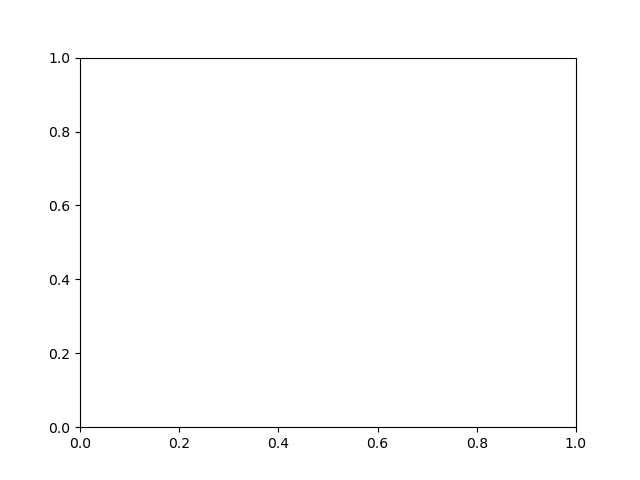

In [70]:
%matplotlib widget
#Speed distribution with sliders for galaxy type and lab/galaxy frame
import h5py
import numpy as np
import math
import matplotlib.pyplot as plt
import ipywidgets as widgets
from datetime import date
import time
from IPython.display import clear_output

clear_output()


def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    if iteration == total: 
        print()


#array_binned_mode() finds the peak in a histogram
def array_binned_mode(array, num_bins):
    freq, bins = np.histogram(array, bins=num_bins)
    return bins[np.where(freq==freq.max())[0]][0]


base_date = date(2022, 3, 22)
current_date = date(2022, 3, 22)
t = (current_date - base_date).days

f_m12i = h5py.File("m12i_darkmatter.hdf5", 'r')
f_m12f = h5py.File("m12f_darkmatter.hdf5", 'r')
f_m12m = h5py.File("m12m_darkmatter.hdf5", 'r')

def func(t, A, w, t1, B):
    return A*np.cos(w*(t-t1))+B


# The parametrized function to be plotted
def curve(galaxy_name, times):
    mean_energy = []
    if galaxy_name == "m12i":
        pos = np.array(f_m12i.get('position'))
        vel = np.array(f_m12i.get('velocity'))
    elif galaxy_name == "m12f":
        pos = np.array(f_m12f.get('position'))
        vel = np.array(f_m12f.get('velocity'))
    elif galaxy_name == "m12m":
        pos = np.array(f_m12m.get('position'))
        vel = np.array(f_m12m.get('velocity'))
    x = pos[:,0]
    y = pos[:,1]
    z = pos[:,2]
    vx = vel[:,0]
    vy = vel[:,1]
    costheta = x/np.sqrt(x**2 + y**2)
    sintheta = y/np.sqrt(x**2 + y**2)
    earth_ring_filter = ( (x-8*costheta)**2 + (y-8*sintheta)**2+z**2 <= 1 )
    pos = pos[earth_ring_filter]
    vel = vel[earth_ring_filter]
    x = pos[:,0]-8
    y = pos[:,1]
    z = pos[:,2]
    vx = vel[:,0]
    vy = vel[:,1]
    vz = vel[:,2]
    for t in times:
        radius = np.sqrt(x**2 + y**2)
        v_E = 29.79*(
            math.cos( ( (2*math.pi)/365 ) * t) * np.array([0.9941, 0.188, 0.0042]) +
            math.sin( ( (2*math.pi)/365 ) * t) * np.array([-0.0504, 0.4946, -0.8677])
        )
        v_PEC_LSR = np.array([11.1, 232.2, 7.3])
        v_E_total = v_E + v_PEC_LSR
        vR = ((vx*x+vy*y)/radius) - v_E_total[0]
        vPhi = ((x*vy - y*vx)/radius) + v_E_total[1]
        vz = vel[:,2] - v_E_total[2]
        speeds = np.sqrt(vR**2 + vPhi**2 + vz**2)
        x_variable = 0.5*speeds**2
        mean_energy.append(np.mean(x_variable))
    return mean_energy


fig, ax = plt.subplots()

times = np.linspace(1, 365, 365)

# The function to be called anytime a slider's value changes
@widgets.interact_manual(Galaxy=['m12i', 'm12f', 'm12m'])
def update(Galaxy='m12i'):
    line = plt.plot(times, curve(Galaxy, times), label=Galaxy)
    optimizedParameters, pcov = opt.curve_fit(func, xdata=times, ydata=curve(Galaxy, times), p0=[3.5e+03, 0.0172, 6.35, 6.8e+04])
    print(optimizedParameters)
    plt.plot(times, func(times, *optimizedParameters), label="fit for {}".format(Galaxy), linestyle='dashed')    
    plt.xlabel('Time (days from 22 March)')
    plt.ylabel("Mean 'Energy' (c^2)")
    plt.title('Figure 37: Mean energy of DM particles in {} system'.format(Galaxy))
    plt.legend()
plt.show()

# Week 6

## Interactive plot of [mean(vPhi)] over [z] within 20 kpc

(figure 38)

interactive(children=(Dropdown(description='Galaxy', options=('m12i', 'm12f', 'm12m'), value='m12i'), Dropdown…

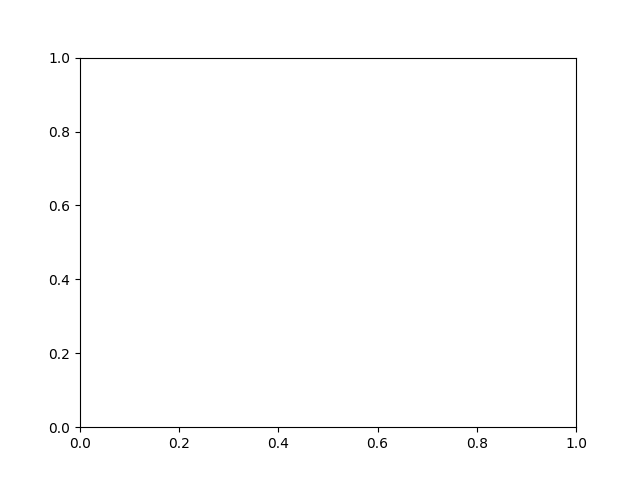

In [2]:
%matplotlib widget
#Speed distribution with sliders for galaxy type and lab/galaxy frame
import h5py
import numpy as np
import math
import matplotlib.pyplot as plt
import ipywidgets as widgets
from datetime import date
import time
import scipy.optimize as opt
from IPython.display import clear_output

clear_output()


def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    if iteration == total: 
        print()

f_m12i = h5py.File("m12i_darkmatter.hdf5", 'r')
f_m12f = h5py.File("m12f_darkmatter.hdf5", 'r')
f_m12m = h5py.File("m12m_darkmatter.hdf5", 'r')


def curve(galaxy_name, num_vals, radius):
    heights = []
    if galaxy_name == "m12i":
        pos = np.array(f_m12i.get('position'))
        vel = np.array(f_m12i.get('velocity'))
    elif galaxy_name == "m12f":
        pos = np.array(f_m12f.get('position'))
        vel = np.array(f_m12f.get('velocity'))
    elif galaxy_name == "m12m":
        pos = np.array(f_m12m.get('position'))
        vel = np.array(f_m12m.get('velocity'))
    x = pos[:,0]
    y = pos[:,1]
    z = pos[:,2]
    data_filter = np.sqrt(x**2 + y**2 + z**2) <= radius
    x = x[data_filter]
    y = y[data_filter]
    z = z[data_filter]
    vx = vel[:,0][data_filter]
    vy = vel[:,1][data_filter]
    radius = np.sqrt(x**2 + y**2)
    vPhi = ((x*vy - y*vx)/radius)
    freq, bins = np.histogram(z, bins=np.linspace(-200,200,num_vals))
    filtered_vPhi = np.array([])
    for i in range(0, len(bins)-1):
        filtered_vPhi = np.append(filtered_vPhi, np.mean(vPhi[np.logical_and(z >= bins[i], z < bins[i+1])]))
        printProgressBar(i, len(bins)-2, prefix="Generating figure: ", length = 90)
    z = np.array([0.5*(bins[i]+bins[i+1]) for i in range(len(bins)-1)])
    return [z, filtered_vPhi]
    
    


fig, ax = plt.subplots()

times = np.linspace(1, 365, 365)



# The function to be called anytime a slider's value changes
@widgets.interact_manual(Galaxy=['m12i', 'm12f', 'm12m'], Num_Points=range(10,1001,10), Radius=(1,200,1))
def update(Galaxy='m12i', Num_Points=100, Radius=20):
    output = curve(Galaxy, Num_Points, Radius)
    line = plt.plot(output[0], output[1], label='{} ({} points), radius={} kpc'.format(Galaxy, Num_Points, Radius))
    plt.xlabel('z (kpc)')
    plt.ylabel('mean vPhi (km/s)')
    plt.title('Figure 38: Mean vPhi vs z.')
    plt.legend()
plt.show()

## 2D histogram of v^2 and time (lab frame) (credit:https://matplotlib.org/3.5.0/gallery/statistics/time_series_histogram.html)

Here I use  4 pi f/m_a - 2 = v^2 from the equation 2 pi f = m_a + 0.5 m_a v^2

(figure 39a,39b,39c)

In [ ]:
%matplotlib inline
import h5py
import time
import numpy as np
import numpy.matlib
from copy import copy
import matplotlib.pyplot as plt
import math
import scipy.stats
from matplotlib.colors import LogNorm
from datetime import date
from IPython.display import clear_output

clear_output()

def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    if iteration == total: 
        print()

def speed2_generator(t):
    #Get Earth velocity
    v_E = 29.79*(
        math.cos( ( (2*math.pi)/365 ) * t*365) * np.array([0.9941, 0.188, 0.0042]) +
        math.sin( ( (2*math.pi)/365 ) * t*365) * np.array([-0.0504, 0.4946, -0.8677])
    )
    v_PEC_LSR = np.array([11.1, 232.2, 7.3])
    v_E_total = v_E + v_PEC_LSR

    #Get particle velocities relative to Earth
    vR_lab = vR - v_E_total[0]
    #my vPhi is opposite direction to v_E_total[1]
    vPhi_lab = vPhi + v_E_total[1]
    vz_lab = vz - v_E_total[2]
    return (vR_lab**2 + vPhi_lab**2 + vz_lab**2)/(300000**2)

fig, axes = plt.subplots(nrows=3, figsize=(6, 8), constrained_layout=True)

for i in [0,1,2]:
    galaxy = ['m12i', 'm12f', 'm12m'][i]
    snapshot = galaxy
    f = h5py.File(snapshot+"_darkmatter.hdf5", 'r')
    # get particle positions (Earth) as N x 3 array
    pos = np.array(f.get('position'))
    x_lab = pos[:,0]-8
    y_lab = pos[:,1]
    z_lab = pos[:,2]
    # get particle velocities (galaxy) as N x 3 array
    vel = np.array(f.get('velocity'))
    vx = vel[:,0]
    vy = vel[:,1]
    vz = vel[:,2]
    
    vR = (vx*(x_lab+8)+vy*y_lab)/np.sqrt((x_lab+8)**2 + y_lab**2)
    vPhi = ((x_lab+8)*vy - y_lab*vx)/np.sqrt((x_lab+8)**2 + y_lab**2)

    position_filter = np.sqrt(x_lab**2 + y_lab**2 + z_lab**2) <= 2

    vR = vR[position_filter]
    vPhi = vPhi[position_filter]
    vz = vz[position_filter]

    times = np.linspace(0,2,100)
    for t in times:
        if t == 0:
            speeds = np.array(speed2_generator(t))
        else:
            speeds = np.vstack([speeds, speed2_generator(t)])

    times = np.reshape(np.repeat(times, np.size(speeds[0])), (np.size(times), np.size(speeds[0]))).flatten()
    speeds = speeds.flatten()

    cmap = copy(plt.cm.plasma)
    cmap.set_bad(cmap(0))
    h, xedges, yedges = np.histogram2d(speeds, times, bins=[300, 100])
    pcm = axes[i].pcolormesh(xedges, yedges, h.T, cmap=cmap, vmax=100)
    fig.colorbar(pcm, ax=axes[i], label="# points", pad=0)
    axes[i].set_xlabel('v^2 (c^2 m^2/s^2)')
    axes[i].set_ylabel('t (years from 22 March)')
    axes[i].set_title('2d histogram of v^2 and time for {}'.format(galaxy))

plt.show()

## 2D histogram of v and time (lab frame) (credit:https://matplotlib.org/3.5.0/gallery/statistics/time_series_histogram.html)

Here I use  4 pi f/m_a - 2 = v^2 from the equation 2 pi f = m_a + 0.5 m_a v^2

(figure 40a,40b,40c)

In [ ]:
%matplotlib inline
import h5py
import time
import numpy as np
import numpy.matlib
from copy import copy
import matplotlib.pyplot as plt
import math
import scipy.stats
from matplotlib.colors import LogNorm
from datetime import date
from IPython.display import clear_output

clear_output()

def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    if iteration == total: 
        print()

def speed_generator(t):
    #Get Earth velocity
    v_E = 29.79*(
        math.cos( ( (2*math.pi)/365 ) * t*365) * np.array([0.9941, 0.188, 0.0042]) +
        math.sin( ( (2*math.pi)/365 ) * t*365) * np.array([-0.0504, 0.4946, -0.8677])
    )
    v_PEC_LSR = np.array([11.1, 232.2, 7.3])
    v_E_total = v_E + v_PEC_LSR

    #Get particle velocities relative to Earth
    vR_lab = vR - v_E_total[0]
    vPhi_lab = vPhi + v_E_total[1]
    vz_lab = vz - v_E_total[2]
    return np.sqrt(vR_lab**2 + vPhi_lab**2 + vz_lab**2)/300000

fig, axes = plt.subplots(nrows=3, figsize=(6, 8), constrained_layout=True)

for i in [0,1,2]:
    galaxy = ['m12i', 'm12f', 'm12m'][i]
    snapshot = galaxy
    f = h5py.File(snapshot+"_darkmatter.hdf5", 'r')
    # get particle positions (Earth) as N x 3 array
    pos = np.array(f.get('position'))
    x_lab = pos[:,0]-8
    y_lab = pos[:,1]
    z_lab = pos[:,2]
    # get particle velocities (galaxy) as N x 3 array
    vel = np.array(f.get('velocity'))
    vx = vel[:,0]
    vy = vel[:,1]
    vz = vel[:,2]
    
    vR = (vx*(x_lab+8)+vy*y_lab)/np.sqrt((x_lab+8)**2 + y_lab**2)
    vPhi = ((x_lab+8)*vy - y_lab*vx)/np.sqrt((x_lab+8)**2 + y_lab**2)

    position_filter = np.sqrt(x_lab**2 + y_lab**2 + z_lab**2) <= 2

    vR = vR[position_filter]
    vPhi = vPhi[position_filter]
    vz = vz[position_filter]

    times = np.linspace(0,2,100)
    for t in times:
        if t == 0:
            speeds = np.array(speed_generator(t))
        else:
            speeds = np.vstack([speeds, speed_generator(t)])

    times = np.reshape(np.repeat(times, np.size(speeds[0])), (np.size(times), np.size(speeds[0]))).flatten()
    speeds = speeds.flatten()

    cmap = copy(plt.cm.plasma)
    cmap.set_bad(cmap(0))
    h, xedges, yedges = np.histogram2d(speeds, times, bins=[200, 100])
    pcm = axes[i].pcolormesh(xedges, yedges, h.T, cmap=cmap, vmax=100)
    fig.colorbar(pcm, ax=axes[i], label="# points", pad=0)
    axes[i].set_xlabel('v (c m/s)')
    axes[i].set_ylabel('t (years from 22 March)')
    axes[i].set_title('2d histogram of v and time for {}'.format(galaxy))

plt.show()

# Week 7


Stream histogram

Changed vPhi_lab = vPhi - v_E_total[1] to vPhi_lab = vPhi + v_E_total[1]

## 2D histogram of v^2 and time (lab frame) - filtered

Here I use  4 pi f/m_a - 2 = v^2 from the equation 2 pi f = m_a + 0.5 m_a v^2. The data is restricted to a sphere in Earth's ring.

(figure 41a,41b,41c)



(m12i) theta = 0, 5, 165-180

(m12f) theta = 50, 55, 60, 315, 330

(m12m) Nothing interesting

In [ ]:
%matplotlib widget
import h5py
import ipywidgets as widgets
import time
import numpy as np
import numpy.matlib
from copy import copy
import matplotlib.pyplot as plt
import math
import scipy.stats
from matplotlib.colors import LogNorm
from datetime import date
from IPython.display import clear_output

clear_output()

def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    if iteration == total: 
        print()

def speed2_generator(vR, vPhi, vz, t):
    #Get Earth velocity
    v_E = 29.79*(
        math.cos( ( (2*math.pi)/365 ) * t*365) * np.array([0.9941, 0.188, 0.0042]) +
        math.sin( ( (2*math.pi)/365 ) * t*365) * np.array([-0.0504, 0.4946, -0.8677])
    )
    v_PEC_LSR = np.array([11.1, 232.2, 7.3])
    v_E_total = v_E + v_PEC_LSR

    #Get particle velocities relative to Earth
    vR_lab = vR - v_E_total[0]
    #my vPhi is opposite direction to v_E_total[1]
    vPhi_lab = vPhi + v_E_total[1]
    vz_lab = vz - v_E_total[2]
    return (vR_lab**2 + vPhi_lab**2 + vz_lab**2)/(300000**2)

fig, ax = plt.subplots(figsize=(10,6))

def data_function(galaxy, theta):
    snapshot = galaxy
    f = h5py.File(snapshot+"_darkmatter.hdf5", 'r')
    # get particle positions (Earth) as N x 3 array
    pos = np.array(f.get('position'))
    x_lab = pos[:,0]-8*math.cos(theta*math.pi/180)
    y_lab = pos[:,1]-8*math.sin(theta*math.pi/180)
    z_lab = pos[:,2]
    # get particle velocities (galaxy) as N x 3 array
    vel = np.array(f.get('velocity'))
    vx = vel[:,0]
    vy = vel[:,1]
    vz = vel[:,2]
    
    vR = (vx*(x_lab+8*math.cos(theta*math.pi/180))+vy*(y_lab+8*math.sin(theta*math.pi/180)))/np.sqrt((x_lab+8*math.cos(theta*math.pi/180))**2 + (y_lab+8*math.sin(theta*math.pi/180))**2)
    vPhi = ((x_lab+8*math.cos(theta*math.pi/180))*vy - (y_lab+8*math.sin(theta*math.pi/180))*vx)/np.sqrt((x_lab+8*math.cos(theta*math.pi/180))**2 + (y_lab+8*math.sin(theta*math.pi/180))**2)
    position_filter = np.sqrt(x_lab**2 + y_lab**2 + z_lab**2) <= 1.5
    
    vR = vR[position_filter]
    vPhi = vPhi[position_filter]
    vz = vz[position_filter]
    
    times = np.linspace(0,2,100)
    for t in times:
        if t == 0:
            speeds = np.array(speed2_generator(vR, vPhi, vz, t))
        else:
            speeds = np.vstack([speeds, speed2_generator(vR, vPhi, vz, t)])

    times = np.reshape(np.repeat(times, np.size(speeds[0])), (np.size(times), np.size(speeds[0]))).flatten()
    speeds = speeds.flatten()
    return [times, speeds]

cmap = copy(plt.cm.plasma)
cmap.set_bad(cmap(0))


# The function to be called anytime a slider's value changes
@widgets.interact_manual(Galaxy=['m12i', 'm12f', 'm12m'], Theta=range(0,356,5))
def update(Galaxy='m12i', Theta=170):
    output = data_function(Galaxy, Theta)
    h, xedges, yedges = np.histogram2d(output[1], output[0], bins=[200, 100])
    pcm = ax.pcolormesh(xedges, yedges, h.T, cmap=cmap)
    ax.set_xlabel('v^2 (c^2 m^2/s^2)')
    ax.set_ylabel('t (years from 22 March)')
    ax.set_title('Figure 41: 2d histogram of v^2 and time for {}\naround(x,y,z) = ({}, {}, 0.0), theta = {}'.format(Galaxy, round(8*math.cos(Theta*math.pi/180),1), round(8*math.sin(Theta*math.pi/180),1), Theta))
    if len(fig.axes) <= 1:
        fig.colorbar(pcm, ax=ax, label="# points", pad=0)

plt.show()

## 3D histogram of v^2 and time

(figure 42)

In [ ]:
%matplotlib widget
import h5py
import ipywidgets as widgets
import time
import numpy as np
import numpy.matlib
from copy import copy
import matplotlib.pyplot as plt
import math
import scipy.stats
from matplotlib.colors import LogNorm
from datetime import date
from IPython.display import clear_output

clear_output()

def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    if iteration == total: 
        print()

def speed2_generator(vR, vPhi, vz, t):
    #Get Earth velocity
    v_E = 29.79*(
        math.cos( ( (2*math.pi)/365 ) * t*365) * np.array([0.9941, 0.188, 0.0042]) +
        math.sin( ( (2*math.pi)/365 ) * t*365) * np.array([-0.0504, 0.4946, -0.8677])
    )
    v_PEC_LSR = np.array([11.1, 232.2, 7.3])
    v_E_total = v_E + v_PEC_LSR

    #Get particle velocities relative to Earth
    vR_lab = vR - v_E_total[0]
    #my vPhi is opposite direction to v_E_total[1]
    vPhi_lab = vPhi + v_E_total[1]
    vz_lab = vz - v_E_total[2]
    return (vR_lab**2 + vPhi_lab**2 + vz_lab**2)/(300000**2)

fig = plt.figure(figsize=[10,10])

def data_function(galaxy, theta):
    snapshot = galaxy
    f = h5py.File(snapshot+"_darkmatter.hdf5", 'r')
    # get particle positions (Earth) as N x 3 array
    pos = np.array(f.get('position'))
    x_lab = pos[:,0]-8*math.cos(theta*math.pi/180)
    y_lab = pos[:,1]-8*math.sin(theta*math.pi/180)
    z_lab = pos[:,2]
    # get particle velocities (galaxy) as N x 3 array
    vel = np.array(f.get('velocity'))
    vx = vel[:,0]
    vy = vel[:,1]
    vz = vel[:,2]
    
    vR = (vx*(x_lab+8)+vy*y_lab)/np.sqrt((x_lab+8)**2 + y_lab**2)
    vPhi = ((x_lab+8)*vy - y_lab*vx)/np.sqrt((x_lab+8)**2 + y_lab**2)

    position_filter = np.sqrt(x_lab**2 + y_lab**2 + z_lab**2) <= 2
    
    vR = vR[position_filter]
    vPhi = vPhi[position_filter]
    vz = vz[position_filter]
    
    times = np.linspace(0,2,100)
    for t in times:
        if t == 0:
            speeds = np.array(speed2_generator(vR, vPhi, vz, t))
        else:
            speeds = np.vstack([speeds, speed2_generator(vR, vPhi, vz, t)])

    times = np.reshape(np.repeat(times, np.size(speeds[0])), (np.size(times), np.size(speeds[0]))).flatten()
    speeds = speeds.flatten()
    return [times, speeds]

cmap = copy(plt.cm.plasma)
cmap.set_bad(cmap(0))


# The function to be called anytime a slider's value changes
@widgets.interact_manual(Galaxy=['m12i', 'm12f', 'm12m'], Theta=range(0,356,5))
def update(Galaxy='m12i', Theta=0):
    output = data_function(Galaxy, Theta)
    fig.clear()
    speeds = output[1]
    times = output[0]
    ax = fig.add_subplot(projection='3d')
    h, xedges, yedges = np.histogram2d(speeds, times, bins=[300, 100])

    # Construct arrays for the anchor positions of the 16 bars.
    xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
    xpos = xpos.ravel()
    ypos = ypos.ravel()
    zpos = 0

    # Construct arrays with the dimensions for the 16 bars.
    dx = 1e-7
    dy = 0.02
    dz = h.ravel()
    cmap = plt.cm.get_cmap('jet')
    max_height = np.max(dz)
    min_height = np.min(dz)
    # scale each z to [0,1], and get their rgb values
    rgba = [cmap((k-min_height)/max_height) for k in dz] 
    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba)
    plt.title('Figure 42: 2d histogram of v^2 and time for {} around\n(x,y,z) = ({}, {}, 0.0), theta = {}'.format(Galaxy, round(8*math.cos(Theta*math.pi/180),1), round(8*math.sin(Theta*math.pi/180),1), Theta))
    plt.xlabel('v^2 (c^2 m^2/s^2)')
    plt.ylabel('t (years from 22 March)')
plt.show()

## Halo Integrals in torus

(figure 43)

### Figure 29 Copied Below

changes: 
                
                speed is in multiples of c rather than km/s
                
         
Notable problems: 

                halo integral uses f(w) where w is proportional to v^2 rather than v

                I had to rescale my histogram so that the height of the histogram matches the height of the f_lab_vt curve
                from eq'n 25 of https://arxiv.org/pdf/1701.03118.pdf

In [ ]:
%matplotlib widget
#Speed distribution with sliders for galaxy type and lab/galaxy frame
import h5py
import numpy as np
import math
import matplotlib.pyplot as plt
import ipywidgets as widgets
from datetime import date
from IPython.display import clear_output
import scipy.integrate as integrate

clear_output()

base_date = date(2022, 3, 22)
current_date = date(2022, 3, 22)
t = (current_date - base_date).days




f_m12i = h5py.File("m12i_darkmatter.hdf5", 'r')
f_m12f = h5py.File("m12f_darkmatter.hdf5", 'r')
f_m12m = h5py.File("m12m_darkmatter.hdf5", 'r')

# The parametrized function to be plotted
def histogram(galaxy_name, time):
    if galaxy_name == "m12i":
        pos = np.array(f_m12i.get('position'))
        vel = np.array(f_m12i.get('velocity'))
    elif galaxy_name == "m12f":
        pos = np.array(f_m12f.get('position'))
        vel = np.array(f_m12f.get('velocity'))
    elif galaxy_name == "m12m":
        pos = np.array(f_m12m.get('position'))
        vel = np.array(f_m12m.get('velocity'))
    x = pos[:,0]
    y = pos[:,1]
    z = pos[:,2]
    vx = vel[:,0]
    vy = vel[:,1]
    vz = vel[:,2]
    costheta = x/np.sqrt(x**2 + y**2)
    sintheta = y/np.sqrt(x**2 + y**2)
    earth_ring_filter = ( (x-8*costheta)**2 + (y-8*sintheta)**2+z**2 <= 1 )
    pos = pos[earth_ring_filter]
    vel = vel[earth_ring_filter]
    x = pos[:,0]-8
    y = pos[:,1]
    z = pos[:,2]
    vx = vel[:,0]
    vy = vel[:,1]
    vz = vel[:,2]
    radius = np.sqrt(x**2 + y**2)
    vR = (vx*x+vy*y)/radius
    vPhi = (x*vy - y*vx)/radius
    v_E = 29.79*(
        math.cos( ( (2*math.pi)/365 ) * time) * np.array([0.9941, 0.188, 0.0042]) +
        math.sin( ( (2*math.pi)/365 ) * time) * np.array([-0.0504, 0.4946, -0.8677])
    )
    v_PEC_LSR = np.array([11.1, 232.2, 7.3])
    v_E_total = v_E + v_PEC_LSR
    vR = vR - v_E_total[0]
    vPhi = vPhi + v_E_total[1]
    vz = vz - v_E_total[2]
    
    v_lab = np.sqrt(v_E_total[0]**2 + v_E_total[1]**2 + v_E_total[2]**2)
    speeds = np.sqrt(vR**2 + vPhi**2 + vz**2)/299792
    return speeds


galaxy_name = 'm12i'  # 'm12i' or 'm12f' or 'm12m'
frame = 'Galaxy'      # 'Galaxy' or 'Lab'

fig, ax = plt.subplots()

# Reference function to be numerically integrated, comes from eq'n 25 of https://arxiv.org/pdf/1701.03118.pdf
def f_lab_vt(v_gal,galaxy_name,time):
    if galaxy_name == "m12i":
        pos = np.array(f_m12i.get('position'))
        vel = np.array(f_m12i.get('velocity'))
    elif galaxy_name == "m12f":
        pos = np.array(f_m12f.get('position'))
        vel = np.array(f_m12f.get('velocity'))
    elif galaxy_name == "m12m":
        pos = np.array(f_m12m.get('position'))
        vel = np.array(f_m12m.get('velocity'))
    x = pos[:,0]
    y = pos[:,1]
    z = pos[:,2]
    costheta = x/np.sqrt(x**2 + y**2)
    sintheta = y/np.sqrt(x**2 + y**2)
    earth_ring_filter = ( (x-8*costheta)**2 + (y-8*sintheta)**2+z**2 <= 1 )
    vel = vel[earth_ring_filter]
    x = x[earth_ring_filter]-8
    y = y[earth_ring_filter]
    z = z[earth_ring_filter]
    vx = vel[:,0]
    vy = vel[:,1]
    vz = vel[:,2]
    radius = np.sqrt(x**2 + y**2)
    vR = (vx*x+vy*y)/radius
    vPhi = (x*vy - y*vx)/radius
    v_E = 29.79*(
        math.cos( ( (2*math.pi)/365 ) * time) * np.array([0.9941, 0.188, 0.0042]) +
        math.sin( ( (2*math.pi)/365 ) * time) * np.array([-0.0504, 0.4946, -0.8677])
    )
    v_PEC_LSR = np.array([11.1, 232.2, 7.3])
    v_E_total = v_E + v_PEC_LSR
    vR = vR - v_E_total[0]
    vPhi = vPhi + v_E_total[1]
    vz = vz - v_E_total[2]
    v_0 = 220/299792
    v_lab = np.sqrt(v_E_total[0]**2 + v_E_total[1]**2 + v_E_total[2]**2)/299792
    f_lab_vt = ( 2*v_gal*np.exp(-(v_gal**2 + v_lab**2)/(v_0**2))*np.sinh( (2*v_lab*v_gal)/(v_0**2) ) ) / ( math.pi*math.sqrt(math.pi)*v_0*v_lab)
    return (f_lab_vt**2)


# The function to be called anytime a slider's value changes
@widgets.interact_manual(Galaxy=['m12i', 'm12f', 'm12m'], time=widgets.IntSlider(min=0, max=365, value=0, step=1))
def update(Galaxy='m12i', time=0):
    x_variable = histogram(Galaxy,time)
    hist, edges = np.histogram(x_variable, bins=100)
    v_gal = np.arange(0,np.max(edges),edges[1]-edges[0])
    
    #Histogram is scaled vertically to match eq'n 25 from https://arxiv.org/pdf/1701.03118.pdf
    hist = hist*(math.sqrt(np.max(f_lab_vt(v_gal,Galaxy, time))) / np.max(hist))
    
    #Plotting (unscaled) histogram
    line = plt.hist(x_variable, bins=100, alpha=0.5, label='{}, t = {}'.format(Galaxy,time))
    plt.xlabel('v (m/s)')
    plt.ylabel('Proportion')
    plt.title('Figure 35: Proportion of DM particles in torus with a given energy.')
    
    #Numerical integral from scaled histogram of data
    num_int = 0
    for i in range(0,len(hist)):
        num_int += (hist[i]**2)*(edges[i+1]-edges[i])
    
    #Reference integral using eq'n 25 from https://arxiv.org/pdf/1701.03118.pdf
    #ref_int = integrate.quad(f_lab_vt, np.min(edges), np.max(edges), args=(Galaxy, time))
    ref_int = (65.49060779127133, 4.062141778785018e-11)
    
    print("Numerical integral value: {}".format(num_int))
    print("Reference integral value: {}".format(ref_int[0]))
    plt.legend()
plt.show()

In [ ]:
%matplotlib notebook
#Speed distribution with sliders for galaxy type and lab/galaxy frame
import h5py
import numpy as np
import math
import matplotlib.pyplot as plt
import ipywidgets as widgets
from datetime import date
from IPython.display import clear_output
import scipy.integrate as integrate

clear_output()



f_m12i = h5py.File("m12i_darkmatter.hdf5", 'r')
f_m12f = h5py.File("m12f_darkmatter.hdf5", 'r')
f_m12m = h5py.File("m12m_darkmatter.hdf5", 'r')



galaxy_name = 'm12i'  # 'm12i' or 'm12f' or 'm12m'
frame = 'Galaxy'      # 'Galaxy' or 'Lab'

fig, ax = plt.subplots()

# Reference function to be numerically integrated
def f_lab_vt(v_gal,time):
    v_E = 29.79*(
        math.cos( ( (2*math.pi)/365 ) * time) * np.array([0.9941, 0.188, 0.0042]) +
        math.sin( ( (2*math.pi)/365 ) * time) * np.array([-0.0504, 0.4946, -0.8677])
    )
    v_PEC_LSR = np.array([11.1, 232.2, 7.3])
    v_E_total = v_E + v_PEC_LSR
    v_0 = 220/299792
    v_lab = np.sqrt(v_E_total[0]**2 + v_E_total[1]**2 + v_E_total[2]**2)/299792
    f_lab_vt = ( 2*v_gal*np.exp(-(v_gal**2 + v_lab**2)/(v_0**2))*np.sinh( (2*v_lab*v_gal)/(v_0**2) ) ) / ( math.pi*math.sqrt(math.pi)*v_0*v_lab)
    return f_lab_vt


v_gal = np.arange(0,0.0025,2.5e-5)

plt.plot(v_gal, f_lab_vt(v_gal, 0))

print(np.max(f_lab_vt(v_gal,0)))

plt.show()

# Week 8

## Halo Integrals in sphere

(figure 44)

### Figure 29 Copied Below

changes: 
                
                speed is in multiples of c rather than km/s
                
         
Notable problems: 

                halo integral uses f(w) where w is proportional to v^2 rather than v

                I had to rescale my histogram so that the height of the histogram matches the height of the f_lab_vt curve
                from eq'n 25 of https://arxiv.org/pdf/1701.03118.pdf

In [ ]:
%matplotlib widget
#Speed distribution with sliders for galaxy type and lab/galaxy frame
import h5py
import numpy as np
import math
import matplotlib.pyplot as plt
import ipywidgets as widgets
from datetime import date
from IPython.display import clear_output
import scipy.integrate as integrate

clear_output()

base_date = date(2022, 3, 22)
current_date = date(2022, 3, 22)
t = (current_date - base_date).days



# The parametrized function to be plotted
def histogram(galaxy_name, time, theta):
    snapshot = galaxy_name
    f = h5py.File(snapshot+"_darkmatter.hdf5", 'r')
    # get particle positions (Earth) as N x 3 array
    pos = np.array(f.get('position'))
    x_lab = pos[:,0]-8*math.cos(theta*math.pi/180)
    y_lab = pos[:,1]-8*math.sin(theta*math.pi/180)
    z_lab = pos[:,2]
    position_filter = np.sqrt(x_lab**2 + y_lab**2 + z_lab**2) <= 2
    x_lab = x_lab[position_filter]
    y_lab = y_lab[position_filter]
    z_lab = z_lab[position_filter]
    # get particle velocities (galaxy) as N x 3 array
    vel = np.array(f.get('velocity'))
    vx = vel[:,0][position_filter]
    vy = vel[:,1][position_filter]
    vz = vel[:,2][position_filter]
    
    vR = (vx*(x_lab+8*math.cos(theta*math.pi/180))+vy*(y_lab+8*math.sin(theta*math.pi/180)))/np.sqrt((x_lab+8*math.cos(theta*math.pi/180))**2 + (y_lab+8*math.sin(theta*math.pi/180))**2)
    vPhi = ((x_lab+8*math.cos(theta*math.pi/180))*vy - (y_lab+8*math.sin(theta*math.pi/180))*vx)/np.sqrt((x_lab+8*math.cos(theta*math.pi/180))**2 + (y_lab+8*math.sin(theta*math.pi/180))**2)
    
    v_E = 29.79*(
        math.cos( ( (2*math.pi)/365 ) * time) * np.array([0.9941, 0.188, 0.0042]) +
        math.sin( ( (2*math.pi)/365 ) * time) * np.array([-0.0504, 0.4946, -0.8677])
    )
    v_PEC_LSR = np.array([11.1, 232.2, 7.3])
    v_E_total = v_E + v_PEC_LSR
    vR = vR - v_E_total[0]
    vPhi = vPhi + v_E_total[1]
    vz = vz - v_E_total[2]
    
    v_lab = np.sqrt(v_E_total[0]**2 + v_E_total[1]**2 + v_E_total[2]**2)
    speeds = np.sqrt(vR**2 + vPhi**2 + vz**2)/299792
    return speeds


galaxy_name = 'm12i'  # 'm12i' or 'm12f' or 'm12m'
frame = 'Galaxy'      # 'Galaxy' or 'Lab'

fig, ax = plt.subplots()

# Reference function to be numerically integrated, comes from eq'n 25 of https://arxiv.org/pdf/1701.03118.pdf
def f_lab_vt(v_gal,time):
    v_E = 29.79*(
        math.cos( ( (2*math.pi)/365 ) * time) * np.array([0.9941, 0.188, 0.0042]) +
        math.sin( ( (2*math.pi)/365 ) * time) * np.array([-0.0504, 0.4946, -0.8677])
    )
    v_PEC_LSR = np.array([11.1, 232.2, 7.3])
    v_E_total = v_E + v_PEC_LSR
    v_0 = 220/299792
    v_lab = np.sqrt(v_E_total[0]**2 + v_E_total[1]**2 + v_E_total[2]**2)/299792
    f_lab_vt = ( 2*v_gal*np.exp(-(v_gal**2 + v_lab**2)/(v_0**2))*np.sinh( (2*v_lab*v_gal)/(v_0**2) ) ) / ( math.pi*math.sqrt(math.pi)*v_0*v_lab)
    return (f_lab_vt**2)

def f_lab_vt1(v_gal,time):
    v_E = 29.79*(
        math.cos( ( (2*math.pi)/365 ) * time) * np.array([0.9941, 0.188, 0.0042]) +
        math.sin( ( (2*math.pi)/365 ) * time) * np.array([-0.0504, 0.4946, -0.8677])
    )
    v_PEC_LSR = np.array([11.1, 232.2, 7.3])
    v_E_total = v_E + v_PEC_LSR
    v_0 = 220/299792
    v_lab = np.sqrt(v_E_total[0]**2 + v_E_total[1]**2 + v_E_total[2]**2)/299792
    f_lab_vt = ( 2*v_gal*np.exp(-(v_gal**2 + v_lab**2)/(v_0**2))*np.sinh( (2*v_lab*v_gal)/(v_0**2) ) ) / ( math.pi*math.sqrt(math.pi)*v_0*v_lab)
    return f_lab_vt

# The function to be called anytime a slider's value changes
@widgets.interact_manual(Galaxy=['m12i', 'm12f', 'm12m'], time=widgets.IntSlider(min=0, max=365, value=0, step=1), Theta=range(0,356,5))
def update(Galaxy='m12i', time=0, Theta=0):
    x_variable = histogram(Galaxy,time,Theta)
    hist, edges = np.histogram(x_variable, bins=30)
    
    #Histogram is scaled vertically to match eq'n 25 from https://arxiv.org/pdf/1701.03118.pdf
    hist = hist*(math.sqrt(np.max(f_lab_vt(edges,time))) / np.max(hist))
    
    plt.bar(edges[:-1],hist,width=edges[1]-edges[0], alpha=0.5, label='{}, t = {}, theta = {}'.format(Galaxy,time,Theta))
    plt.xlabel('v (multiples of c)')
    plt.ylabel('Proportion')
    plt.title('Figure 35: Proportion of DM particles in sphere with a given energy.')
    
    #Numerical integral from scaled histogram of data
    num_int = 0
    for i in range(0,len(hist)):
        num_int += (hist[i]**2)*(edges[i+1]-edges[i])
    
    #Reference integral using eq'n 25 from https://arxiv.org/pdf/1701.03118.pdf
    ref_int = integrate.quad(f_lab_vt, np.min(edges), np.max(edges), args=(time))

    plt.plot(edges, f_lab_vt1(edges, time))
    print("Numerical integral value: {}".format(num_int))
    print("Reference integral value: {}".format(ref_int[0]))
    plt.legend()
plt.show()

## Plotting ratio of numerical integral to reference integral
(figure 45)

In [ ]:
%matplotlib widget
#Speed distribution with sliders for galaxy type and lab/galaxy frame
import h5py
import numpy as np
import math
import matplotlib.pyplot as plt
import ipywidgets as widgets
from datetime import date
from IPython.display import clear_output
import scipy.integrate as integrate
import time as timer

clear_output()

base_date = date(2022, 3, 22)
current_date = date(2022, 3, 22)
t = (current_date - base_date).days

def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    if iteration == total: 
        print()

# The parametrized function to be plotted
def histogram(pos, vel, time, theta, v_E_total):
    x = pos[:,0]
    y = pos[:,1]
    z = pos[:,2]
    
    position_filter = np.sqrt((x-8*math.cos(theta*math.pi/180))**2 + (y-8*math.sin(theta*math.pi/180))**2 + z**2) <= 1
    
    
    x = x[position_filter]
    y = y[position_filter]
    z_lab = z[position_filter]
    x_lab = x-8*math.cos(theta*math.pi/180)
    y_lab = y-8*math.sin(theta*math.pi/180)
    
    vx = vel[:,0][position_filter]
    vy = vel[:,1][position_filter]
    vz = vel[:,2][position_filter] - v_E_total[2]
    
    radius = np.sqrt(x**2 + y**2)
    vR = (vx*x+vy*y)/radius - v_E_total[0]
    vPhi = (x*vy - y*vx)/radius + v_E_total[1]
    
    v_lab = np.sqrt(v_E_total[0]**2 + v_E_total[1]**2 + v_E_total[2]**2)
    speeds = np.sqrt(vR**2 + vPhi**2 + vz**2)/299792
    return speeds


galaxy_name = 'm12i'  # 'm12i' or 'm12f' or 'm12m'
frame = 'Galaxy'      # 'Galaxy' or 'Lab'


# Reference function to be numerically integrated, comes from eq'n 25 of https://arxiv.org/pdf/1701.03118.pdf
def f_lab_vt(v_gal,time):
    v_E = 29.79*(
        math.cos( ( (2*math.pi)/365 ) * time) * np.array([0.9941, 0.188, 0.0042]) +
        math.sin( ( (2*math.pi)/365 ) * time) * np.array([-0.0504, 0.4946, -0.8677])
    )
    v_PEC_LSR = np.array([11.1, 232.2, 7.3])
    v_E_total = v_E + v_PEC_LSR
    v_0 = 220/299792
    v_lab = np.sqrt(v_E_total[0]**2 + v_E_total[1]**2 + v_E_total[2]**2)/299792
    f_lab_vt = ( 2*v_gal*np.exp(-(v_gal**2 + v_lab**2)/(v_0**2))*np.sinh( (2*v_lab*v_gal)/(v_0**2) ) ) / ( math.pi*math.sqrt(math.pi)*v_0*v_lab)
    return (f_lab_vt**2)

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)

# The function to be called anytime a slider's value changes
@widgets.interact_manual(time=widgets.IntSlider(min=0, max=365, value=0, step=1))
def update(time=0):
    thetas = range(0,360,1)
    for Galaxy in ['m12i', 'm12f', 'm12m']:
        ratios = []
        
        f = h5py.File(Galaxy+"_darkmatter.hdf5", 'r')
        # get particle positions (Earth) as N x 3 array
        pos = np.array(f.get('position'))
        # get particle velocities (galaxy) as N x 3 array
        vel = np.array(f.get('velocity'))
        
        v_E = 29.79*(
            math.cos( ( (2*math.pi)/365 ) * time) * np.array([0.9941, 0.188, 0.0042]) +
            math.sin( ( (2*math.pi)/365 ) * time) * np.array([-0.0504, 0.4946, -0.8677])
        )
        v_PEC_LSR = np.array([11.1, 232.2, 7.3])
        v_E_total = v_E + v_PEC_LSR
        
        for Theta in thetas:
            t1 = timer.time()
            x_variable = histogram(pos, vel,time,Theta, v_E_total)
            t2 = timer.time()
            hist, edges = np.histogram(x_variable, bins=30)
            #Histogram is scaled vertically to match eq'n 25 from https://arxiv.org/pdf/1701.03118.pdf
            hist = hist*(math.sqrt(np.max(f_lab_vt(edges,time))) / np.max(hist))

            #Numerical integral from scaled histogram of data
            num_int = 0
            for i in range(0,len(hist)):
                num_int += (hist[i]**2)*(edges[i+1]-edges[i])

            #Reference integral using eq'n 25 from https://arxiv.org/pdf/1701.03118.pdf
            ref_int = integrate.quad(f_lab_vt, np.min(edges), np.max(edges), args=(time))[0]
            
            ratios.append(num_int/ref_int)
            printProgressBar(Theta,max(thetas),prefix=(Galaxy+" plot progress"), length=90)
        plt.plot(thetas, ratios, label=Galaxy)
    plt.ylabel('I_numerical / I_reference')
    plt.xlabel('theta (degrees)')
    plt.title("""Ratio of numerical and reference integrals vs theta. Here, the numerical integral is
calculated in spheres of radius 2 kpc within Earth's ring, where the sphere location is
determined by its angle theta measured anticlockwise from the positive x-coordinate (as
seen from above)""")
    plt.legend()
plt.show()

## Finding Stream Velocity

### Reminder of Plot of Stream

In [ ]:
%matplotlib widget
import h5py
import ipywidgets as widgets
import time
import numpy as np
import numpy.matlib
from copy import copy
import matplotlib.pyplot as plt
import math
import scipy.stats
from matplotlib.colors import LogNorm
from datetime import date
from IPython.display import clear_output

clear_output()

def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    if iteration == total: 
        print()

def speed2_generator(vR, vPhi, vz, t):
    #Get Earth velocity
    v_E = 29.79*(
        math.cos( ( (2*math.pi)/365 ) * t*365) * np.array([0.9941, 0.188, 0.0042]) +
        math.sin( ( (2*math.pi)/365 ) * t*365) * np.array([-0.0504, 0.4946, -0.8677])
    )
    v_PEC_LSR = np.array([11.1, 232.2, 7.3])
    v_E_total = v_E + v_PEC_LSR

    #Get particle velocities relative to Earth
    vR_lab = vR - v_E_total[0]
    #my vPhi is opposite direction to v_E_total[1]
    vPhi_lab = vPhi + v_E_total[1]
    vz_lab = vz - v_E_total[2]
    return (vR_lab**2 + vPhi_lab**2 + vz_lab**2)/(300000**2)

fig, ax = plt.subplots(figsize=(10,6))

def data_function(galaxy, theta):
    snapshot = galaxy
    f = h5py.File(snapshot+"_darkmatter.hdf5", 'r')
    # get particle positions (Earth) as N x 3 array
    pos = np.array(f.get('position'))
    x_lab = pos[:,0]-8*math.cos(theta*math.pi/180)
    y_lab = pos[:,1]-8*math.sin(theta*math.pi/180)
    z_lab = pos[:,2]
    # get particle velocities (galaxy) as N x 3 array
    vel = np.array(f.get('velocity'))
    vx = vel[:,0]
    vy = vel[:,1]
    vz = vel[:,2]
    
    vR = (vx*(x_lab+8*math.cos(theta*math.pi/180))+vy*(y_lab+8*math.sin(theta*math.pi/180)))/np.sqrt((x_lab+8*math.cos(theta*math.pi/180))**2 + (y_lab+8*math.sin(theta*math.pi/180))**2)
    vPhi = ((x_lab+8*math.cos(theta*math.pi/180))*vy - (y_lab+8*math.sin(theta*math.pi/180))*vx)/np.sqrt((x_lab+8*math.cos(theta*math.pi/180))**2 + (y_lab+8*math.sin(theta*math.pi/180))**2)
    position_filter = np.sqrt(x_lab**2 + y_lab**2 + z_lab**2) <= 2
    
    vR = vR[position_filter]
    vPhi = vPhi[position_filter]
    vz = vz[position_filter]
    
    times = np.linspace(0,2,100)
    for t in times:
        if t == 0:
            speeds = np.array(speed2_generator(vR, vPhi, vz, t))
        else:
            speeds = np.vstack([speeds, speed2_generator(vR, vPhi, vz, t)])

    times = np.reshape(np.repeat(times, np.size(speeds[0])), (np.size(times), np.size(speeds[0]))).flatten()
    speeds = speeds.flatten()
    return [times, speeds]

cmap = copy(plt.cm.plasma)
cmap.set_bad(cmap(0))



Galaxy='m12i'
Theta = 170
output = data_function(Galaxy, Theta)
h, xedges, yedges = np.histogram2d(output[1], output[0], bins=[200, 100])
pcm = ax.pcolormesh(xedges, yedges, h.T, cmap=cmap, vmax=20)
ax.set_xlabel('v^2 (c^2 m^2/s^2)')
ax.set_ylabel('t (years from 22 March)')
ax.set_title('Figure 41: 2d histogram of v^2 and time for {}\naround(x,y,z) = ({}, {}, 0.0), theta = {}'.format(Galaxy, round(8*math.cos(Theta*math.pi/180),1), round(8*math.sin(Theta*math.pi/180),1), Theta))
if len(fig.axes) <= 1:
    fig.colorbar(pcm, ax=ax, label="# points", pad=0)

plt.show()

### Plotting vR, vPhi, vz
(figure 46)

In [ ]:
%matplotlib widget
import h5py
import time
import numpy as np
import matplotlib.pyplot as plt
import math
from IPython.display import clear_output

clear_output()


'''
Importing positions and velocities in Earth frame ===========================================================================
'''
theta=170

from datetime import date

base_date = date(2022, 3, 22)
current_date = date(2022, 3, 22)
t = (current_date - base_date).days

v_E = 29.79*(
    math.cos( ( (2*math.pi)/365 ) * t) * np.array([0.9941, 0.188, 0.0042]) +
    math.sin( ( (2*math.pi)/365 ) * t) * np.array([-0.0504, 0.4946, -0.8677])
)

v_PEC = np.array([11.1, 12.2, 7.3])

v_LSR = np.array([0, 220, 0])


# cylindrical coordinates (vR, vPhi, vz)
v_E_total = v_E + v_PEC + v_LSR

snapshot = 'm12i' # m12i or m12f or m12m

f = h5py.File(snapshot+"_darkmatter.hdf5", 'r')

# get particle positions (galaxy) as N x 3 array
pos = np.array(f.get('position'))
x = pos[:,0]
y = pos[:,1]
z = pos[:,2]

# get particle velocities (galaxy) as N x 3 array
vel = np.array(f.get('velocity'))
vx = vel[:,0]
vy = vel[:,1]
vz = vel[:,2]


x_lab = x-8*math.cos(theta*math.pi/180)
y_lab = y-8*math.sin(theta*math.pi/180)
z_lab = z


position_filter = np.sqrt(x_lab**2 + y_lab**2 + z_lab**2) <= 2

vR = (vx*x+vy*y)/np.sqrt(x**2 + y**2)

vPhi = (x*vy - y*vx)/np.sqrt(x**2 + y**2)
#vPhi > 0 means clockwise rotation

vR = vR[position_filter]
vPhi = vPhi[position_filter]
vz = vz[position_filter]


# get particle velocities (earth) as N x 3 array
vR_lab = vR - v_E_total[0]
vPhi_lab = vPhi + v_E_total[1]
vz_lab = vz - v_E_total[2]

'''
=============================================================================================================================
'''


#---------------------------------------------------------------------------------------------------------------------------

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)

plt.hist(vR_lab, bins=100)
plt.title('Histogram of vR (Earth frame)')



plt.show()

#---------------------------------------------------------------------------------------------------------------------------

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)

plt.hist(vPhi_lab, bins=100)
plt.title('Histogram of vPhi (Earth frame)')


plt.show()

#---------------------------------------------------------------------------------------------------------------------------

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)


plt.hist(vz_lab, bins=100)
plt.title('Histogram of vz (Earth frame)')
plt.show()

### Filtering for Stream

In [ ]:
%matplotlib widget
import h5py
import ipywidgets as widgets
import time
import numpy as np
import numpy.matlib
from copy import copy
import matplotlib.pyplot as plt
import math
import scipy.stats
from matplotlib.colors import LogNorm
from datetime import date
from IPython.display import clear_output

clear_output()

def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    if iteration == total: 
        print()

def speed2_generator(vR, vPhi, vz, t, upper_bound):
    #Get Earth velocity
    v_E = 29.79*(
        math.cos( ( (2*math.pi)/365 ) * t*365) * np.array([0.9941, 0.188, 0.0042]) +
        math.sin( ( (2*math.pi)/365 ) * t*365) * np.array([-0.0504, 0.4946, -0.8677])
    )
    v_PEC_LSR = np.array([11.1, 232.2, 7.3])
    v_E_total = v_E + v_PEC_LSR
    
    stream_filter = np.logical_and(vR >= -560, vR <= upper_bound)

    # get particle velocities (earth) as N x 3 array
    vR_lab = (vR - v_E_total[0])[stream_filter]
    vPhi_lab = (vPhi + v_E_total[1])[stream_filter]
    vz_lab = (vz - v_E_total[2])[stream_filter]
    
    return (vR_lab**2 + vPhi_lab**2 + vz_lab**2)/(300000**2)

fig, ax = plt.subplots(figsize=(10,6))

def data_function(galaxy, theta, upper_bound):
    snapshot = galaxy
    f = h5py.File(snapshot+"_darkmatter.hdf5", 'r')
    # get particle positions (Earth) as N x 3 array
    pos = np.array(f.get('position'))
    x_lab = pos[:,0]-8*math.cos(theta*math.pi/180)
    y_lab = pos[:,1]-8*math.sin(theta*math.pi/180)
    z_lab = pos[:,2]
    # get particle velocities (galaxy) as N x 3 array
    vel = np.array(f.get('velocity'))
    vx = vel[:,0]
    vy = vel[:,1]
    vz = vel[:,2]
    
    vR = (vx*(x_lab+8*math.cos(theta*math.pi/180))+vy*(y_lab+8*math.sin(theta*math.pi/180)))/np.sqrt((x_lab+8*math.cos(theta*math.pi/180))**2 + (y_lab+8*math.sin(theta*math.pi/180))**2)
    vPhi = ((x_lab+8*math.cos(theta*math.pi/180))*vy - (y_lab+8*math.sin(theta*math.pi/180))*vx)/np.sqrt((x_lab+8*math.cos(theta*math.pi/180))**2 + (y_lab+8*math.sin(theta*math.pi/180))**2)
    position_filter = np.sqrt(x_lab**2 + y_lab**2 + z_lab**2) <= 2
    
    vR = vR[position_filter]
    vPhi = vPhi[position_filter]
    vz = vz[position_filter]
    
    times = np.linspace(0,2,100)
    for t in times:
        if t == 0:
            speeds = np.array(speed2_generator(vR, vPhi, vz, t, upper_bound))
        else:
            speeds = np.vstack([speeds, speed2_generator(vR, vPhi, vz, t, upper_bound)])

    times = np.reshape(np.repeat(times, np.size(speeds[0])), (np.size(times), np.size(speeds[0]))).flatten()
    speeds = speeds.flatten()
    return [times, speeds]

cmap = copy(plt.cm.plasma)
cmap.set_bad(cmap(0))

@widgets.interact_manual(upper_bound=widgets.IntSlider(min=-500, max=450, value=0, step=10))
def update(upper_bound=450):
    plt.cla()
    Galaxy='m12i'
    Theta = 170
    output = data_function(Galaxy, Theta, upper_bound)
    h, xedges, yedges = np.histogram2d(output[1], output[0], bins=[200, 100])
    pcm = ax.pcolormesh(xedges, yedges, h.T, cmap=cmap)                              #cmap='binary' gives a nicer plot at lower upper bounds
    ax.set_xlabel('v^2 (c^2 m^2/s^2)')
    ax.set_ylabel('t (years from 22 March)')
    ax.set_title('Figure 41: 2d histogram of v^2 and time for {}\naround(x,y,z) = ({}, {}, 0.0), theta = {}.\n The data is filtered for -560 <= vR <= {}.'.format(Galaxy, round(8*math.cos(Theta*math.pi/180),1), round(8*math.sin(Theta*math.pi/180),1), Theta, upper_bound))
    cax = ax.inset_axes([1.02, 0, 0.02, 1], transform=ax.transAxes)
    fig.colorbar(pcm, ax=ax, cax=cax, label='# points')
    plt.xlim([2e-6,6e-6])
plt.show()


#Note: filtering for -560 <= vR <= -460 gives only data in the dense sine stream. I will use that to find other data relating to the stream.

### Stream Data

In [ ]:
%matplotlib inline
import h5py
import time
import numpy as np
import matplotlib.pyplot as plt
import math
from IPython.display import clear_output

clear_output()


'''
Importing positions and velocities in Earth frame ===========================================================================
'''
theta=170

from datetime import date

base_date = date(2022, 3, 22)
current_date = date(2022, 3, 22)
t = (current_date - base_date).days

v_E = 29.79*(
    math.cos( ( (2*math.pi)/365 ) * t) * np.array([0.9941, 0.188, 0.0042]) +
    math.sin( ( (2*math.pi)/365 ) * t) * np.array([-0.0504, 0.4946, -0.8677])
)

v_PEC = np.array([11.1, 12.2, 7.3])

v_LSR = np.array([0, 220, 0])


# cylindrical coordinates (vR, vPhi, vz)
v_E_total = v_E + v_PEC + v_LSR

snapshot = 'm12i' # m12i or m12f or m12m

f = h5py.File(snapshot+"_darkmatter.hdf5", 'r')

# get particle positions (galaxy) as N x 3 array
pos = np.array(f.get('position'))
x = pos[:,0]
y = pos[:,1]
z = pos[:,2]

# get particle velocities (galaxy) as N x 3 array
vel = np.array(f.get('velocity'))
vx = vel[:,0]
vy = vel[:,1]
vz = vel[:,2]


x_lab = x-8*math.cos(theta*math.pi/180)
y_lab = y-8*math.sin(theta*math.pi/180)
z_lab = z


position_filter = np.sqrt(x_lab**2 + y_lab**2 + z_lab**2) <= 2

vR = (vx*x+vy*y)/np.sqrt(x**2 + y**2)

vPhi = (x*vy - y*vx)/np.sqrt(x**2 + y**2)
#vPhi > 0 means clockwise rotation

vR = vR[position_filter]
vPhi = vPhi[position_filter]
vz = vz[position_filter]

stream_filter = np.logical_and(vR <= -460, vR >= -560)

# get particle velocities (earth) as N x 3 array
vR_lab = (vR - v_E_total[0])[stream_filter]
vPhi_lab = (vPhi + v_E_total[1])[stream_filter]
vz_lab = (vz - v_E_total[2])[stream_filter]


'''
=============================================================================================================================
'''


print('Velocity:')

print('{:>10.1f}  +-  {:.1f}'.format(np.mean(vR_lab),   np.std(vR_lab)))
print('{:>10.1f}  +-  {:.1f}   km/s'.format(np.mean(vPhi_lab), np.std(vPhi_lab)))
print('{:>10.1f}  +-  {:.1f}'.format(np.mean(vz_lab),   np.std(vz_lab)))

print()
print('Speed:')
print('{:>10.1f}  +-  {:.1f}   km/s'.format(math.sqrt(np.mean(vz_lab)**2 + np.mean(vR_lab)**2 + np.mean(vPhi_lab)**2), math.sqrt(np.std(vz_lab)**2 + np.std(vR_lab)**2 + np.std(vPhi_lab)**2)))

# Week 9

## Fixing Numerical Integral
(figure 47)

Changes:

    + Histogram function now returns speeds^2 rather than speeds. This is the x_variable for the histogram we integrate over, which is supposed to be f(w) = f(m_a(1+0.5v^2)).
      
    + f_lab_vt reference function now takes v_gal as v^2 (I substituted v_gal -> np.sqrt(v_gal) in formula) rather than v. v_gal is given from the edges of the histogram created with x_variable, which has been altered from the previous change.

In [ ]:
%matplotlib widget
#Speed distribution with sliders for galaxy type and lab/galaxy frame
import h5py
import numpy as np
import math
import matplotlib.pyplot as plt
import ipywidgets as widgets
from datetime import date
from IPython.display import clear_output
import scipy.integrate as integrate

clear_output()

base_date = date(2022, 3, 22)
current_date = date(2022, 3, 22)
t = (current_date - base_date).days



# The parametrized function to be plotted
def histogram(galaxy_name, time, theta):
    snapshot = galaxy_name
    f = h5py.File(snapshot+"_darkmatter.hdf5", 'r')
    # get particle positions (Earth) as N x 3 array
    pos = np.array(f.get('position'))
    x_lab = pos[:,0]-8*math.cos(theta*math.pi/180)
    y_lab = pos[:,1]-8*math.sin(theta*math.pi/180)
    z_lab = pos[:,2]
    position_filter = np.sqrt(x_lab**2 + y_lab**2 + z_lab**2) <= 2
    x_lab = x_lab[position_filter]
    y_lab = y_lab[position_filter]
    z_lab = z_lab[position_filter]
    # get particle velocities (galaxy) as N x 3 array
    vel = np.array(f.get('velocity'))
    vx = vel[:,0][position_filter]
    vy = vel[:,1][position_filter]
    vz = vel[:,2][position_filter]
    
    vR = (vx*(x_lab+8*math.cos(theta*math.pi/180))+vy*(y_lab+8*math.sin(theta*math.pi/180)))/np.sqrt((x_lab+8*math.cos(theta*math.pi/180))**2 + (y_lab+8*math.sin(theta*math.pi/180))**2)
    vPhi = ((x_lab+8*math.cos(theta*math.pi/180))*vy - (y_lab+8*math.sin(theta*math.pi/180))*vx)/np.sqrt((x_lab+8*math.cos(theta*math.pi/180))**2 + (y_lab+8*math.sin(theta*math.pi/180))**2)
    
    v_E = 29.79*(
        math.cos( ( (2*math.pi)/365 ) * time) * np.array([0.9941, 0.188, 0.0042]) +
        math.sin( ( (2*math.pi)/365 ) * time) * np.array([-0.0504, 0.4946, -0.8677])
    )
    v_PEC_LSR = np.array([11.1, 232.2, 7.3])
    v_E_total = v_E + v_PEC_LSR
    vR = vR - v_E_total[0]
    vPhi = vPhi + v_E_total[1]
    vz = vz - v_E_total[2]
    
    v_lab = np.sqrt(v_E_total[0]**2 + v_E_total[1]**2 + v_E_total[2]**2)
    speeds = np.sqrt(vR**2 + vPhi**2 + vz**2)/299792
    return speeds**2


galaxy_name = 'm12i'  # 'm12i' or 'm12f' or 'm12m'
frame = 'Galaxy'      # 'Galaxy' or 'Lab'

fig, ax = plt.subplots()

# Reference function to be numerically integrated, comes from eq'n 25 of https://arxiv.org/pdf/1701.03118.pdf
def f_lab_vt(v_gal,time):
    v_E = 29.79*(
        math.cos( ( (2*math.pi)/365 ) * time) * np.array([0.9941, 0.188, 0.0042]) +
        math.sin( ( (2*math.pi)/365 ) * time) * np.array([-0.0504, 0.4946, -0.8677])
    )
    v_PEC_LSR = np.array([11.1, 232.2, 7.3])
    v_E_total = v_E + v_PEC_LSR
    v_0 = 220/299792
    v_lab = np.sqrt(v_E_total[0]**2 + v_E_total[1]**2 + v_E_total[2]**2)/299792
    f_lab_vt = ( 2*np.sqrt(v_gal)*np.exp(-(np.sqrt(v_gal)**2 + v_lab**2)/(v_0**2))*np.sinh( (2*v_lab*np.sqrt(v_gal))/(v_0**2) ) ) / ( math.pi*math.sqrt(math.pi)*v_0*v_lab)
    return (f_lab_vt**2)

def f_lab_vt1(v_gal,time):
    v_E = 29.79*(
        math.cos( ( (2*math.pi)/365 ) * time) * np.array([0.9941, 0.188, 0.0042]) +
        math.sin( ( (2*math.pi)/365 ) * time) * np.array([-0.0504, 0.4946, -0.8677])
    )
    v_PEC_LSR = np.array([11.1, 232.2, 7.3])
    v_E_total = v_E + v_PEC_LSR
    v_0 = 220/299792
    v_lab = np.sqrt(v_E_total[0]**2 + v_E_total[1]**2 + v_E_total[2]**2)/299792
    f_lab_vt = ( 2*np.sqrt(v_gal)*np.exp(-(np.sqrt(v_gal)**2 + v_lab**2)/(v_0**2))*np.sinh( (2*v_lab*np.sqrt(v_gal))/(v_0**2) ) ) / ( math.pi*math.sqrt(math.pi)*v_0*v_lab)
    return f_lab_vt

# The function to be called anytime a slider's value changes
@widgets.interact_manual(Galaxy=['m12i', 'm12f', 'm12m'], time=widgets.IntSlider(min=0, max=365, value=0, step=1), Theta=range(0,356,5))
def update(Galaxy='m12i', time=0, Theta=0):
    x_variable = histogram(Galaxy,time,Theta)
    hist, edges = np.histogram(x_variable, bins=50)
    
    #Histogram is scaled vertically to match eq'n 25 from https://arxiv.org/pdf/1701.03118.pdf
    hist = hist*(math.sqrt(np.max(f_lab_vt(edges,time))) / np.max(hist))
    print(math.sqrt(np.max(f_lab_vt(edges,time))) / np.max(hist))
    plt.bar(edges[:-1],hist,width=edges[1]-edges[0], alpha=0.5, label='{}, t = {}, theta = {}'.format(Galaxy,time,Theta))
    plt.xlabel('v (multiples of c)')
    plt.ylabel('Proportion')
    plt.title('Figure 35: Proportion of DM particles in sphere with a given energy.')
    
    #Numerical integral from scaled histogram of data
    num_int = 0
    for i in range(0,len(hist)):
        num_int += (hist[i]**2)*(edges[i+1]-edges[i])
    
    #Reference integral using eq'n 25 from https://arxiv.org/pdf/1701.03118.pdf
    ref_int = integrate.quad(f_lab_vt, np.min(edges), np.max(edges), args=(time))

    plt.plot(np.linspace(np.min(edges),np.max(edges),100), f_lab_vt1(np.linspace(np.min(edges),np.max(edges),100), time))
    print("Numerical integral value: {}".format(num_int))
    print("Reference integral value: {}".format(ref_int[0]))
    plt.legend()
plt.show()

## Plotting ratio of numerical integral to reference integral
(figure 48)

Changes:

    + Sphere now has a radius of 1 kpc rather than 2 kpc.
    
    + Bin width is adjusted for nicer curve.
    
    + Added reference average value for integral
    
    + Fixed positions of histogram bins
    
    + Histogram function now returns speeds^2 rather than speeds. This is the x_variable for the histogram we integrate over, which is supposed to be f(w) = f(m_a(1+0.5v^2)).
      
    + f_lab_vt reference function now takes v_gal as v^2 (I substituted v_gal -> np.sqrt(v_gal) in formula) rather than v. v_gal is given from the edges of the histogram created with x_variable, which has been altered from the previous change.

In [ ]:
%matplotlib widget
#Speed distribution with sliders for galaxy type and lab/galaxy frame
import h5py
import numpy as np
import math
import matplotlib.pyplot as plt
import ipywidgets as widgets
from datetime import date
from IPython.display import clear_output
import scipy.integrate as integrate
import time as timer

clear_output()

base_date = date(2022, 3, 22)
current_date = date(2022, 3, 22)
t = (current_date - base_date).days

def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    if iteration == total: 
        print()

# The parametrized function to be plotted
def histogram(pos, vel, time, theta, v_E_total):
    x = pos[:,0]
    y = pos[:,1]
    z = pos[:,2]
    
    position_filter = np.sqrt((x-8*math.cos(theta*math.pi/180))**2 + (y-8*math.sin(theta*math.pi/180))**2 + z**2) <= 1
    
    
    x = x[position_filter]
    y = y[position_filter]
    z_lab = z[position_filter]
    x_lab = x-8*math.cos(theta*math.pi/180)
    y_lab = y-8*math.sin(theta*math.pi/180)
    
    vx = vel[:,0][position_filter]
    vy = vel[:,1][position_filter]
    vz = vel[:,2][position_filter] - v_E_total[2]
    
    radius = np.sqrt(x**2 + y**2)
    vR = (vx*x+vy*y)/radius - v_E_total[0]
    vPhi = (x*vy - y*vx)/radius + v_E_total[1]
    
    v_lab = np.sqrt(v_E_total[0]**2 + v_E_total[1]**2 + v_E_total[2]**2)
    speeds = np.sqrt(vR**2 + vPhi**2 + vz**2)/299792
    return speeds**2


galaxy_name = 'm12i'  # 'm12i' or 'm12f' or 'm12m'
frame = 'Galaxy'      # 'Galaxy' or 'Lab'


# Reference function to be numerically integrated, comes from eq'n 25 of https://arxiv.org/pdf/1701.03118.pdf
def f_lab_vt(v_gal,time):
    v_E = 29.79*(
        math.cos( ( (2*math.pi)/365 ) * time) * np.array([0.9941, 0.188, 0.0042]) +
        math.sin( ( (2*math.pi)/365 ) * time) * np.array([-0.0504, 0.4946, -0.8677])
    )
    v_PEC_LSR = np.array([11.1, 232.2, 7.3])
    v_E_total = v_E + v_PEC_LSR
    v_0 = 220/299792
    v_lab = np.sqrt(v_E_total[0]**2 + v_E_total[1]**2 + v_E_total[2]**2)/299792
    f_lab_vt = ( 2*np.sqrt(v_gal)*np.exp(-(np.sqrt(v_gal)**2 + v_lab**2)/(v_0**2))*np.sinh( (2*v_lab*np.sqrt(v_gal))/(v_0**2) ) ) / ( math.pi*math.sqrt(math.pi)*v_0*v_lab)
    #normalise integral of f_lab_vt to be 1
    #constant = integrate.quad(f_lab_vt1)...
    return (f_lab_vt**2)

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)

# The function to be called anytime a slider's value changes
@widgets.interact_manual(time=widgets.IntSlider(min=0, max=365, value=0, step=1))
def update(time=0):
    n=100
    thetas = np.linspace(0,360,n)
    colours=['b','g','r']
    for j in range(0,3):
        Galaxy = ['m12i', 'm12f', 'm12m'][j]
        ratios = np.array([])
        
        f = h5py.File(Galaxy+"_darkmatter.hdf5", 'r')
        # get particle positions (Earth) as N x 3 array
        pos = np.array(f.get('position'))
        # get particle velocities (galaxy) as N x 3 array
        vel = np.array(f.get('velocity'))
        
        v_E = 29.79*(
            math.cos( ( (2*math.pi)/365 ) * time) * np.array([0.9941, 0.188, 0.0042]) +
            math.sin( ( (2*math.pi)/365 ) * time) * np.array([-0.0504, 0.4946, -0.8677])
        )
        v_PEC_LSR = np.array([11.1, 232.2, 7.3])
        v_E_total = v_E + v_PEC_LSR
        
        for Theta in thetas:
            t1 = timer.time()
            x_variable = histogram(pos, vel,time,Theta, v_E_total)
            t2 = timer.time()
            hist, edges = np.histogram(x_variable, bins=50) #density = True
            #Histogram is scaled vertically to match eq'n 25 from https://arxiv.org/pdf/1701.03118.pdf
            hist = hist*(math.sqrt(np.max(f_lab_vt(edges,time))) / np.max(hist))

            #Numerical integral from scaled histogram of data
            num_int = 0
            for i in range(0,len(hist)):
                num_int += (hist[i]**2)*(edges[i+1]-edges[i])
            #Reference integral using eq'n 25 from https://arxiv.org/pdf/1701.03118.pdf
            ref_int = integrate.quad(f_lab_vt, np.min(edges), np.max(edges), args=(time))[0]
            
            ratios = np.append(ratios, num_int/ref_int)
            printProgressBar(Theta,max(thetas),prefix=(Galaxy+" plot progress"), length=90)
        plt.plot(thetas, ratios, label=Galaxy, color=colours[j], linewidth=0.5)
        plt.plot(thetas, np.repeat(np.mean(ratios),n), linestyle='dashed', alpha=0.5, color=colours[j], linewidth=0.5)
    plt.ylabel('I_numerical / I_reference')
    plt.xlabel('theta (degrees)')
    plt.title("""Ratio of numerical and reference integrals vs theta. Here, the numerical integral is
calculated in spheres of radius 1 kpc within Earth's ring, where the sphere location is
determined by its angle theta measured anticlockwise from the positive x-coordinate (as
seen from above)""")
    plt.legend()
plt.show()

## Finding Stream Velocity
Changes:
    + Filtered more carefully with 2D histograms

### 2D Histograms of: (vPhi and vR), (vR and vz), (vPhi and vz)
(figure 49)

In [ ]:
%matplotlib widget
import h5py
import time
import numpy as np
import matplotlib.pyplot as plt
import math
from IPython.display import clear_output

clear_output()


'''
Importing positions and velocities in Earth frame ===========================================================================
'''
theta=170

from datetime import date

base_date = date(2022, 3, 22)
current_date = date(2022, 3, 22)
t = (current_date - base_date).days

v_E = 29.79*(
    math.cos( ( (2*math.pi)/365 ) * t) * np.array([0.9941, 0.188, 0.0042]) +
    math.sin( ( (2*math.pi)/365 ) * t) * np.array([-0.0504, 0.4946, -0.8677])
)

v_PEC = np.array([11.1, 12.2, 7.3])

v_LSR = np.array([0, 220, 0])


# cylindrical coordinates (vR, vPhi, vz)
v_E_total = v_E + v_PEC + v_LSR

snapshot = 'm12i' # m12i or m12f or m12m

f = h5py.File(snapshot+"_darkmatter.hdf5", 'r')

# get particle positions (galaxy) as N x 3 array
pos = np.array(f.get('position'))
x = pos[:,0]
y = pos[:,1]
z = pos[:,2]

# get particle velocities (galaxy) as N x 3 array
vel = np.array(f.get('velocity'))
vx = vel[:,0]
vy = vel[:,1]
vz = vel[:,2]


x_lab = x-8*math.cos(theta*math.pi/180)
y_lab = y-8*math.sin(theta*math.pi/180)
z_lab = z


position_filter = np.sqrt(x_lab**2 + y_lab**2 + z_lab**2) <= 2

vR = (vx*x+vy*y)/np.sqrt(x**2 + y**2)

vPhi = (x*vy - y*vx)/np.sqrt(x**2 + y**2)
#vPhi > 0 means clockwise rotation

vR = vR[position_filter]
vPhi = vPhi[position_filter]
vz = vz[position_filter]

'''
=============================================================================================================================
'''


#---------------------------------------------------------------------------------------------------------------------------

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)

plt.hist2d(vPhi, vR, bins=100)
plt.title('Histogram of vR (Earth frame) at ({:.2f},{:.2f},{:.2f})'.format(8*math.cos(theta*math.pi/180),8*math.sin(theta*math.pi/180),0))
plt.xlabel('vPhi (km/s)')
plt.ylabel('vR (km/s)')



plt.show()

#---------------------------------------------------------------------------------------------------------------------------

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)

plt.hist2d(vR, vz, bins=100)
plt.title('Histogram of vPhi (Earth frame) at ({:.2f},{:.2f},{:.2f})'.format(8*math.cos(theta*math.pi/180),8*math.sin(theta*math.pi/180),0))
plt.xlabel('vR (km/s)')
plt.ylabel('vz (km/s)')


plt.show()

#---------------------------------------------------------------------------------------------------------------------------

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)


plt.hist2d(vPhi, vz, bins=100)
plt.title('Histogram of vz (Earth frame) at ({:.2f},{:.2f},{:.2f})'.format(8*math.cos(theta*math.pi/180),8*math.sin(theta*math.pi/180),0))
plt.xlabel('vPhi (km/s)')
plt.ylabel('vz (km/s)')
plt.show()


# We see that the stream is at       190 <= vPhi <= 225,
#                                   -470 <=  vR  <= -445,
#                                   -120 <=  vz  <= -100

### Filtering for stream

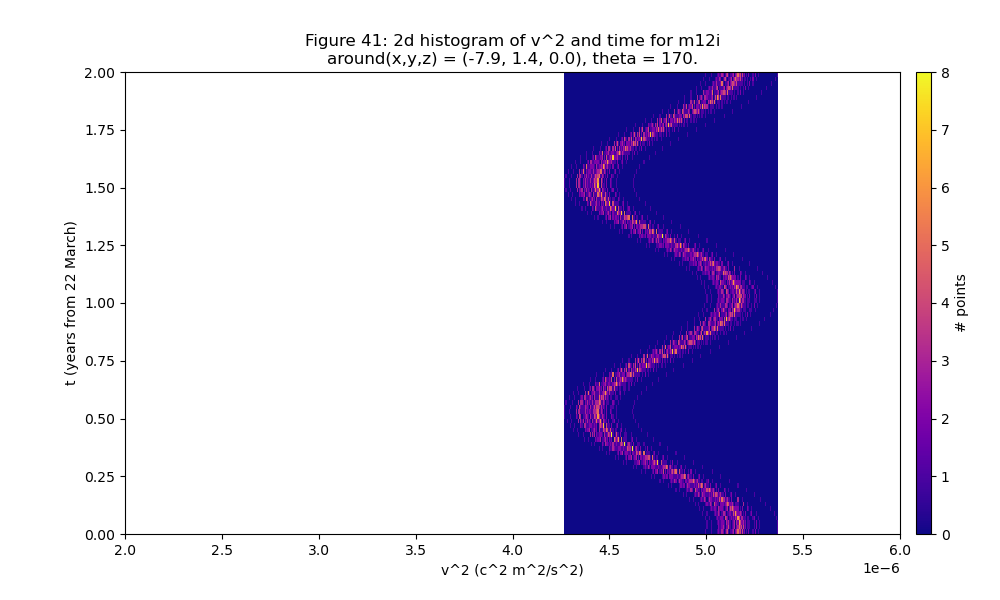

In [72]:
%matplotlib widget
import h5py
import ipywidgets as widgets
import time
import numpy as np
import numpy.matlib
from copy import copy
import matplotlib.pyplot as plt
import math
import scipy.stats
from matplotlib.colors import LogNorm
from datetime import date
from IPython.display import clear_output

clear_output()

def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    if iteration == total: 
        print()

def speed2_generator(vR, vPhi, vz, t):
    #Get Earth velocity
    v_E = 29.79*(
        math.cos( ( (2*math.pi)/365 ) * t*365) * np.array([0.9941, 0.188, 0.0042]) +
        math.sin( ( (2*math.pi)/365 ) * t*365) * np.array([-0.0504, 0.4946, -0.8677])
    )
    v_PEC_LSR = np.array([11.1, 232.2, 7.3])
    v_E_total = v_E + v_PEC_LSR
    
    stream_filter = np.logical_and(np.logical_and(np.logical_and(np.logical_and(np.logical_and(vR >= -470, vR <= -445), vPhi <= 225), vPhi >= 190), vz <=-100), vz >= -120)
    
# We see that the stream is at       190 <= vPhi <= 225,
#                                   -470 <=  vR  <= -445,
#                                   -120 <=  vz  <= -100
    # get particle velocities (earth) as N x 3 array
    vR_lab = (vR - v_E_total[0])[stream_filter]
    vPhi_lab = (vPhi + v_E_total[1])[stream_filter]
    vz_lab = (vz - v_E_total[2])[stream_filter]
    
    return (vR_lab**2 + vPhi_lab**2 + vz_lab**2)/(300000**2)

fig, ax = plt.subplots(figsize=(10,6))

def data_function(galaxy, theta):
    snapshot = galaxy
    f = h5py.File(snapshot+"_darkmatter.hdf5", 'r')
    # get particle positions (Earth) as N x 3 array
    pos = np.array(f.get('position'))
    x_lab = pos[:,0]-8*math.cos(theta*math.pi/180)
    y_lab = pos[:,1]-8*math.sin(theta*math.pi/180)
    z_lab = pos[:,2]
    # get particle velocities (galaxy) as N x 3 array
    vel = np.array(f.get('velocity'))
    vx = vel[:,0]
    vy = vel[:,1]
    vz = vel[:,2]
    
    vR = (vx*(x_lab+8*math.cos(theta*math.pi/180))+vy*(y_lab+8*math.sin(theta*math.pi/180)))/np.sqrt((x_lab+8*math.cos(theta*math.pi/180))**2 + (y_lab+8*math.sin(theta*math.pi/180))**2)
    vPhi = ((x_lab+8*math.cos(theta*math.pi/180))*vy - (y_lab+8*math.sin(theta*math.pi/180))*vx)/np.sqrt((x_lab+8*math.cos(theta*math.pi/180))**2 + (y_lab+8*math.sin(theta*math.pi/180))**2)
    position_filter = np.sqrt(x_lab**2 + y_lab**2 + z_lab**2) <= 2
    
    vR = vR[position_filter]
    vPhi = vPhi[position_filter]
    vz = vz[position_filter]
    
    times = np.linspace(0,2,100)
    for t in times:
        if t == 0:
            speeds = np.array(speed2_generator(vR, vPhi, vz, t))
        else:
            speeds = np.vstack([speeds, speed2_generator(vR, vPhi, vz, t)])

    times = np.reshape(np.repeat(times, np.size(speeds[0])), (np.size(times), np.size(speeds[0]))).flatten()
    speeds = speeds.flatten()
    return [times, speeds]

cmap = copy(plt.cm.plasma)
cmap.set_bad(cmap(0))


Galaxy='m12i'
Theta = 170
output = data_function(Galaxy, Theta)
h, xedges, yedges = np.histogram2d(output[1], output[0], bins=[200, 100])
pcm = ax.pcolormesh(xedges, yedges, h.T, cmap=cmap)                              #cmap='binary' gives a nicer plot at lower upper bounds
ax.set_xlabel('v^2 (c^2 m^2/s^2)')
ax.set_ylabel('t (years from 22 March)')
ax.set_title('Figure 41: 2d histogram of v^2 and time for {}\naround(x,y,z) = ({}, {}, 0.0), theta = {}.'.format(Galaxy, round(8*math.cos(Theta*math.pi/180),1), round(8*math.sin(Theta*math.pi/180),1), Theta))
cax = ax.inset_axes([1.02, 0, 0.02, 1], transform=ax.transAxes)
fig.colorbar(pcm, ax=ax, cax=cax, label='# points')
plt.xlim([2e-6,6e-6])
plt.show()



### Stream Data

In [73]:
%matplotlib inline
import h5py
import time
import numpy as np
import matplotlib.pyplot as plt
import math
from IPython.display import clear_output

clear_output()


'''
Importing positions and velocities in Earth frame ===========================================================================
'''
theta=170

from datetime import date

base_date = date(2022, 3, 22)
current_date = date(2022, 3, 22)
t = (current_date - base_date).days

v_E = 29.79*(
    math.cos( ( (2*math.pi)/365 ) * t) * np.array([0.9941, 0.188, 0.0042]) +
    math.sin( ( (2*math.pi)/365 ) * t) * np.array([-0.0504, 0.4946, -0.8677])
)

v_PEC = np.array([11.1, 12.2, 7.3])

v_LSR = np.array([0, 220, 0])


# cylindrical coordinates (vR, vPhi, vz)
v_E_total = v_E + v_PEC + v_LSR

snapshot = 'm12i' # m12i or m12f or m12m

f = h5py.File(snapshot+"_darkmatter.hdf5", 'r')

# get particle positions (galaxy) as N x 3 array
pos = np.array(f.get('position'))
x = pos[:,0]
y = pos[:,1]
z = pos[:,2]

# get particle velocities (galaxy) as N x 3 array
vel = np.array(f.get('velocity'))
vx = vel[:,0]
vy = vel[:,1]
vz = vel[:,2]


x_lab = x-8*math.cos(theta*math.pi/180)
y_lab = y-8*math.sin(theta*math.pi/180)
z_lab = z


position_filter = np.sqrt(x_lab**2 + y_lab**2 + z_lab**2) <= 2

vR = (vx*x+vy*y)/np.sqrt(x**2 + y**2)

vPhi = (x*vy - y*vx)/np.sqrt(x**2 + y**2)
#vPhi > 0 means clockwise rotation

vR = vR[position_filter]
vPhi = vPhi[position_filter]
vz = vz[position_filter]

stream_filter = np.logical_and(np.logical_and(np.logical_and(np.logical_and(np.logical_and(vR >= -470, vR <= -445), vPhi <= 225), vPhi >= 190), vz <=-100), vz >= -120)

# get particle velocities (earth) as N x 3 array
vR_lab = (vR - v_E_total[0])[stream_filter]
vPhi_lab = (vPhi + v_E_total[1])[stream_filter]
vz_lab = (vz - v_E_total[2])[stream_filter]


'''
=============================================================================================================================
'''


print('Velocity:')

print('{:>10.1f}  +-  {:.1f}'.format(np.mean(vR_lab),   np.var(vR_lab)))
print('{:>10.1f}  +-  {:.1f}   km/s'.format(np.mean(vPhi_lab), np.var(vPhi_lab)))
print('{:>10.1f}  +-  {:.1f}'.format(np.mean(vz_lab),   np.var(vz_lab)))

print()
print('Speed:')
print('{:>10.1f}  +-  {:.1f}   km/s'.format(math.sqrt(np.mean(vz_lab)**2 + np.mean(vR_lab)**2 + np.mean(vPhi_lab)**2), math.sqrt(np.std(vz_lab)**2 + np.std(vR_lab)**2 + np.var(vPhi_lab)**2)))

Velocity:
    -498.8  +-  14.7
     447.9  +-  54.1   km/s
    -117.4  +-  14.8

Speed:
     680.6  +-  54.4   km/s


# Week 10

## Fixing Numerical Integral (Again)
(figure 50a)

Changes:

    + Histogram integral is sum (f(w))^2 where it is normalised with sum f(w) = 1

interactive(children=(Dropdown(description='Galaxy', options=('m12i', 'm12f', 'm12m'), value='m12i'), IntSlide…

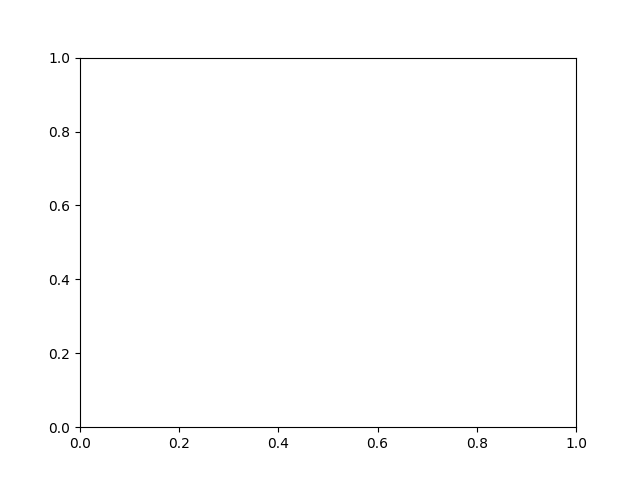

In [4]:
%matplotlib widget
#Speed distribution with sliders for galaxy type and lab/galaxy frame
import h5py
import numpy as np
import math
import matplotlib.pyplot as plt
import ipywidgets as widgets
from datetime import date
from IPython.display import clear_output
import scipy.integrate as integrate

clear_output()

base_date = date(2022, 3, 22)
current_date = date(2022, 3, 22)
t = (current_date - base_date).days



# The parametrized function to be plotted
def histogram(galaxy_name, time, theta):
    snapshot = galaxy_name
    f = h5py.File(snapshot+"_darkmatter.hdf5", 'r')
    # get particle positions (Earth) as N x 3 array
    pos = np.array(f.get('position'))
    x_lab = pos[:,0]-8*math.cos(theta*math.pi/180)
    y_lab = pos[:,1]-8*math.sin(theta*math.pi/180)
    z_lab = pos[:,2]
    position_filter = np.sqrt(x_lab**2 + y_lab**2 + z_lab**2) <= 2
    x_lab = x_lab[position_filter]
    y_lab = y_lab[position_filter]
    z_lab = z_lab[position_filter]
    # get particle velocities (galaxy) as N x 3 array
    vel = np.array(f.get('velocity'))
    vx = vel[:,0][position_filter]
    vy = vel[:,1][position_filter]
    vz = vel[:,2][position_filter]
    
    vR = (vx*(x_lab+8*math.cos(theta*math.pi/180))+vy*(y_lab+8*math.sin(theta*math.pi/180)))/np.sqrt((x_lab+8*math.cos(theta*math.pi/180))**2 + (y_lab+8*math.sin(theta*math.pi/180))**2)
    vPhi = ((x_lab+8*math.cos(theta*math.pi/180))*vy - (y_lab+8*math.sin(theta*math.pi/180))*vx)/np.sqrt((x_lab+8*math.cos(theta*math.pi/180))**2 + (y_lab+8*math.sin(theta*math.pi/180))**2)
    
    v_E = 29.79*(
        math.cos( ( (2*math.pi)/365 ) * time) * np.array([0.9941, 0.188, 0.0042]) +
        math.sin( ( (2*math.pi)/365 ) * time) * np.array([-0.0504, 0.4946, -0.8677])
    )
    v_PEC_LSR = np.array([11.1, 232.2, 7.3])
    v_E_total = v_E + v_PEC_LSR
    vR = vR - v_E_total[0]
    vPhi = vPhi + v_E_total[1]
    vz = vz - v_E_total[2]
    
    v_lab = np.sqrt(v_E_total[0]**2 + v_E_total[1]**2 + v_E_total[2]**2)
    speeds = np.sqrt(vR**2 + vPhi**2 + vz**2)/299792
    return speeds**2


galaxy_name = 'm12i'  # 'm12i' or 'm12f' or 'm12m'
frame = 'Galaxy'      # 'Galaxy' or 'Lab'

fig, ax = plt.subplots()

# Reference function to be numerically integrated, comes from eq'n 25 of https://arxiv.org/pdf/1701.03118.pdf
def f_lab_vt(v_gal,time):
    v_E = 29.79*(
        math.cos( ( (2*math.pi)/365 ) * time) * np.array([0.9941, 0.188, 0.0042]) +
        math.sin( ( (2*math.pi)/365 ) * time) * np.array([-0.0504, 0.4946, -0.8677])
    )
    v_PEC_LSR = np.array([11.1, 232.2, 7.3])
    v_E_total = v_E + v_PEC_LSR
    v_0 = 220/299792
    v_lab = np.sqrt(v_E_total[0]**2 + v_E_total[1]**2 + v_E_total[2]**2)/299792
    f_lab_vt = ( 2*np.sqrt(v_gal)*np.exp(-(np.sqrt(v_gal)**2 + v_lab**2)/(v_0**2))*np.sinh( (2*v_lab*np.sqrt(v_gal))/(v_0**2) ) ) / ( math.pi*math.sqrt(math.pi)*v_0*v_lab)
    return (f_lab_vt**2)

def f_lab_vt1(v_gal,time):
    v_E = 29.79*(
        math.cos( ( (2*math.pi)/365 ) * time) * np.array([0.9941, 0.188, 0.0042]) +
        math.sin( ( (2*math.pi)/365 ) * time) * np.array([-0.0504, 0.4946, -0.8677])
    )
    v_PEC_LSR = np.array([11.1, 232.2, 7.3])
    v_E_total = v_E + v_PEC_LSR
    v_0 = 220/299792
    v_lab = np.sqrt(v_E_total[0]**2 + v_E_total[1]**2 + v_E_total[2]**2)/299792
    f_lab_vt = ( 2*np.sqrt(v_gal)*np.exp(-(np.sqrt(v_gal)**2 + v_lab**2)/(v_0**2))*np.sinh( (2*v_lab*np.sqrt(v_gal))/(v_0**2) ) ) / ( math.pi*math.sqrt(math.pi)*v_0*v_lab)
    return f_lab_vt

# The function to be called anytime a slider's value changes
@widgets.interact_manual(Galaxy=['m12i', 'm12f', 'm12m'], time=widgets.IntSlider(min=0, max=365, value=0, step=1), Theta=range(0,356,5))
def update(Galaxy='m12i', time=0, Theta=0):
    x_variable = histogram(Galaxy,time,Theta)
    hist, edges = np.histogram(x_variable, bins=30)
    
    #Histogram is scaled verically to match eq'n 25 from https://arxiv.org/pdf/1701.03118.pdf
    hist = hist / np.sum(hist)
    
    plt.bar(edges[:-1],hist,width=edges[1]-edges[0], alpha=0.5, label='{}, t = {}, theta = {}'.format(Galaxy,time,Theta))
    plt.xlabel('v (multiples of c)', fontsize=18)
    plt.ylabel('Proportion', fontsize=18)
    
    #Numerical integral from scaled histogram of data
    num_int = 0
    for i in range(0,len(hist)):
        num_int += (hist[i])**2
    
    #Reference integral using eq'n 25 from https://arxiv.org/pdf/1701.03118.pdf
    ref_int = integrate.quad(f_lab_vt, np.min(edges), np.max(edges), args=(time))
    y_f_lab_vt1 = f_lab_vt1(np.linspace(np.min(edges),np.max(edges),100), time)*np.max(hist)/np.max(f_lab_vt1(np.linspace(np.min(edges),np.max(edges),100), time))
    #plt.plot(np.linspace(np.min(edges),np.max(edges),100), y_f_lab_vt1)
    print("Numerical integral value: {}".format(num_int))
    print("Reference integral value: {}".format(ref_int[0]))
    plt.legend()
plt.show()

## Fixing Numerical Integral (Again)
(figure 50b)

Changes:

    + Histogram integral is sum (f(w))^2 where it is normalised with sum f(w) = 1
    
    + Reference integral is sum (f(w))^2 over the same number of points at the same values as the simulation histogram

interactive(children=(Dropdown(description='Galaxy', options=('m12i', 'm12f', 'm12m'), value='m12i'), IntSlide…

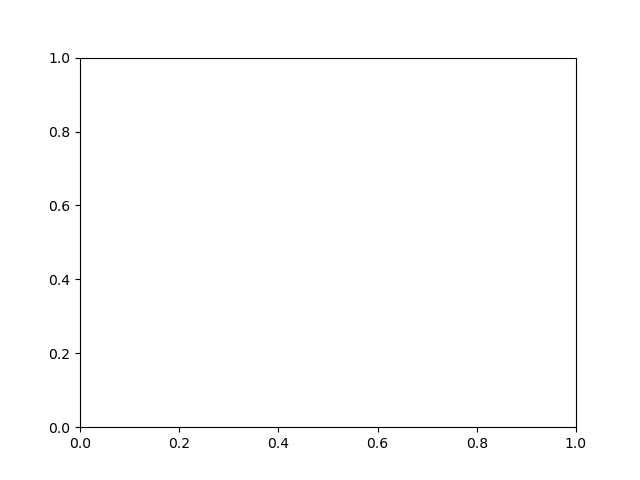

In [117]:
%matplotlib widget
#Speed distribution with sliders for galaxy type and lab/galaxy frame
import h5py
import numpy as np
import math
import matplotlib.pyplot as plt
import ipywidgets as widgets
from datetime import date
from IPython.display import clear_output
import scipy.integrate as integrate

clear_output()

base_date = date(2022, 3, 22)
current_date = date(2022, 3, 22)
t = (current_date - base_date).days



# The parametrized function to be plotted
def histogram(galaxy_name, time, theta):
    snapshot = galaxy_name
    f = h5py.File(snapshot+"_darkmatter.hdf5", 'r')
    # get particle positions (Earth) as N x 3 array
    pos = np.array(f.get('position'))
    x_lab = pos[:,0]-8*math.cos(theta*math.pi/180)
    y_lab = pos[:,1]-8*math.sin(theta*math.pi/180)
    z_lab = pos[:,2]
    position_filter = np.sqrt(x_lab**2 + y_lab**2 + z_lab**2) <= 2
    x_lab = x_lab[position_filter]
    y_lab = y_lab[position_filter]
    z_lab = z_lab[position_filter]
    # get particle velocities (galaxy) as N x 3 array
    vel = np.array(f.get('velocity'))
    vx = vel[:,0][position_filter]
    vy = vel[:,1][position_filter]
    vz = vel[:,2][position_filter]
    
    vR = (vx*(x_lab+8*math.cos(theta*math.pi/180))+vy*(y_lab+8*math.sin(theta*math.pi/180)))/np.sqrt((x_lab+8*math.cos(theta*math.pi/180))**2 + (y_lab+8*math.sin(theta*math.pi/180))**2)
    vPhi = ((x_lab+8*math.cos(theta*math.pi/180))*vy - (y_lab+8*math.sin(theta*math.pi/180))*vx)/np.sqrt((x_lab+8*math.cos(theta*math.pi/180))**2 + (y_lab+8*math.sin(theta*math.pi/180))**2)
    
    v_E = 29.79*(
        math.cos( ( (2*math.pi)/365 ) * time) * np.array([0.9941, 0.188, 0.0042]) +
        math.sin( ( (2*math.pi)/365 ) * time) * np.array([-0.0504, 0.4946, -0.8677])
    )
    v_PEC_LSR = np.array([11.1, 232.2, 7.3])
    v_E_total = v_E + v_PEC_LSR
    vR = vR - v_E_total[0]
    vPhi = vPhi + v_E_total[1]
    vz = vz - v_E_total[2]
    
    v_lab = np.sqrt(v_E_total[0]**2 + v_E_total[1]**2 + v_E_total[2]**2)
    speeds = np.sqrt(vR**2 + vPhi**2 + vz**2)/299792
    return speeds**2


galaxy_name = 'm12i'  # 'm12i' or 'm12f' or 'm12m'
frame = 'Galaxy'      # 'Galaxy' or 'Lab'

fig, ax = plt.subplots()

# Reference function to be numerically integrated, comes from eq'n 25 of https://arxiv.org/pdf/1701.03118.pdf
def f_lab_vt(v_gal,time):
    v_E = 29.79*(
        math.cos( ( (2*math.pi)/365 ) * time) * np.array([0.9941, 0.188, 0.0042]) +
        math.sin( ( (2*math.pi)/365 ) * time) * np.array([-0.0504, 0.4946, -0.8677])
    )
    v_PEC_LSR = np.array([11.1, 232.2, 7.3])
    v_E_total = v_E + v_PEC_LSR
    v_0 = 220/299792
    v_lab = np.sqrt(v_E_total[0]**2 + v_E_total[1]**2 + v_E_total[2]**2)/299792
    f_lab_vt = ( 2*np.sqrt(v_gal)*np.exp(-(np.sqrt(v_gal)**2 + v_lab**2)/(v_0**2))*np.sinh( (2*v_lab*np.sqrt(v_gal))/(v_0**2) ) ) / ( math.pi*math.sqrt(math.pi)*v_0*v_lab)
    return (f_lab_vt**2)

def f_lab_vt1(v_gal,time):
    v_E = 29.79*(
        math.cos( ( (2*math.pi)/365 ) * time) * np.array([0.9941, 0.188, 0.0042]) +
        math.sin( ( (2*math.pi)/365 ) * time) * np.array([-0.0504, 0.4946, -0.8677])
    )
    v_PEC_LSR = np.array([11.1, 232.2, 7.3])
    v_E_total = v_E + v_PEC_LSR
    v_0 = 220/299792
    v_lab = np.sqrt(v_E_total[0]**2 + v_E_total[1]**2 + v_E_total[2]**2)/299792
    f_lab_vt = ( 2*np.sqrt(v_gal)*np.exp(-(np.sqrt(v_gal)**2 + v_lab**2)/(v_0**2))*np.sinh( (2*v_lab*np.sqrt(v_gal))/(v_0**2) ) ) / ( math.pi*math.sqrt(math.pi)*v_0*v_lab)
    return f_lab_vt

# The function to be called anytime a slider's value changes
@widgets.interact_manual(Galaxy=['m12i', 'm12f', 'm12m'], time=widgets.IntSlider(min=0, max=365, value=0, step=1), Theta=range(0,356,5))
def update(Galaxy='m12i', time=0, Theta=0):
    x_variable = histogram(Galaxy,time,Theta)
    hist, edges = np.histogram(x_variable, bins=17)
    
    #Histogram is scaled vertically to match eq'n 25 from https://arxiv.org/pdf/1701.03118.pdf
    hist = hist / np.sum(hist)
    
    plt.bar(edges[:-1],hist,width=edges[1]-edges[0], alpha=0.5, label='{}, t = {}, theta = {} (data)'.format(Galaxy,time,Theta))
    plt.xlabel('v (multiples of c)')
    plt.ylabel('Proportion')
    plt.title('Figure 49b: Proportion of DM particles in sphere with a given energy.')
    
    #Reference integral using eq'n 25 from https://arxiv.org/pdf/1701.03118.pdf
    hist_velocities = np.array([])
    for i in range(0,len(edges)-1):
        hist_velocities = np.append(hist_velocities, (edges[i]+edges[i+1])/2)
    reference_hist = f_lab_vt(hist_velocities, time)
    reference_hist = reference_hist/np.sum(reference_hist)
    
    #Numerical integral from scaled histogram of data
    num_int = 0
    ref_int = 0
    for i in range(0,len(hist)):
        num_int += hist[i]**2
        ref_int += reference_hist[i]**2

    plt.bar(edges[:-1],reference_hist,width=edges[1]-edges[0], alpha=0.5, label='{}, t = {}, theta = {} (reference)'.format(Galaxy,time,Theta))
    print("Numerical integral value: {}".format(num_int))
    print("Reference integral value: {}".format(ref_int))
    print("Ratio: {}".format(num_int/ref_int))
    plt.legend()
plt.show()

## Plotting ratio of numerical integral to reference integral
(figure 51a)

Changes:

    + Histogram integral is sum (f(w))^2 where it is normalised with sum f(w) = 1

In [ ]:
%matplotlib widget
#Speed distribution with sliders for galaxy type and lab/galaxy frame
import h5py
import numpy as np
import math
import matplotlib.pyplot as plt
import ipywidgets as widgets
from datetime import date
from IPython.display import clear_output
import scipy.integrate as integrate
import time as timer

clear_output()

base_date = date(2022, 3, 22)
current_date = date(2022, 3, 22)
t = (current_date - base_date).days

def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    if iteration == total: 
        print()

# The parametrized function to be plotted
def histogram(pos, vel, time, theta, v_E_total):
    x = pos[:,0]
    y = pos[:,1]
    z = pos[:,2]
    
    position_filter = np.sqrt((x-8*math.cos(theta*math.pi/180))**2 + (y-8*math.sin(theta*math.pi/180))**2 + z**2) <= 1
    
    
    x = x[position_filter]
    y = y[position_filter]
    z_lab = z[position_filter]
    x_lab = x-8*math.cos(theta*math.pi/180)
    y_lab = y-8*math.sin(theta*math.pi/180)
    
    vx = vel[:,0][position_filter]
    vy = vel[:,1][position_filter]
    vz = vel[:,2][position_filter] - v_E_total[2]
    
    radius = np.sqrt(x**2 + y**2)
    vR = (vx*x+vy*y)/radius - v_E_total[0]
    vPhi = (x*vy - y*vx)/radius + v_E_total[1]
    
    v_lab = np.sqrt(v_E_total[0]**2 + v_E_total[1]**2 + v_E_total[2]**2)
    speeds = np.sqrt(vR**2 + vPhi**2 + vz**2)/299792
    return speeds**2


galaxy_name = 'm12i'  # 'm12i' or 'm12f' or 'm12m'
frame = 'Galaxy'      # 'Galaxy' or 'Lab'


# Reference function to be numerically integrated, comes from eq'n 25 of https://arxiv.org/pdf/1701.03118.pdf
def f_lab_vt(v_gal,time):
    v_E = 29.79*(
        math.cos( ( (2*math.pi)/365 ) * time) * np.array([0.9941, 0.188, 0.0042]) +
        math.sin( ( (2*math.pi)/365 ) * time) * np.array([-0.0504, 0.4946, -0.8677])
    )
    v_PEC_LSR = np.array([11.1, 232.2, 7.3])
    v_E_total = v_E + v_PEC_LSR
    v_0 = 220/299792
    v_lab = np.sqrt(v_E_total[0]**2 + v_E_total[1]**2 + v_E_total[2]**2)/299792
    f_lab_vt = ( 2*np.sqrt(v_gal)*np.exp(-(np.sqrt(v_gal)**2 + v_lab**2)/(v_0**2))*np.sinh( (2*v_lab*np.sqrt(v_gal))/(v_0**2) ) ) / ( math.pi*math.sqrt(math.pi)*v_0*v_lab)
    #normalise integral of f_lab_vt to be 1
    #constant = integrate.quad(f_lab_vt1)...
    return (f_lab_vt**2)

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)

# The function to be called anytime a slider's value changes
@widgets.interact_manual(time=widgets.IntSlider(min=0, max=365, value=0, step=1))
def update(time=0):
    n=100
    bin_num = 10
    thetas = np.linspace(0,360,n)
    colours=['b','g','r']
    for j in range(0,3):
        Galaxy = ['m12i', 'm12f', 'm12m'][j]
        ratios = np.array([])
        
        f = h5py.File(Galaxy+"_darkmatter.hdf5", 'r')
        # get particle positions (Earth) as N x 3 array
        pos = np.array(f.get('position'))
        # get particle velocities (galaxy) as N x 3 array
        vel = np.array(f.get('velocity'))
        
        v_E = 29.79*(
            math.cos( ( (2*math.pi)/365 ) * time) * np.array([0.9941, 0.188, 0.0042]) +
            math.sin( ( (2*math.pi)/365 ) * time) * np.array([-0.0504, 0.4946, -0.8677])
        )
        v_PEC_LSR = np.array([11.1, 232.2, 7.3])
        v_E_total = v_E + v_PEC_LSR
        
        for Theta in thetas:
            t1 = timer.time()
            x_variable = histogram(pos, vel,time,Theta, v_E_total)
            t2 = timer.time()
            hist, edges = np.histogram(x_variable, bins=bin_num) #density = True
            #Histogram is scaled vertically to match eq'n 25 from https://arxiv.org/pdf/1701.03118.pdf
            hist = hist/np.sum(hist)

            #Numerical integral from scaled histogram of data
            num_int = 0
            for i in range(0,len(hist)):
                num_int += hist[i]**2
            #Reference integral using eq'n 25 from https://arxiv.org/pdf/1701.03118.pdf
            ref_int = integrate.quad(f_lab_vt, np.min(edges), np.max(edges), args=(time))[0]
            
            ratios = np.append(ratios, num_int/ref_int)
            printProgressBar(Theta,max(thetas),prefix=(Galaxy+" plot progress"), length=90)
        plt.plot(thetas, ratios, label=Galaxy, color=colours[j], linewidth=0.5)
        plt.plot(thetas, np.repeat(np.mean(ratios),n), linestyle='dashed', alpha=0.5, color=colours[j], linewidth=0.5)
    plt.ylabel('I_numerical / I_reference')
    plt.xlabel('theta (degrees)')
    plt.title("""Figure 50a: ratio of numerical and reference integrals vs theta. n={}, bins={}""".format(n,bin_num))
    plt.legend()
plt.show()

## Plotting ratio of numerical integral to reference integral
(figure 51b)

Changes:

    + Histogram integral is sum (f(w))^2 where it is normalised with sum f(w) = 1
    
    + Reference integral is sum (f(w))^2 over the same number of points at the same values as the simulation histogram

In [ ]:
%matplotlib widget
#Speed distribution with sliders for galaxy type and lab/galaxy frame
import h5py
import numpy as np
import math
import matplotlib.pyplot as plt
import ipywidgets as widgets
from datetime import date
from IPython.display import clear_output
import scipy.integrate as integrate
import time as timer

clear_output()

base_date = date(2022, 3, 22)
current_date = date(2022, 3, 22)
t = (current_date - base_date).days

def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    if iteration == total: 
        print()

# The parametrized function to be plotted
def histogram(pos, vel, time, theta, v_E_total):
    x = pos[:,0]
    y = pos[:,1]
    z = pos[:,2]
    
    position_filter = np.sqrt((x-8*math.cos(theta*math.pi/180))**2 + (y-8*math.sin(theta*math.pi/180))**2 + z**2) <= 1
    
    
    x = x[position_filter]
    y = y[position_filter]
    z_lab = z[position_filter]
    x_lab = x-8*math.cos(theta*math.pi/180)
    y_lab = y-8*math.sin(theta*math.pi/180)
    
    vx = vel[:,0][position_filter]
    vy = vel[:,1][position_filter]
    vz = vel[:,2][position_filter] - v_E_total[2]
    
    radius = np.sqrt(x**2 + y**2)
    vR = (vx*x+vy*y)/radius - v_E_total[0]
    vPhi = (x*vy - y*vx)/radius + v_E_total[1]
    
    v_lab = np.sqrt(v_E_total[0]**2 + v_E_total[1]**2 + v_E_total[2]**2)
    speeds = np.sqrt(vR**2 + vPhi**2 + vz**2)/299792
    return speeds**2


galaxy_name = 'm12i'  # 'm12i' or 'm12f' or 'm12m'
frame = 'Galaxy'      # 'Galaxy' or 'Lab'


# Reference function to be numerically integrated, comes from eq'n 25 of https://arxiv.org/pdf/1701.03118.pdf
def f_lab_vt(v_gal,time):
    v_E = 29.79*(
        math.cos( ( (2*math.pi)/365 ) * time) * np.array([0.9941, 0.188, 0.0042]) +
        math.sin( ( (2*math.pi)/365 ) * time) * np.array([-0.0504, 0.4946, -0.8677])
    )
    v_PEC_LSR = np.array([11.1, 232.2, 7.3])
    v_E_total = v_E + v_PEC_LSR
    v_0 = 220/299792
    v_lab = np.sqrt(v_E_total[0]**2 + v_E_total[1]**2 + v_E_total[2]**2)/299792
    f_lab_vt = ( 2*np.sqrt(v_gal)*np.exp(-(np.sqrt(v_gal)**2 + v_lab**2)/(v_0**2))*np.sinh( (2*v_lab*np.sqrt(v_gal))/(v_0**2) ) ) / ( math.pi*math.sqrt(math.pi)*v_0*v_lab)
    #normalise integral of f_lab_vt to be 1
    #constant = integrate.quad(f_lab_vt1)...
    return (f_lab_vt**2)

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)

# The function to be called anytime a slider's value changes
@widgets.interact_manual(time=widgets.IntSlider(min=0, max=365, value=0, step=1))
def update(time=0):
    n=100
    bin_num = 10
    thetas = np.linspace(0,360,n)
    colours=['b','g','r']
    for j in range(0,3):
        Galaxy = ['m12i', 'm12f', 'm12m'][j]
        ratios = np.array([])
        
        f = h5py.File(Galaxy+"_darkmatter.hdf5", 'r')
        # get particle positions (Earth) as N x 3 array
        pos = np.array(f.get('position'))
        # get particle velocities (galaxy) as N x 3 array
        vel = np.array(f.get('velocity'))
        
        v_E = 29.79*(
            math.cos( ( (2*math.pi)/365 ) * time) * np.array([0.9941, 0.188, 0.0042]) +
            math.sin( ( (2*math.pi)/365 ) * time) * np.array([-0.0504, 0.4946, -0.8677])
        )
        v_PEC_LSR = np.array([11.1, 232.2, 7.3])
        v_E_total = v_E + v_PEC_LSR
        
        for Theta in thetas:
            t1 = timer.time()
            x_variable = histogram(pos, vel,time,Theta, v_E_total)
            t2 = timer.time()
            hist, edges = np.histogram(x_variable, bins=bin_num)
            #Histogram is scaled vertically to match eq'n 25 from https://arxiv.org/pdf/1701.03118.pdf
            hist = hist/np.sum(hist)
            
            
            #Reference integral using eq'n 25 from https://arxiv.org/pdf/1701.03118.pdf
            hist_velocities = np.array([])
            for i in range(0,len(edges)-1):
                hist_velocities = np.append(hist_velocities, (edges[i]+edges[i+1])/2)
            reference_hist = f_lab_vt(hist_velocities, time)
            reference_hist = reference_hist/np.sum(reference_hist)
            
            #Numerical integral from scaled histogram of data
            num_int = 0
            ref_int = 0
            for i in range(0,len(hist)):
                num_int += hist[i]**2
                ref_int += reference_hist[i]**2
            
            ratios = np.append(ratios, num_int/ref_int)
            printProgressBar(Theta,max(thetas),prefix=(Galaxy+" plot progress"), length=90)
        plt.plot(thetas, ratios, label=Galaxy, color=colours[j], linewidth=0.5)
        plt.plot(thetas, np.repeat(np.mean(ratios),n), linestyle='dashed', alpha=0.5, color=colours[j], linewidth=0.5)
    plt.ylabel('I_numerical / I_reference')
    plt.xlabel('theta (degrees)')
    plt.title("""Figure 50b: ratio of numerical and reference integrals vs theta. n={}, bins={}""".format(n,bin_num))
    plt.legend()
plt.show()

# n=100, bins=20, x=302 for peak m12m
# n=100, bins=10, x=301 for peak m12m

# Week 11

Fig 36: fixed bin positions. m12m looks normal now. Changed x axis to use datetime scale.

Fig 38: checked to ensure that bins are fixed. They were not, but the graph shouldn't be different.

Fig 12: broken into figure 52a and 52b below. EV Maxwellian distribution fits both figures.

Fig 52a: turned into figure 53. Increased sphere radius from 1 to 1.5 kpc. Fixed bin positions with linspace(0,4e-6,num_bins+1)

## Figure 36

In [ ]:
%matplotlib widget
#Speed distribution with sliders for galaxy type and lab/galaxy frame
import h5py
import numpy as np
import math
import matplotlib.pyplot as plt
import ipywidgets as widgets
import time
import scipy.optimize as opt
from IPython.display import clear_output

clear_output()



#array_binned_mode() finds the peak in a histogram
def bin_height(array, bin_num, bins):
    freq, bins = np.histogram(array, bins=bins)
    return freq[bin_num-1]


base_date = date(2022, 3, 22)
current_date = date(2022, 3, 22)
t = (current_date - base_date).days

f_m12i = h5py.File("m12i_darkmatter.hdf5", 'r')
f_m12f = h5py.File("m12f_darkmatter.hdf5", 'r')
f_m12m = h5py.File("m12m_darkmatter.hdf5", 'r')

def func(t, A, w, t1, B):
    return A*np.cos(w*(t-t1))+B


# The parametrized function to be plotted
def curve(galaxy_name, times, bin_num):
    heights = []
    if galaxy_name == "m12i":
        pos = np.array(f_m12i.get('position'))
        vel = np.array(f_m12i.get('velocity'))
    elif galaxy_name == "m12f":
        pos = np.array(f_m12f.get('position'))
        vel = np.array(f_m12f.get('velocity'))
    elif galaxy_name == "m12m":
        pos = np.array(f_m12m.get('position'))
        vel = np.array(f_m12m.get('velocity'))
    x = pos[:,0]
    y = pos[:,1]
    z = pos[:,2]
    vx = vel[:,0]
    vy = vel[:,1]
    costheta = x/np.sqrt(x**2 + y**2)
    sintheta = y/np.sqrt(x**2 + y**2)
    earth_ring_filter = ( (x-8*costheta)**2 + (y-8*sintheta)**2+z**2 <= 1 )
    pos = pos[earth_ring_filter]
    vel = vel[earth_ring_filter]
    x = pos[:,0]-8
    y = pos[:,1]
    z = pos[:,2]
    vx = vel[:,0]
    vy = vel[:,1]
    for t in times:
        radius = np.sqrt(x**2 + y**2)
        v_E = 29.79*(
            math.cos( ( (2*math.pi)/365 ) * t) * np.array([0.9941, 0.188, 0.0042]) +
            math.sin( ( (2*math.pi)/365 ) * t) * np.array([-0.0504, 0.4946, -0.8677])
        )
        v_PEC_LSR = np.array([11.1, 232.2, 7.3])
        v_E_total = v_E + v_PEC_LSR
        vR = ((vx*x+vy*y)/radius) - v_E_total[0]
        vPhi = ((x*vy - y*vx)/radius) + v_E_total[1]
        vz = vel[:,2] - v_E_total[2]
        speeds = np.sqrt(vR**2 + vPhi**2 + vz**2)/299792
        x_variable = 0.5*speeds**2
        heights.append(bin_height(x_variable, bin_num, np.linspace(0,4e-6,11)))
    return heights


fig, ax = plt.subplots()
import matplotlib.dates as mdates
import datetime as dt

now = dt.date(2022,3,22)
then = now + dt.timedelta(days=730)
days = mdates.drange(now,then,dt.timedelta(days=1))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=146))
times = np.linspace(1, 730, 730)

# The function to be called anytime a slider's value changes
@widgets.interact_manual(Galaxy=['m12i', 'm12f', 'm12m'], Bin_Number=range(1,11))
def update(Galaxy='m12i', Bin_Number=2):
    line = ax.plot(days, curve(Galaxy, times, Bin_Number), label='{} (bin {})'.format(Galaxy, Bin_Number))
    plt.legend()
    optimizedParameters, pcov = opt.curve_fit(func, xdata=times, ydata=curve(Galaxy, times, Bin_Number), p0=[500, 0.0123, 23.5, 51])
    print(optimizedParameters)
    ax.plot(days, func(times, *optimizedParameters), label="fit for [{} (bin {})]".format(Galaxy, Bin_Number)) 
    plt.gcf().autofmt_xdate()   
    plt.xlabel('Time (days from 22 March)')
    plt.ylabel('Height of bin')
    plt.title('Figure 36: Height of bins in energy distribution over time.')
plt.show()

## Figure 52

In [ ]:
%matplotlib widget
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

'''
Importing data & setup =======================================================================================================
'''
snapshot = 'm12i' # m12i or m12f or m12m

f = h5py.File(snapshot+"_darkmatter.hdf5", 'r')

# get particle positions (galaxy) as N x 3 array
pos = np.array(f.get('position'))
x = pos[:,0]
y = pos[:,1]
z = pos[:,2]

# get particle velocities (galaxy) as N x 3 array
vel = np.array(f.get('velocity'))
vx = vel[:,0]
vy = vel[:,1]
vz = vel[:,2]

costheta = x/np.sqrt(x**2 + y**2)
sintheta = y/np.sqrt(x**2 + y**2)

earth_ring_filter = ( (x-8*costheta)**2 + (y-8*sintheta)**2+z**2 <= 1 )

ring_dm_pos = pos[earth_ring_filter]

x = ring_dm_pos[:,0]
y = ring_dm_pos[:,1]
z = ring_dm_pos[:,2]

ring_dm_vel = vel[earth_ring_filter]

vx = ring_dm_vel[:,0]
vy = ring_dm_vel[:,1]
vz = ring_dm_vel[:,2]




from datetime import date

base_date = date(2022, 3, 22)
current_date = date(2022, 3, 22)
t = (current_date - base_date).days

v_E = 29.79*(
    math.cos( ( (2*math.pi)/365 ) * t) * np.array([0.9941, 0.188, 0.0042]) +
    math.sin( ( (2*math.pi)/365 ) * t) * np.array([-0.0504, 0.4946, -0.8677])
)

v_PEC = np.array([11.1, 12.2, 7.3])

v_LSR = np.array([0, 220, 0])


# cylindrical coordinates (vR, vPhi, vz)
v_E_total = v_E + v_PEC + v_LSR

vR = (vx*x+vy*y)/np.sqrt(x**2 + y**2)

vPhi = (x*vy - y*vx)/np.sqrt(x**2 + y**2)
#vPhi > 0 means clockwise rotation

# get particle positions (earth) as N x 3 array
x_lab = pos[:,0] - 8
y_lab = pos[:,1]
z_lab = pos[:,2]

# get particle velocities (earth) as N x 3 array
vR_lab = vR - v_E_total[0]
vPhi_lab = vPhi + v_E_total[1]
vz_lab = vz - v_E_total[2]

'''
==============================================================================================================================
'''


#model adjusts the maxwellian distribution to acount for escape velocity
def model(v,v_0,p,v_esc, A):
    fit = A*(((v)**2)*np.exp(-v / v_0)*(((v_esc)**2)-((v)**2))**p)
    return fit

galaxy_sphere_speed = np.sqrt(vx**2 + vy**2 + vz**2)
lab_sphere_speed = np.sqrt(vR_lab**2 + vPhi_lab**2 + vz_lab**2)

fig, ax = plt.subplots()

n, bins, patches = ax.hist(galaxy_sphere_speed, bins=100, density=True)

n, bins = np.histogram(galaxy_sphere_speed, bins=100, density=True)

bins = np.array([0.5*(bins[i]+bins[i+1]) for i in range(len(bins)-1)])

ans, cov = curve_fit(model, bins, n, p0=[928,2.32,537, 2.7e-20], maxfev = 2000)

#I had some issues with curve fitting as some initial test variables for v_esc gave v_esc^2 - v^2 < 0.
#Initialising p0 with proper values fixed this.

v = np.linspace(bins[0], bins[-1], 1000)

fv = model(v, *ans)

ax.plot(v, fv)
ax.set_xlabel('speed (km/s)')
ax.set_ylabel('proportion of DM particles')

ax.set_title("""Figure 52a: A histogram presenting the proportion of dark matter
particles with a given speed between 7 and 9 kpc from Galactic Center.""")

plt.show()





fig, ax = plt.subplots()

n, bins, patches = ax.hist(lab_sphere_speed, bins=100, density=True)

n, bins = np.histogram(lab_sphere_speed, bins=100, density=True)

bins = np.array([0.5*(bins[i]+bins[i+1]) for i in range(len(bins)-1)])

ans, cov = curve_fit(model, bins, n, p0=[500, 2.32, 750, 2.7e-20], maxfev = 100000)

#I had some issues with curve fitting as some initial test variables for v_esc gave v_esc^2 - v^2 < 0.
#Initialising p0 with proper values fixed this.

v = np.linspace(bins[0], bins[-1], 1000)

fv = model(v, *ans)

ax.plot(v, fv)
ax.set_xlabel('speed (km/s)')
ax.set_ylabel('proportion of DM particles')

ax.set_title("""Figure 52b: A histogram presenting the proportion of dark matter
particles with a given speed between 7 and 9 kpc from Galactic Center.""")

plt.show()

print('\n'*5)

## Figure 53

In [ ]:
%matplotlib widget
#Speed distribution with sliders for galaxy type and lab/galaxy frame
import h5py
import numpy as np
import math
import matplotlib.pyplot as plt
import ipywidgets as widgets
from datetime import date
from IPython.display import clear_output
import scipy.integrate as integrate
import time as timer

clear_output()

base_date = date(2022, 3, 22)
current_date = date(2022, 3, 22)
t = (current_date - base_date).days

def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    if iteration == total: 
        print()

# The parametrized function to be plotted
def histogram(pos, vel, time, theta, v_E_total):
    x = pos[:,0]
    y = pos[:,1]
    z = pos[:,2]
    
    position_filter = np.sqrt((x-8*math.cos(theta*math.pi/180))**2 + (y-8*math.sin(theta*math.pi/180))**2 + z**2) <= 1.5
    
    
    x = x[position_filter]
    y = y[position_filter]
    z_lab = z[position_filter]
    x_lab = x-8*math.cos(theta*math.pi/180)
    y_lab = y-8*math.sin(theta*math.pi/180)
    
    vx = vel[:,0][position_filter]
    vy = vel[:,1][position_filter]
    vz = vel[:,2][position_filter] - v_E_total[2]
    
    radius = np.sqrt(x**2 + y**2)
    vR = (vx*x+vy*y)/radius - v_E_total[0]
    vPhi = (x*vy - y*vx)/radius + v_E_total[1]
    
    v_lab = np.sqrt(v_E_total[0]**2 + v_E_total[1]**2 + v_E_total[2]**2)
    speeds = np.sqrt(vR**2 + vPhi**2 + vz**2)/299792
    return speeds**2


galaxy_name = 'm12i'  # 'm12i' or 'm12f' or 'm12m'
frame = 'Galaxy'      # 'Galaxy' or 'Lab'


# Reference function to be numerically integrated, comes from eq'n 25 of https://arxiv.org/pdf/1701.03118.pdf
def f_lab_vt(v_gal,time):
    v_E = 29.79*(
        math.cos( ( (2*math.pi)/365 ) * time) * np.array([0.9941, 0.188, 0.0042]) +
        math.sin( ( (2*math.pi)/365 ) * time) * np.array([-0.0504, 0.4946, -0.8677])
    )
    v_PEC_LSR = np.array([11.1, 232.2, 7.3])
    v_E_total = v_E + v_PEC_LSR
    v_0 = 220/299792
    v_lab = np.sqrt(v_E_total[0]**2 + v_E_total[1]**2 + v_E_total[2]**2)/299792
    f_lab_vt = ( 2*np.sqrt(v_gal)*np.exp(-(np.sqrt(v_gal)**2 + v_lab**2)/(v_0**2))*np.sinh( (2*v_lab*np.sqrt(v_gal))/(v_0**2) ) ) / ( math.pi*math.sqrt(math.pi)*v_0*v_lab)
    #normalise integral of f_lab_vt to be 1
    #constant = integrate.quad(f_lab_vt1)...
    return (f_lab_vt**2)

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)

# The function to be called anytime a slider's value changes
@widgets.interact_manual(time=widgets.IntSlider(min=0, max=365, value=0, step=1))
def update(time=0):
    n=500
    bin_num = 20
    thetas = np.linspace(0,360,n)
    colours=['b','g','r']
    for j in range(0,3):
        Galaxy = ['m12i', 'm12f', 'm12m'][j]
        ratios = np.array([])
        
        f = h5py.File(Galaxy+"_darkmatter.hdf5", 'r')
        # get particle positions (Earth) as N x 3 array
        pos = np.array(f.get('position'))
        # get particle velocities (galaxy) as N x 3 array
        vel = np.array(f.get('velocity'))
        
        v_E = 29.79*(
            math.cos( ( (2*math.pi)/365 ) * time) * np.array([0.9941, 0.188, 0.0042]) +
            math.sin( ( (2*math.pi)/365 ) * time) * np.array([-0.0504, 0.4946, -0.8677])
        )
        v_PEC_LSR = np.array([11.1, 232.2, 7.3])
        v_E_total = v_E + v_PEC_LSR
        
        for Theta in thetas:
            t1 = timer.time()
            x_variable = histogram(pos, vel,time,Theta, v_E_total)
            t2 = timer.time()
            hist, edges = np.histogram(x_variable, bins=np.linspace(0,6e-6,bin_num+1)) #density = True
            #Histogram is scaled vertically to match eq'n 25 from https://arxiv.org/pdf/1701.03118.pdf
            hist = hist/np.sum(hist)

            #Numerical integral from scaled histogram of data
            num_int = 0
            for i in range(0,len(hist)):
                num_int += hist[i]**2
            #Reference integral using eq'n 25 from https://arxiv.org/pdf/1701.03118.pdf
            ref_int = integrate.quad(f_lab_vt, np.min(edges), np.max(edges), args=(time))[0]
            
            ratios = np.append(ratios, num_int/ref_int)
            printProgressBar(Theta,max(thetas),prefix=(Galaxy+" plot progress"), length=90)
        plt.plot(thetas, ratios, label=Galaxy, color=colours[j], linewidth=0.5)
        plt.plot(thetas, np.repeat(np.mean(ratios),n), linestyle='dashed', alpha=0.5, color=colours[j], linewidth=0.5)
    plt.ylabel('I_numerical / I_reference')
    plt.xlabel('theta (degrees)')
    plt.title("""Figure 53: ratio of numerical and reference integrals vs theta. n={}, bins={}""".format(n,bin_num))
    plt.legend()
plt.show()

# Week 12


Fig 12: normalised to have sum(f(v))=1



## Figures 12a,12b (Speed Histograms)

turned into fig 54a,b

In [ ]:
%matplotlib widget
import h5py
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

'''
Importing data & setup =======================================================================================================
'''
snapshot = 'm12i' # m12i or m12f or m12m

f = h5py.File(snapshot+"_darkmatter.hdf5", 'r')

# get particle positions (galaxy) as N x 3 array
pos = np.array(f.get('position'))
x = pos[:,0]
y = pos[:,1]
z = pos[:,2]

# get particle velocities (galaxy) as N x 3 array
vel = np.array(f.get('velocity'))
vx = vel[:,0]
vy = vel[:,1]
vz = vel[:,2]

costheta = x/np.sqrt(x**2 + y**2)
sintheta = y/np.sqrt(x**2 + y**2)

earth_ring_filter = ( (x-8*costheta)**2 + (y-8*sintheta)**2+z**2 <= 1 )

ring_dm_pos = pos[earth_ring_filter]

x = ring_dm_pos[:,0]
y = ring_dm_pos[:,1]
z = ring_dm_pos[:,2]

ring_dm_vel = vel[earth_ring_filter]

vx = ring_dm_vel[:,0]
vy = ring_dm_vel[:,1]
vz = ring_dm_vel[:,2]




from datetime import date

base_date = date(2022, 3, 22)
current_date = date(2022, 3, 22)
t = (current_date - base_date).days

v_E = 29.79*(
    math.cos( ( (2*math.pi)/365 ) * t) * np.array([0.9941, 0.188, 0.0042]) +
    math.sin( ( (2*math.pi)/365 ) * t) * np.array([-0.0504, 0.4946, -0.8677])
)

v_PEC = np.array([11.1, 12.2, 7.3])

v_LSR = np.array([0, 220, 0])


# cylindrical coordinates (vR, vPhi, vz)
v_E_total = v_E + v_PEC + v_LSR

vR = (vx*x+vy*y)/np.sqrt(x**2 + y**2)

vPhi = (x*vy - y*vx)/np.sqrt(x**2 + y**2)
#vPhi > 0 means clockwise rotation

# get particle positions (earth) as N x 3 array
x_lab = pos[:,0] - 8
y_lab = pos[:,1]
z_lab = pos[:,2]

# get particle velocities (earth) as N x 3 array
vR_lab = vR - v_E_total[0]
vPhi_lab = vPhi + v_E_total[1]
vz_lab = vz - v_E_total[2]

#model adjusts the maxwellian distribution to acount for escape velocity
def model(v,v_0,p,v_esc, A):
    fit = A*(((v)**2)*np.exp(-v / v_0)*(((v_esc)**2)-((v)**2))**p)
    return fit

galaxy_sphere_speed = np.sqrt(vx**2 + vy**2 + vz**2)
lab_sphere_speed = np.sqrt(vR_lab**2 + vPhi_lab**2 + vz_lab**2)


'''
==============================================================================================================================
'''


#--------------------------------------------------Creating 12a---------------------------------------------------------------

fig, ax = plt.subplots()


n, bins = np.histogram(galaxy_sphere_speed, bins=30)

#Histogram is scaled vertically to match eq'n 25 from https://arxiv.org/pdf/1701.03118.pdf
n = n / np.sum(n)

plt.bar(bins[:-1],n,width=bins[1]-bins[0], alpha=0.5)


#----------Creating model------------
bins = np.array([0.5*(bins[i]+bins[i+1]) for i in range(len(bins)-1)])

ans, cov = curve_fit(model, bins, n, p0=[932,2.34,539, 2.4e-19], maxfev = 2000)

#I had some issues with curve fitting as some initial test variables for v_esc gave v_esc^2 - v^2 < 0.
#Initialising p0 with proper values fixed this.

v = np.linspace(bins[0], bins[-1], 1000)

fv = model(v, *ans)

print(*ans)

#-------------------------------------
plt.xlim([-20,750])
ax.plot(v, fv)
ax.set_xlabel('speed (km/s)', fontsize=14)
ax.set_ylabel('proportion', fontsize=14)

ax.set_title("""Figure 12a: A histogram presenting the proportion of dark matter particles
with a given speed between 7 and 9 kpc from Galactic Center (galaxy frame).""")

plt.show()

#-----------------------------------------------------------------------------------------------------------------------------


#--------------------------------------------------Creating 12b---------------------------------------------------------------

fig, ax = plt.subplots()

n, bins = np.histogram(lab_sphere_speed, bins=30)

#Histogram is scaled vertically to match eq'n 25 from https://arxiv.org/pdf/1701.03118.pdf
n = n / np.sum(n)

plt.bar(bins[:-1],n,width=bins[1]-bins[0], alpha=0.5)


#----------Creating model------------
bins = np.array([0.5*(bins[i]+bins[i+1]) for i in range(len(bins)-1)])

ans, cov = curve_fit(model, bins, n, p0=[500, 2.32, 750, 2.7e-20], maxfev = 20000)

#I had some issues with curve fitting as some initial test variables for v_esc gave v_esc^2 - v^2 < 0.
#Initialising p0 with proper values fixed this.

v = np.linspace(bins[0], bins[-1], 1000)

fv = model(v, *ans)

print(*ans)

#-------------------------------------
plt.xlim([-20,750])
ax.plot(v, fv)
ax.set_xlabel('speed (km/s)', fontsize=14)
ax.set_ylabel('proportion', fontsize=14)

ax.set_title("""Figure 12b: A histogram presenting the proportion of dark matter particles
with a given speed between 7 and 9 kpc from Galactic Center (lab frame).""")

plt.show()

#-----------------------------------------------------------------------------------------------------------------------------

## Figure 36 (sinusoidal fit)

Changed histogram to have sum(f(x)) = 1. Fixed bins

In [ ]:
%matplotlib widget
#Speed distribution with sliders for galaxy type and lab/galaxy frame
import h5py
import numpy as np
import math
import matplotlib.pyplot as plt
import ipywidgets as widgets
import time
import scipy.optimize as opt
from IPython.display import clear_output

clear_output()



#array_binned_mode() finds the peak in a histogram
def bin_height(array, bin_num, bins):
    freq, bins = np.histogram(array, bins=bins)
    freq = freq / np.sum(freq)
    return freq[bin_num-1]


base_date = date(2022, 3, 22)
current_date = date(2022, 3, 22)
t = (current_date - base_date).days

f_m12i = h5py.File("m12i_darkmatter.hdf5", 'r')
f_m12f = h5py.File("m12f_darkmatter.hdf5", 'r')
f_m12m = h5py.File("m12m_darkmatter.hdf5", 'r')

def func(t, A, w, t1, B):
    return A*np.cos(w*(t-t1))+B


# The parametrized function to be plotted
def curve(galaxy_name, times, bin_num):
    heights = []
    if galaxy_name == "m12i":
        pos = np.array(f_m12i.get('position'))
        vel = np.array(f_m12i.get('velocity'))
    elif galaxy_name == "m12f":
        pos = np.array(f_m12f.get('position'))
        vel = np.array(f_m12f.get('velocity'))
    elif galaxy_name == "m12m":
        pos = np.array(f_m12m.get('position'))
        vel = np.array(f_m12m.get('velocity'))
    x = pos[:,0]
    y = pos[:,1]
    z = pos[:,2]
    vx = vel[:,0]
    vy = vel[:,1]
    costheta = x/np.sqrt(x**2 + y**2)
    sintheta = y/np.sqrt(x**2 + y**2)
    earth_ring_filter = ( (x-8*costheta)**2 + (y-8*sintheta)**2+z**2 <= 1 )
    pos = pos[earth_ring_filter]
    vel = vel[earth_ring_filter]
    x = pos[:,0]-8
    y = pos[:,1]
    z = pos[:,2]
    vx = vel[:,0]
    vy = vel[:,1]
    for t in times:
        radius = np.sqrt(x**2 + y**2)
        v_E = 29.79*(
            math.cos( ( (2*math.pi)/365 ) * t) * np.array([0.9941, 0.188, 0.0042]) +
            math.sin( ( (2*math.pi)/365 ) * t) * np.array([-0.0504, 0.4946, -0.8677])
        )
        v_PEC_LSR = np.array([11.1, 232.2, 7.3])
        v_E_total = v_E + v_PEC_LSR
        vR = ((vx*x+vy*y)/radius) - v_E_total[0]
        vPhi = ((x*vy - y*vx)/radius) + v_E_total[1]
        vz = vel[:,2] - v_E_total[2]
        speeds = np.sqrt(vR**2 + vPhi**2 + vz**2)/299792
        x_variable = 1+0.5*speeds**2
        heights.append(bin_height(x_variable, bin_num, np.linspace(1,1+4e-6,11)))
    return heights


fig, ax = plt.subplots()
import matplotlib.dates as mdates
import datetime as dt

now = dt.date(2022,3,22)
then = now + dt.timedelta(days=730)
days = mdates.drange(now,then,dt.timedelta(days=1))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=146))
times = np.linspace(1, 730, 730)

# The function to be called anytime a slider's value changes
@widgets.interact_manual(Galaxy=['m12i', 'm12f', 'm12m'], Bin_Number=range(1,11))
def update(Galaxy='m12i', Bin_Number=2):
    line = ax.plot(days, curve(Galaxy, times, Bin_Number), label='{}'.format(Galaxy, Bin_Number))
    plt.legend()
    optimizedParameters, pcov = opt.curve_fit(func, xdata=times, ydata=curve(Galaxy, times, Bin_Number), p0=[500, 0.0123, 23.5, 51])
    print(optimizedParameters)
    ax.plot(days, func(times, *optimizedParameters), color='grey', linestyle='dashed') 
    plt.gcf().autofmt_xdate()   
    plt.xlabel('Time (days from 22 March)')
    plt.ylabel('proportion')
    bin_edges = np.linspace(1,1+4e-6,11)
    plt.title('Figure 36: Proportion of DM particles with ' + r'$\hbar\omega / m_ac^2 - 1$' + ' between {}'.format(round((bin_edges[Bin_Number-1]-1)*(10**6),2)) + r'$\times 10^{-6}$' + '\n and {}'.format(round((bin_edges[Bin_Number]-1)*(10**6),2)) + r'$\times 10^{-6}$' + ' in energy distribution over time.')
plt.show()

## Data Exploration - position and velocity histograms
Figure 38 (halo structure)

Changed v_phi to have correct sign.

### Figure 38 - mean vPhi at each z value

interactive(children=(Dropdown(description='Galaxy', options=('m12i', 'm12f', 'm12m'), value='m12i'), Dropdown…

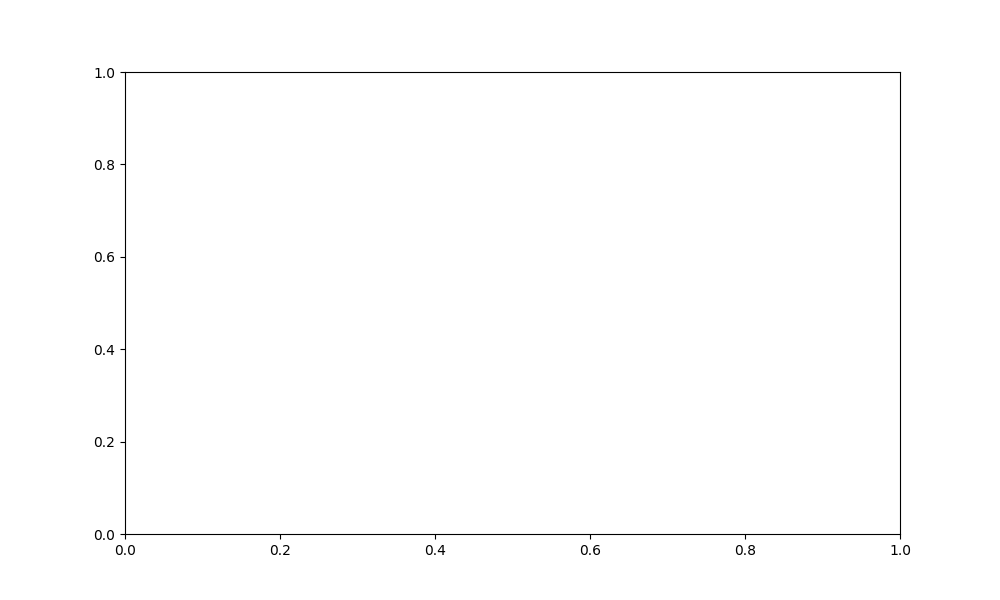

In [7]:
%matplotlib widget
#Speed distribution with sliders for galaxy type and lab/galaxy frame
import h5py
import numpy as np
import math
import matplotlib.pyplot as plt
import ipywidgets as widgets
from datetime import date
import time
import scipy.optimize as opt
from IPython.display import clear_output

clear_output()


def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    if iteration == total:
        print()

f_m12i = h5py.File("m12i_darkmatter.hdf5", 'r')
f_m12f = h5py.File("m12f_darkmatter.hdf5", 'r')
f_m12m = h5py.File("m12m_darkmatter.hdf5", 'r')


def curve(galaxy_name, num_vals, radius):
    heights = []
    if galaxy_name == "m12i":
        pos = np.array(f_m12i.get('position'))
        vel = np.array(f_m12i.get('velocity'))
    elif galaxy_name == "m12f":
        pos = np.array(f_m12f.get('position'))
        vel = np.array(f_m12f.get('velocity'))
    elif galaxy_name == "m12m":
        pos = np.array(f_m12m.get('position'))
        vel = np.array(f_m12m.get('velocity'))
    x = pos[:,0]
    y = pos[:,1]
    z = pos[:,2]
    data_filter = np.sqrt(x**2 + y**2 + z**2) <= radius
    x = x[data_filter]
    y = y[data_filter]
    z = z[data_filter]
    vx = vel[:,0][data_filter]
    vy = vel[:,1][data_filter]
    radius = np.sqrt(x**2 + y**2)
    vPhi = ((y*vx-x*vy)/radius)
    freq, bins = np.histogram(z, bins=num_vals)
    print(len(bins))
    filtered_vPhi = np.array([])
    for i in range(0, len(bins)-1):
        filtered_vPhi = np.append(filtered_vPhi, np.mean(vPhi[np.logical_and(z >= bins[i], z < bins[i+1])]))
        printProgressBar(i, len(bins)-2, prefix="Generating figure: ", length = 90)
    z = np.array([0.5*(bins[i]+bins[i+1]) for i in range(len(bins)-1)])
    return [z, filtered_vPhi]
   
   


fig, ax = plt.subplots(figsize=(10, 6))

times = np.linspace(1, 365, 365)



# The function to be called anytime a slider's value changes
@widgets.interact_manual(Galaxy=['m12i', 'm12f', 'm12m'], Num_Points=range(10,1001,10), Radius=(1,200,1))
def update(Galaxy='m12i', Num_Points=250, Radius=20):
    output = curve(Galaxy, Num_Points, Radius)
    plt.plot(output[0], output[1], label='{}'.format(Galaxy),linewidth=0.7)
    plt.xlabel('z (kpc)',fontsize=18)
    plt.ylabel('mean ' + r'$v_\varphi$' + ' (km/s)',fontsize=18)
    plt.legend()
plt.show()

### Mean vR at each radius (radius = sqrt(x^2 + y^2))

In [ ]:
%matplotlib widget
#Speed distribution with sliders for galaxy type and lab/galaxy frame
import h5py
import numpy as np
import math
import matplotlib.pyplot as plt
import ipywidgets as widgets
from datetime import date
import time
import scipy.optimize as opt
from IPython.display import clear_output

clear_output()


def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    if iteration == total:
        print()

f_m12i = h5py.File("m12i_darkmatter.hdf5", 'r')
f_m12f = h5py.File("m12f_darkmatter.hdf5", 'r')
f_m12m = h5py.File("m12m_darkmatter.hdf5", 'r')


def curve(galaxy_name, num_vals, radius):
    heights = []
    if galaxy_name == "m12i":
        pos = np.array(f_m12i.get('position'))
        vel = np.array(f_m12i.get('velocity'))
    elif galaxy_name == "m12f":
        pos = np.array(f_m12f.get('position'))
        vel = np.array(f_m12f.get('velocity'))
    elif galaxy_name == "m12m":
        pos = np.array(f_m12m.get('position'))
        vel = np.array(f_m12m.get('velocity'))
    x = pos[:,0]
    y = pos[:,1]
    z = pos[:,2]
    data_filter = np.sqrt(x**2 + y**2) <= radius
    x = x[data_filter]
    y = y[data_filter]
    z = z[data_filter]
    vx = vel[:,0][data_filter]
    vy = vel[:,1][data_filter]
    radius = np.sqrt(x**2 + y**2)
    vR = (x*vx + y*vy)/radius
    freq, bins = np.histogram(radius, bins=num_vals)
    filtered_vR = np.array([])
    for i in range(0, len(bins)-1):
        filtered_vR = np.append(filtered_vR, np.mean(vR[np.logical_and(z >= bins[i], z < bins[i+1])]))
        printProgressBar(i, len(bins)-2, prefix="Generating figure: ", length = 90)
    z = np.array([0.5*(bins[i]+bins[i+1]) for i in range(len(bins)-1)])
    return [z, filtered_vR]
   
   


fig, ax = plt.subplots()

times = np.linspace(1, 365, 365)



# The function to be called anytime a slider's value changes
@widgets.interact_manual(Galaxy=['m12i', 'm12f', 'm12m'], Num_Points=range(10,1001,10), Radius=(1,200,1))
def update(Galaxy='m12i', Num_Points=100, Radius=20):
    output = curve(Galaxy, Num_Points, Radius)
    plt.plot(output[0], output[1], label='{}'.format(Galaxy),linewidth=0.7)
    plt.xlabel('radius (kpc)',fontsize=18)
    plt.ylabel('mean ' + r'$v_R$' + ' (km/s)',fontsize=18)
    plt.legend()
plt.show()

### Mean vz at each radius

In [ ]:
%matplotlib widget
#Speed distribution with sliders for galaxy type and lab/galaxy frame
import h5py
import numpy as np
import math
import matplotlib.pyplot as plt
import ipywidgets as widgets
from datetime import date
import time
import scipy.optimize as opt
from IPython.display import clear_output

clear_output()


def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    if iteration == total:
        print()

f_m12i = h5py.File("m12i_darkmatter.hdf5", 'r')
f_m12f = h5py.File("m12f_darkmatter.hdf5", 'r')
f_m12m = h5py.File("m12m_darkmatter.hdf5", 'r')


def curve(galaxy_name, num_vals, radius):
    heights = []
    if galaxy_name == "m12i":
        pos = np.array(f_m12i.get('position'))
        vel = np.array(f_m12i.get('velocity'))
    elif galaxy_name == "m12f":
        pos = np.array(f_m12f.get('position'))
        vel = np.array(f_m12f.get('velocity'))
    elif galaxy_name == "m12m":
        pos = np.array(f_m12m.get('position'))
        vel = np.array(f_m12m.get('velocity'))
    x = pos[:,0]
    y = pos[:,1]
    z = pos[:,2]
    data_filter = np.sqrt(x**2 + y**2 + z**2) <= radius
    x = x[data_filter]
    y = y[data_filter]
    z = z[data_filter]
    vx = vel[:,0][data_filter]
    vy = vel[:,1][data_filter]
    vz = vel[:,2][data_filter]
    radius = np.sqrt(x**2 + y**2)
    freq, bins = np.histogram(z, bins=num_vals)
    filtered_vz = np.array([])
    for i in range(0, len(bins)-1):
        filtered_vz = np.append(filtered_vz, np.mean(vz[np.logical_and(z >= bins[i], z < bins[i+1])]))
        printProgressBar(i, len(bins)-2, prefix="Generating figure: ", length = 90)
    z = np.array([0.5*(bins[i]+bins[i+1]) for i in range(len(bins)-1)])
    return [z, filtered_vz]
   
   


fig, ax = plt.subplots()

times = np.linspace(1, 365, 365)



# The function to be called anytime a slider's value changes
@widgets.interact_manual(Galaxy=['m12i', 'm12f', 'm12m'], Num_Points=range(10,1001,10), Radius=(1,200,1))
def update(Galaxy='m12i', Num_Points=100, Radius=20):
    output = curve(Galaxy, Num_Points, Radius)
    plt.plot(output[0], output[1], label='{}'.format(Galaxy),linewidth=0.7)
    plt.xlabel('radius (kpc)',fontsize=18)
    plt.ylabel('mean ' + r'$v_z$' + ' (km/s)',fontsize=18)
    plt.legend()
plt.show()

### Figure 12 (m12i)

6307284304.90733 5.913698137538708 911.909532206726 6.836834838823897e-42


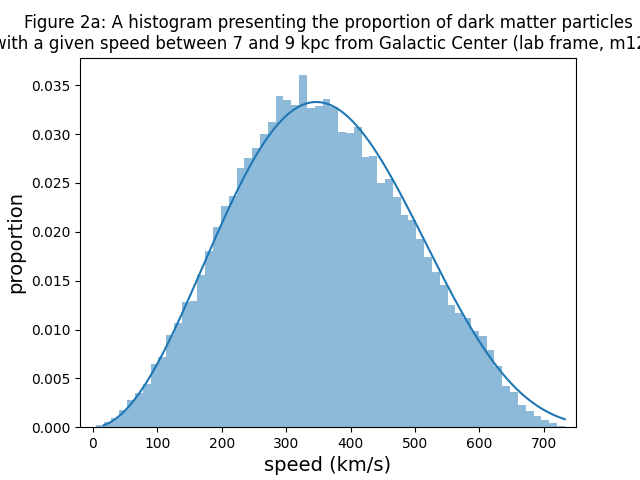

In [1]:
%matplotlib widget
import h5py
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

'''
Importing data & setup =======================================================================================================
'''
snapshot = 'm12i' # m12i or m12f or m12m

f = h5py.File(snapshot+"_darkmatter.hdf5", 'r')

# get particle positions (galaxy) as N x 3 array
pos = np.array(f.get('position'))
x = pos[:,0]
y = pos[:,1]
z = pos[:,2]

# get particle velocities (galaxy) as N x 3 array
vel = np.array(f.get('velocity'))
vx = vel[:,0]
vy = vel[:,1]
vz = vel[:,2]

costheta = x/np.sqrt(x**2 + y**2)
sintheta = y/np.sqrt(x**2 + y**2)

earth_ring_filter = ( (x-8*costheta)**2 + (y-8*sintheta)**2+z**2 <= 1 )

ring_dm_pos = pos[earth_ring_filter]

x = ring_dm_pos[:,0]
y = ring_dm_pos[:,1]
z = ring_dm_pos[:,2]

ring_dm_vel = vel[earth_ring_filter]

vx = ring_dm_vel[:,0]
vy = ring_dm_vel[:,1]
vz = ring_dm_vel[:,2]




from datetime import date

base_date = date(2022, 3, 22)
current_date = date(2022, 3, 22)
t = (current_date - base_date).days

v_E = 29.79*(
    math.cos( ( (2*math.pi)/365 ) * t) * np.array([0.9941, 0.188, 0.0042]) +
    math.sin( ( (2*math.pi)/365 ) * t) * np.array([-0.0504, 0.4946, -0.8677])
)

v_PEC = np.array([11.1, 12.2, 7.3])

v_LSR = np.array([0, 220, 0])


# cylindrical coordinates (vR, vPhi, vz)
v_E_total = v_E + v_PEC + v_LSR

vR = (vx*x+vy*y)/np.sqrt(x**2 + y**2)

vPhi = (x*vy - y*vx)/np.sqrt(x**2 + y**2)
#vPhi > 0 means clockwise rotation

# get particle positions (earth) as N x 3 array
x_lab = pos[:,0] - 8
y_lab = pos[:,1]
z_lab = pos[:,2]

# get particle velocities (earth) as N x 3 array
vR_lab = vR - v_E_total[0]
vPhi_lab = vPhi + v_E_total[1]
vz_lab = vz - v_E_total[2]

#model adjusts the maxwellian distribution to acount for escape velocity
def model(v,v_0,p,v_esc, A):
    fit = np.array([])
    for item in v:
        if item >= 0 and item <= v_esc:
            fit = np.append(fit, A*(((item)**2)*np.exp(-item / v_0)*abs(((v_esc)**2)-((item)**2))**p))
        else:
            fit = np.append(fit, 0)
    return fit



galaxy_sphere_speed = np.sqrt(vx**2 + vy**2 + vz**2)
lab_sphere_speed = np.sqrt(vR_lab**2 + vPhi_lab**2 + vz_lab**2)


'''
==============================================================================================================================
'''

#--------------------------------------------------Creating 12b---------------------------------------------------------------

fig, ax = plt.subplots()

n, bins = np.histogram(lab_sphere_speed, bins=60)

#Histogram is scaled vertically to match eq'n 25 from https://arxiv.org/pdf/1701.03118.pdf
n = n / np.sum(n)

plt.bar(bins[:-1],n,width=bins[1]-bins[0], alpha=0.5)


#----------Creating model------------
bins = np.array([0.5*(bins[i]+bins[i+1]) for i in range(len(bins)-1)])

ans, cov = curve_fit(model, bins, n, p0=[500, 2.32, 750, 2.7e-20], maxfev = 20000)

#I had some issues with curve fitting as some initial test variables for v_esc gave v_esc^2 - v^2 < 0.
#Initialising p0 with proper values fixed this.

v = np.linspace(bins[0], bins[-1], 1000)

fv = model(v, *ans)

print(*ans)

#-------------------------------------
plt.xlim([-20,750])
ax.plot(v, fv)
ax.set_xlabel('speed (km/s)', fontsize=14)
ax.set_ylabel('proportion', fontsize=14)

ax.set_title("""Figure 2a: A histogram presenting the proportion of dark matter particles
with a given speed between 7 and 9 kpc from Galactic Center (lab frame, m12i).""")

plt.show()

#-----------------------------------------------------------------------------------------------------------------------------

### Figure 12 (m12f)

802.817855063374
5530854356.493894, 5.4265898005619295, 878.2930626258297, 8.63371489971778e-39


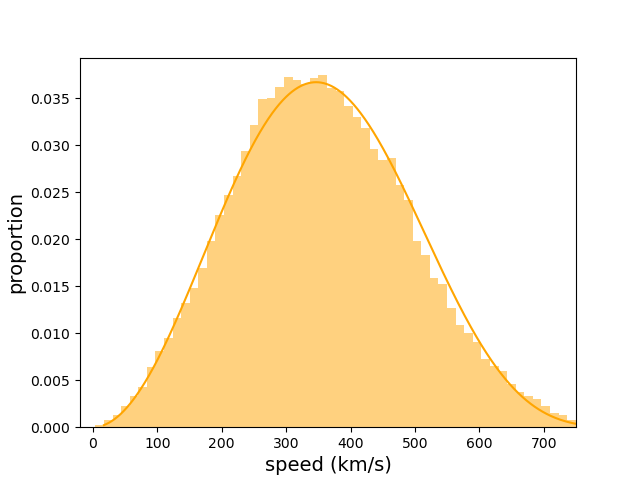

In [37]:
%matplotlib widget
import h5py
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

'''
Importing data & setup =======================================================================================================
'''
snapshot = 'm12f' # m12i or m12f or m12m

f = h5py.File(snapshot+"_darkmatter.hdf5", 'r')

# get particle positions (galaxy) as N x 3 array
pos = np.array(f.get('position'))
x = pos[:,0]
y = pos[:,1]
z = pos[:,2]

# get particle velocities (galaxy) as N x 3 array
vel = np.array(f.get('velocity'))
vx = vel[:,0]
vy = vel[:,1]
vz = vel[:,2]

costheta = x/np.sqrt(x**2 + y**2)
sintheta = y/np.sqrt(x**2 + y**2)

earth_ring_filter = ( (x-8*costheta)**2 + (y-8*sintheta)**2+z**2 <= 1 )

ring_dm_pos = pos[earth_ring_filter]

x = ring_dm_pos[:,0]
y = ring_dm_pos[:,1]
z = ring_dm_pos[:,2]

ring_dm_vel = vel[earth_ring_filter]

vx = ring_dm_vel[:,0]
vy = ring_dm_vel[:,1]
vz = ring_dm_vel[:,2]




from datetime import date

base_date = date(2022, 3, 22)
current_date = date(2022, 3, 22)
t = (current_date - base_date).days

v_E = 29.79*(
    math.cos( ( (2*math.pi)/365 ) * t) * np.array([0.9941, 0.188, 0.0042]) +
    math.sin( ( (2*math.pi)/365 ) * t) * np.array([-0.0504, 0.4946, -0.8677])
)

v_PEC = np.array([11.1, 12.2, 7.3])

v_LSR = np.array([0, 220, 0])


# cylindrical coordinates (vR, vPhi, vz)
v_E_total = v_E + v_PEC + v_LSR

vR = (vx*x+vy*y)/np.sqrt(x**2 + y**2)

vPhi = (x*vy - y*vx)/np.sqrt(x**2 + y**2)
#vPhi > 0 means clockwise rotation

# get particle positions (earth) as N x 3 array
x_lab = pos[:,0] - 8
y_lab = pos[:,1]
z_lab = pos[:,2]

# get particle velocities (earth) as N x 3 array
vR_lab = vR - v_E_total[0]
vPhi_lab = vPhi + v_E_total[1]
vz_lab = vz - v_E_total[2]

#model adjusts the maxwellian distribution to acount for escape velocity
def model(v,v_0,p,v_esc, A):
    fit = np.array([])
    for item in v:
        if item >= 0 and item <= v_esc:
            fit = np.append(fit, A*(((item)**2)*np.exp(-item / v_0)*abs(((v_esc)**2)-((item)**2))**p))
        else:
            fit = np.append(fit, 0)
    return fit

galaxy_sphere_speed = np.sqrt(vx**2 + vy**2 + vz**2)
lab_sphere_speed = np.sqrt(vR_lab**2 + vPhi_lab**2 + vz_lab**2)


'''
==============================================================================================================================
'''

#--------------------------------------------------Creating 12b---------------------------------------------------------------

fig, ax = plt.subplots()

n, bins = np.histogram(lab_sphere_speed, bins=60)

#Histogram is scaled vertically to match eq'n 25 from https://arxiv.org/pdf/1701.03118.pdf
n = n / np.sum(n)

plt.bar(bins[:-1],n,width=bins[1]-bins[0], alpha=0.5, color='orange')


#----------Creating model------------
bins = np.array([0.5*(bins[i]+bins[i+1]) for i in range(len(bins)-1)])

print(max(bins))
ans, cov = curve_fit(model, bins, n, p0=[485.6447047935164, 2.336736901902472, 800, 5.1607062581521176e-20], maxfev = 20000)

#I had some issues with curve fitting as some initial test variables for v_esc gave v_esc^2 - v^2 < 0.
#Initialising p0 with proper values fixed this.

v = np.linspace(bins[0], bins[-1], 1000)

fv = model(v, *ans)

print(str(ans[0]) + ', ' + str(ans[1]) + ', ' + str(ans[2]) + ', ' + str(ans[3]))

#-------------------------------------
plt.xlim([-20,750])
ax.plot(v, fv, color='orange')
ax.set_xlabel('speed (km/s)', fontsize=14)
ax.set_ylabel('proportion', fontsize=14)

ax.set_title("""Figure 2b: A histogram presenting the proportion of dark matter particles
with a given speed between 7 and 9 kpc from Galactic Center (lab frame, m12f).""")

plt.show()

#-----------------------------------------------------------------------------------------------------------------------------

### Figure 12 (m12m)

Problems: curve_fit function gave 
    
    RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 20000.

with many different p0 setups.

Fix: changed curve_fit function to always define $f(v) = Ae^{-v/v_0}(v_\text{esc}^2-v^2)^p$ while ensuring that the final model function remained unchanged as equation 1 in https://arxiv.org/pdf/1210.2721.pdf, but then an alternative error

    RuntimeWarning: invalid value encountered in power fit = A*(((v)**2)*np.exp(-v / v_0)*(((v_esc)**2)-((v)**2))**p)
    
appeared. To fix this, I replaced $(v_\text{esc}^2-v^2)^p$ with $|v_\text{esc}^2-v^2|^p$ in the curve_fit function. The error no longer showed up, allowing the curve_fit model to do its job. The final curve_fit parameters were 

    [v_0, p, v_esc, A] = [189.42382168007006, 1.7690882551120721, 750.63593040033, 1.895377743943265e-16]

189.42382168007006, 1.7690882551120721, 750.63593040033, 1.895377743943265e-16


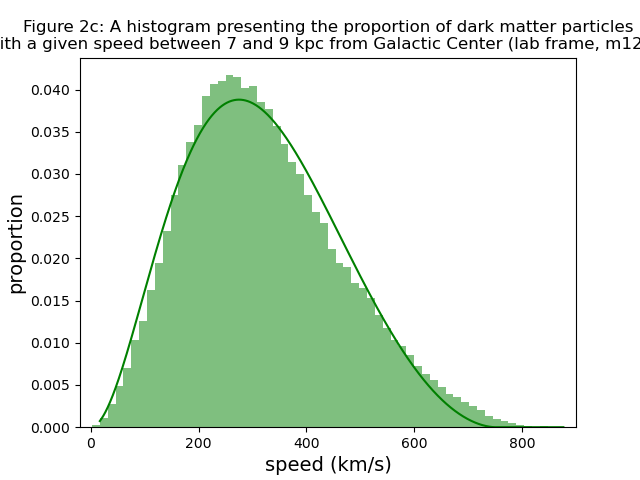

In [39]:
%matplotlib widget
import h5py
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

'''
Importing data & setup =======================================================================================================
'''
snapshot = 'm12m' # m12i or m12f or m12m

f = h5py.File(snapshot+"_darkmatter.hdf5", 'r')

# get particle positions (galaxy) as N x 3 array
pos = np.array(f.get('position'))
x = pos[:,0]
y = pos[:,1]
z = pos[:,2]

# get particle velocities (galaxy) as N x 3 array
vel = np.array(f.get('velocity'))
vx = vel[:,0]
vy = vel[:,1]
vz = vel[:,2]

costheta = x/np.sqrt(x**2 + y**2)
sintheta = y/np.sqrt(x**2 + y**2)

earth_ring_filter = ( (x-8*costheta)**2 + (y-8*sintheta)**2+z**2 <= 1 )

ring_dm_pos = pos[earth_ring_filter]

x = ring_dm_pos[:,0]
y = ring_dm_pos[:,1]
z = ring_dm_pos[:,2]

ring_dm_vel = vel[earth_ring_filter]

vx = ring_dm_vel[:,0]
vy = ring_dm_vel[:,1]
vz = ring_dm_vel[:,2]




from datetime import date

base_date = date(2022, 3, 22)
current_date = date(2022, 3, 22)
t = (current_date - base_date).days

v_E = 29.79*(
    math.cos( ( (2*math.pi)/365 ) * t) * np.array([0.9941, 0.188, 0.0042]) +
    math.sin( ( (2*math.pi)/365 ) * t) * np.array([-0.0504, 0.4946, -0.8677])
)

v_PEC = np.array([11.1, 12.2, 7.3])

v_LSR = np.array([0, 220, 0])


# cylindrical coordinates (vR, vPhi, vz)
v_E_total = v_E + v_PEC + v_LSR

vR = (vx*x+vy*y)/np.sqrt(x**2 + y**2)

vPhi = (x*vy - y*vx)/np.sqrt(x**2 + y**2)
#vPhi > 0 means clockwise rotation

# get particle positions (earth) as N x 3 array
x_lab = pos[:,0] - 8
y_lab = pos[:,1]
z_lab = pos[:,2]

# get particle velocities (earth) as N x 3 array
vR_lab = vR - v_E_total[0]
vPhi_lab = vPhi + v_E_total[1]
vz_lab = vz - v_E_total[2]

#model adjusts the maxwellian distribution to acount for escape velocity
def model(v,v_0,p,v_esc, A):
    fit = A*(((v)**2)*np.exp(-v / v_0)*abs(((v_esc)**2)-((v)**2))**p)
    return fit
#model adjusts the maxwellian distribution to acount for escape velocity
def model2(v,v_0,p,v_esc, A):
    fit = np.array([])
    for item in v:
        if item >= 0 and item <= v_esc:
            fit = np.append(fit, A*(((item)**2)*np.exp(-item / v_0)*abs(((v_esc)**2)-((item)**2))**p))
        else:
            fit = np.append(fit, 0)
    return fit

galaxy_sphere_speed = np.sqrt(vx**2 + vy**2 + vz**2)
lab_sphere_speed = np.sqrt(vR_lab**2 + vPhi_lab**2 + vz_lab**2)


'''
==============================================================================================================================
'''

#--------------------------------------------------Creating 12b---------------------------------------------------------------

fig, ax = plt.subplots()
n, bins = np.histogram(lab_sphere_speed, bins=60)

#Histogram is scaled vertically to match eq'n 25 from https://arxiv.org/pdf/1701.03118.pdf
n = n / np.sum(n)

plt.bar(bins[:-1],n,width=bins[1]-bins[0], alpha=0.5, color='green')


#----------Creating model------------
bins = np.array([0.5*(bins[i]+bins[i+1]) for i in range(len(bins)-1)])

ans, cov = curve_fit(model, bins, n, p0=[190.1739500796479, 1.7834056538726974, 751.323120981853, 1.5567159895283907e-16], bounds=([50, 0.1, 600, 1e-30], [600, 10, 1000, 1]))

#I had some issues with curve fitting as some initial test variables for v_esc gave v_esc^2 - v^2 < 0.
#Initialising p0 with proper values fixed this.

v = np.linspace(bins[0], bins[-1], 1000)

fv = model2(v, *ans)

print(str(ans[0]) + ', ' + str(ans[1]) + ', ' + str(ans[2]) + ', ' + str(ans[3]))

#-------------------------------------
plt.xlim([-20,900])
ax.plot(v, fv, color='green')
ax.set_xlabel('speed (km/s)', fontsize=14)
ax.set_ylabel('proportion', fontsize=14)

ax.set_title("""Figure 2c: A histogram presenting the proportion of dark matter particles
with a given speed between 7 and 9 kpc from Galactic Center (lab frame, m12m).""")

plt.show()


#-----------------------------------------------------------------------------------------------------------------------------

### Figure 12 together

interactive(children=(Dropdown(description='Galaxy', options=('m12i', 'm12f', 'm12m'), value='m12i'), Button(d…

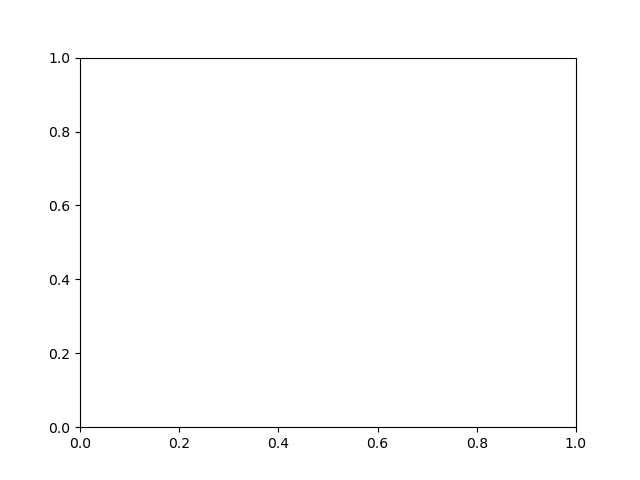

In [7]:
%matplotlib widget
import h5py
import numpy as np
import math
import matplotlib.pyplot as plt
import ipywidgets as widgets
from datetime import date
import time
from scipy.optimize import curve_fit
from IPython.display import clear_output

clear_output()


'''
Importing data & setup =======================================================================================================
'''
snapshot = 'm12m' # m12i or m12f or m12m
def data_collector(snapshot):
    f = h5py.File(snapshot+"_darkmatter.hdf5", 'r')

    # get particle positions (galaxy) as N x 3 array
    pos = np.array(f.get('position'))
    x = pos[:,0]
    y = pos[:,1]
    z = pos[:,2]

    # get particle velocities (galaxy) as N x 3 array
    vel = np.array(f.get('velocity'))
    vx = vel[:,0]
    vy = vel[:,1]
    vz = vel[:,2]

    costheta = x/np.sqrt(x**2 + y**2)
    sintheta = y/np.sqrt(x**2 + y**2)

    earth_ring_filter = ( (x-8*costheta)**2 + (y-8*sintheta)**2+z**2 <= 1 )

    ring_dm_pos = pos[earth_ring_filter]

    x = ring_dm_pos[:,0]
    y = ring_dm_pos[:,1]
    z = ring_dm_pos[:,2]

    ring_dm_vel = vel[earth_ring_filter]

    vx = ring_dm_vel[:,0]
    vy = ring_dm_vel[:,1]
    vz = ring_dm_vel[:,2]

    base_date = date(2022, 3, 22)
    current_date = date(2022, 3, 22)
    t = (current_date - base_date).days

    v_E = 29.79*(
        math.cos( ( (2*math.pi)/365 ) * t) * np.array([0.9941, 0.188, 0.0042]) +
        math.sin( ( (2*math.pi)/365 ) * t) * np.array([-0.0504, 0.4946, -0.8677])
    )

    v_PEC = np.array([11.1, 12.2, 7.3])

    v_LSR = np.array([0, 220, 0])


    # cylindrical coordinates (vR, vPhi, vz)
    v_E_total = v_E + v_PEC + v_LSR

    vR = (vx*x+vy*y)/np.sqrt(x**2 + y**2)

    vPhi = (x*vy - y*vx)/np.sqrt(x**2 + y**2)
    #vPhi > 0 means clockwise rotation

    # get particle positions (earth) as N x 3 array
    x_lab = pos[:,0] - 8
    y_lab = pos[:,1]
    z_lab = pos[:,2]

    # get particle velocities (earth) as N x 3 array
    vR_lab = vR - v_E_total[0]
    vPhi_lab = vPhi + v_E_total[1]
    vz_lab = vz - v_E_total[2]

    lab_sphere_speed = np.sqrt(vR_lab**2 + vPhi_lab**2 + vz_lab**2)
    
    return lab_sphere_speed

#model adjusts the maxwellian distribution to acount for escape velocity
def model(v,v_0,p,v_esc, A):
    fit = A*(((v)**2)*np.exp(-v / v_0)*abs(((v_esc)**2)-((v)**2))**p)
    return fit
#model adjusts the maxwellian distribution to acount for escape velocity
def model2(v,v_0,p,v_esc, A):
    fit = A*(((v)**2)*np.exp(-v / v_0)*(((v_esc)**2)-((v)**2))**p)
    return fit


'''
==============================================================================================================================
'''

#--------------------------------------------------Creating 12b---------------------------------------------------------------

fig, ax = plt.subplots()

# The function to be called anytime a slider's value changes
@widgets.interact_manual(Galaxy=['m12i', 'm12f', 'm12m'])
def update(Galaxy='m12i'):
    lab_sphere_speed = data_collector(Galaxy)
    n, bins = np.histogram(lab_sphere_speed, bins=60)

    #Histogram is scaled vertically to match eq'n 25 from https://arxiv.org/pdf/1701.03118.pdf
    n = n / np.sum(n)

    plt.bar(bins[:-1],n,width=bins[1]-bins[0], alpha=0.5, label=Galaxy)


    #----------Creating model------------
    bins = np.array([0.5*(bins[i]+bins[i+1]) for i in range(len(bins)-1)])
    if Galaxy == 'm12m':
        ans, cov = curve_fit(model, bins, n, p0=[190.1739500796479, 1.7834056538726974, 751.323120981853, 1.5567159895283907e-16], bounds=([50, 0.1, 600, 1e-30], [600, 10, 1000, 1]))
    elif Galaxy == 'm12f':
        ans, cov = curve_fit(model, bins, n, p0=[485.6447047935164, 2.336736901902472, 800, 5.1607062581521176e-20], maxfev = 20000)
    else:
        ans, cov = curve_fit(model, bins, n, p0=[500, 2.32, 750, 2.7e-20], maxfev = 20000)
    #I had some issues with curve fitting as some initial test variables for v_esc gave v_esc^2 - v^2 < 0.
    #Initialising p0 with proper values fixed this.

    v = np.linspace(bins[0], bins[-1], 1000)

    fv = model2(v, *ans)

    print(str(ans[0]) + ', ' + str(ans[1]) + ', ' + str(ans[2]) + ', ' + str(ans[3]))

    #-------------------------------------
    plt.xlim([-20,900])
    ax.plot(v, fv)
    ax.set_xlabel('speed (km/s)', fontsize=14)
    ax.set_ylabel('proportion', fontsize=14)

    ax.set_title("""Figure 2: A histogram presenting the proportion of dark matter particles
    with a given speed between 7 and 9 kpc from Galactic Center (lab frame).""")
    plt.legend()
plt.show()

## Figure 41

changed x-axis. Changed histogram to give proportion rather than # points by normalising along the rows.

interactive(children=(Dropdown(description='Galaxy', options=('m12i', 'm12f', 'm12m'), value='m12i'), Dropdown…

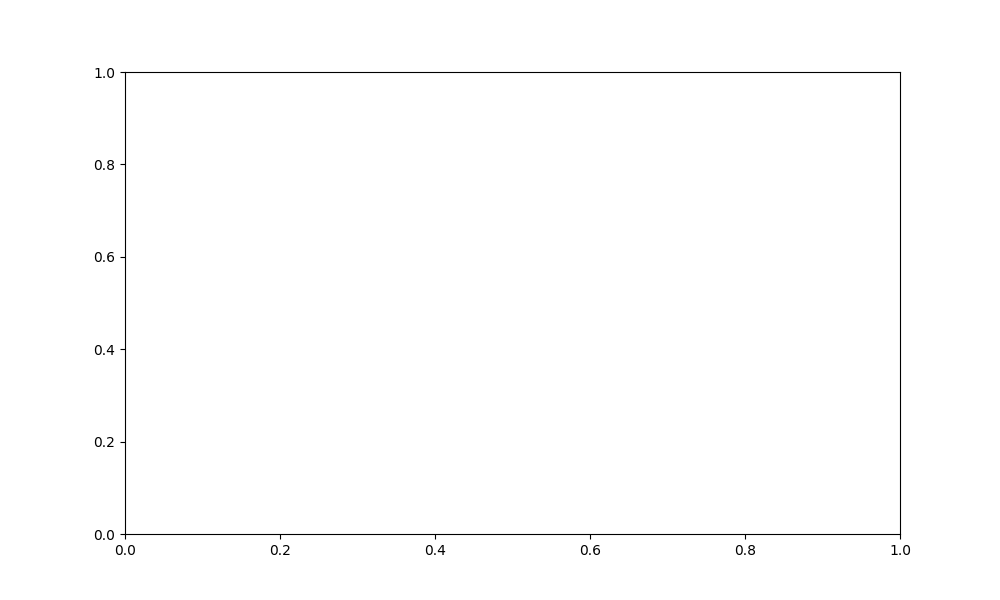

In [2]:
%matplotlib widget
import h5py
import ipywidgets as widgets
import time
import numpy as np
import numpy.matlib
from copy import copy
import matplotlib.pyplot as plt
import math
import scipy.stats
from matplotlib.colors import LogNorm
from datetime import date
from IPython.display import clear_output

clear_output()

def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    if iteration == total: 
        print()

def speed2_generator(vR, vPhi, vz, t):
    #Get Earth velocity
    v_E = 29.79*(
        math.cos( ( (2*math.pi)/365 ) * t*365) * np.array([0.9941, 0.188, 0.0042]) +
        math.sin( ( (2*math.pi)/365 ) * t*365) * np.array([-0.0504, 0.4946, -0.8677])
    )
    v_PEC_LSR = np.array([11.1, 232.2, 7.3])
    v_E_total = v_E + v_PEC_LSR

    #Get particle velocities relative to Earth
    vR_lab = vR - v_E_total[0]
    #my vPhi is opposite direction to v_E_total[1]
    vPhi_lab = vPhi + v_E_total[1]
    vz_lab = vz - v_E_total[2]
    return 1+0.5*(vR_lab**2 + vPhi_lab**2 + vz_lab**2)/(300000**2)

fig, ax = plt.subplots(figsize=(10,6))

def data_function(galaxy, theta):
    snapshot = galaxy
    f = h5py.File(snapshot+"_darkmatter.hdf5", 'r')
    # get particle positions (Earth) as N x 3 array
    pos = np.array(f.get('position'))
    x_lab = pos[:,0]-8*math.cos(theta*math.pi/180)
    y_lab = pos[:,1]-8*math.sin(theta*math.pi/180)
    z_lab = pos[:,2]
    # get particle velocities (galaxy) as N x 3 array
    vel = np.array(f.get('velocity'))
    vx = vel[:,0]
    vy = vel[:,1]
    vz = vel[:,2]
    
    vR = (vx*(x_lab+8*math.cos(theta*math.pi/180))+vy*(y_lab+8*math.sin(theta*math.pi/180)))/np.sqrt((x_lab+8*math.cos(theta*math.pi/180))**2 + (y_lab+8*math.sin(theta*math.pi/180))**2)
    vPhi = ((x_lab+8*math.cos(theta*math.pi/180))*vy - (y_lab+8*math.sin(theta*math.pi/180))*vx)/np.sqrt((x_lab+8*math.cos(theta*math.pi/180))**2 + (y_lab+8*math.sin(theta*math.pi/180))**2)
    position_filter = np.sqrt(x_lab**2 + y_lab**2 + z_lab**2) <= 2
    
    vR = vR[position_filter]
    vPhi = vPhi[position_filter]
    vz = vz[position_filter]
    
    times = np.linspace(0,2,100)
    for t in times:
        if t == 0:
            speeds = np.array(speed2_generator(vR, vPhi, vz, t))
        else:
            speeds = np.vstack([speeds, speed2_generator(vR, vPhi, vz, t)])

    times = np.reshape(np.repeat(times, np.size(speeds[0])), (np.size(times), np.size(speeds[0]))).flatten()
    speeds = speeds.flatten()
    return [times, speeds]

cmap = copy(plt.cm.plasma)
cmap.set_bad(cmap(0))


# The function to be called anytime a slider's value changes
@widgets.interact_manual(Galaxy=['m12i', 'm12f', 'm12m'], Theta=range(0,356,5))
def update(Galaxy='m12i', Theta=170):
    output = data_function(Galaxy, Theta)
    hbins=np.linspace(1, 1+3e-6, 201)
    vbins=np.linspace(0, 2, 101)
    h, xedges, yedges = np.histogram2d(output[1], output[0], bins=[hbins, vbins])
    #normalise rows of h
    h = (h.T / np.sum(h.T,axis=1)[0]).T
    pcm = ax.pcolormesh(xedges, yedges, h.T, cmap=cmap)
    ax.set_xlabel(r'$\hbar\omega / m_ac^2$',fontsize=18)
    ax.set_ylabel('t (years from 22 March)',fontsize=18)
    ax.set_title('Figure 41: 2d histogram of ' + r'$\hbar\omega / m_ac^2$' + ' and time for\n{} around (x,y,z) = ({}, {}, 0.0), '.format(Galaxy, round(8*math.cos(Theta*math.pi/180),1), round(8*math.sin(Theta*math.pi/180),1))  + r'$\theta$' + ' = {}.'.format(Theta),fontsize=14)
    if len(fig.axes) <= 1:
        fig.colorbar(pcm, ax=ax, label="proportion", pad=0.01)

plt.show()

## Figure 49

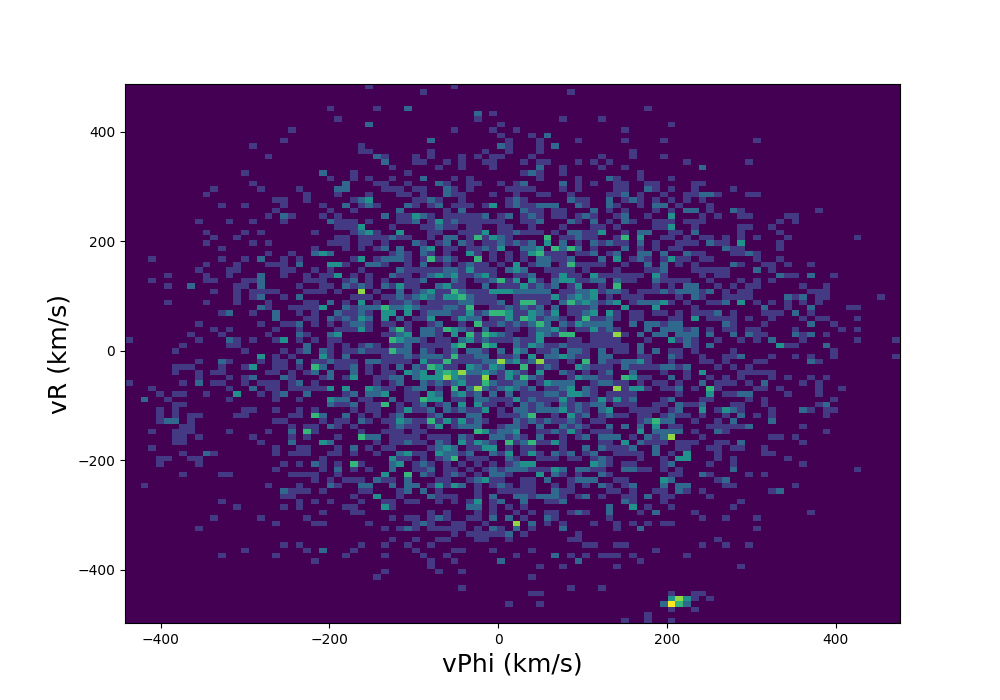

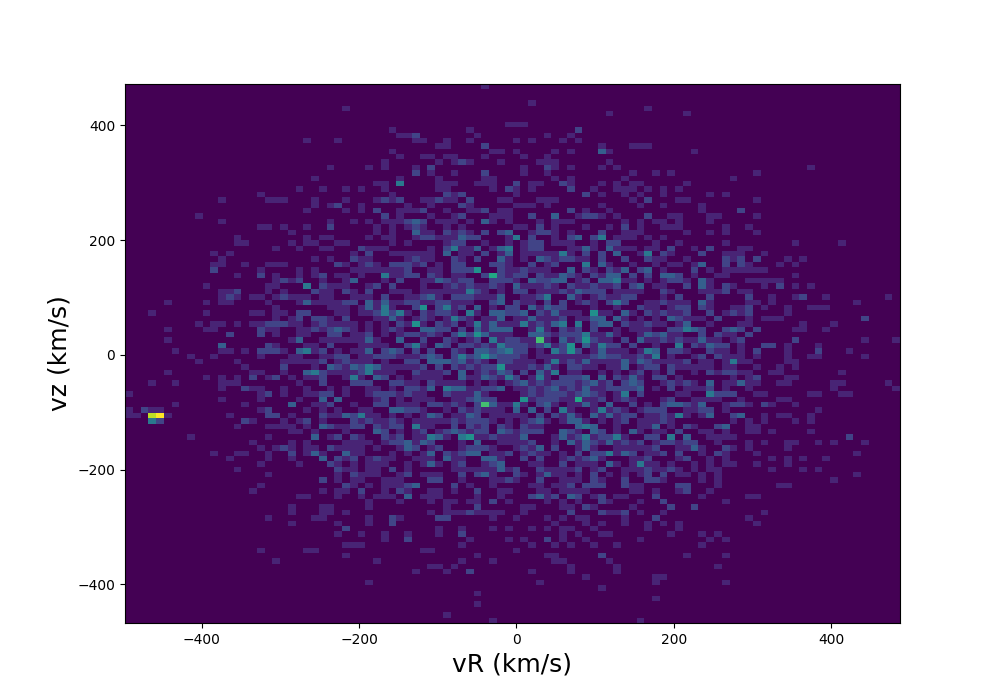

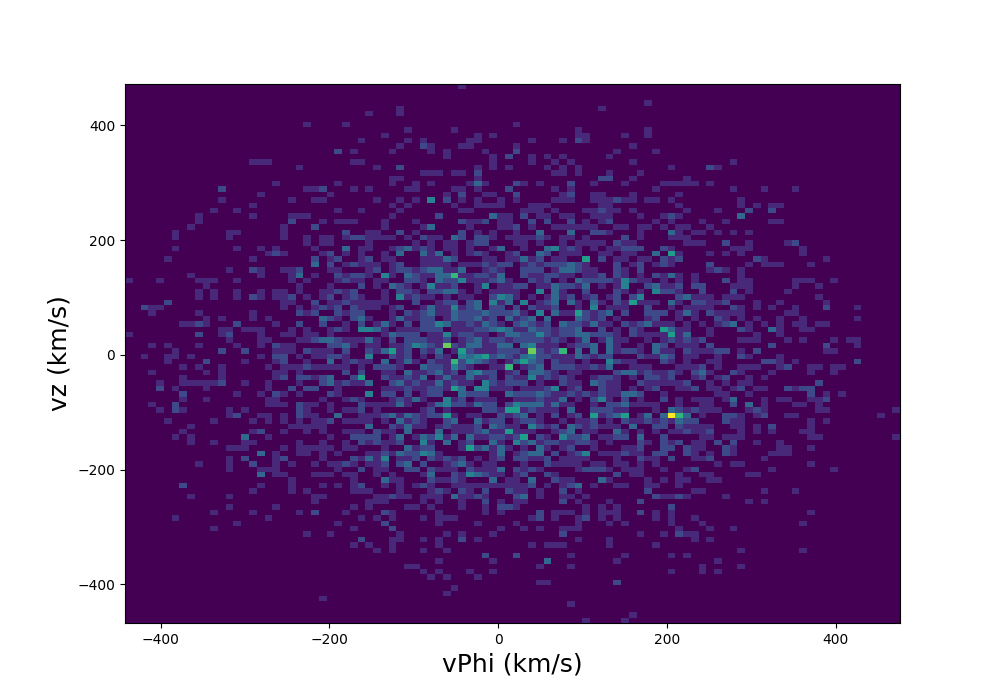

In [1]:
%matplotlib widget
import h5py
import time
import numpy as np
import matplotlib.pyplot as plt
import math
from IPython.display import clear_output

clear_output()


'''
Importing positions and velocities in Earth frame ===========================================================================
'''
theta=170

from datetime import date

base_date = date(2022, 3, 22)
current_date = date(2022, 3, 22)
t = (current_date - base_date).days

v_E = 29.79*(
    math.cos( ( (2*math.pi)/365 ) * t) * np.array([0.9941, 0.188, 0.0042]) +
    math.sin( ( (2*math.pi)/365 ) * t) * np.array([-0.0504, 0.4946, -0.8677])
)

v_PEC = np.array([11.1, 12.2, 7.3])

v_LSR = np.array([0, 220, 0])


# cylindrical coordinates (vR, vPhi, vz)
v_E_total = v_E + v_PEC + v_LSR

snapshot = 'm12i' # m12i or m12f or m12m

f = h5py.File(snapshot+"_darkmatter.hdf5", 'r')

# get particle positions (galaxy) as N x 3 array
pos = np.array(f.get('position'))
x = pos[:,0]
y = pos[:,1]
z = pos[:,2]

# get particle velocities (galaxy) as N x 3 array
vel = np.array(f.get('velocity'))
vx = vel[:,0]
vy = vel[:,1]
vz = vel[:,2]


x_lab = x-8*math.cos(theta*math.pi/180)
y_lab = y-8*math.sin(theta*math.pi/180)
z_lab = z


position_filter = np.sqrt(x_lab**2 + y_lab**2 + z_lab**2) <= 1.5

vR = (vx*x+vy*y)/np.sqrt(x**2 + y**2)

vPhi = (x*vy - y*vx)/np.sqrt(x**2 + y**2)
#vPhi > 0 means clockwise rotation

vR = vR[position_filter]
vPhi = vPhi[position_filter]
vz = vz[position_filter]

'''
=============================================================================================================================
'''


#---------------------------------------------------------------------------------------------------------------------------

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)

plt.hist2d(vPhi, vR, bins=100)
plt.xlabel('vPhi (km/s)', fontsize=18)
plt.ylabel('vR (km/s)', fontsize=18)



plt.show()

#---------------------------------------------------------------------------------------------------------------------------

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)

plt.hist2d(vR, vz, bins=100)
plt.xlabel('vR (km/s)', fontsize=18)
plt.ylabel('vz (km/s)', fontsize=18)


plt.show()

#---------------------------------------------------------------------------------------------------------------------------

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)


plt.hist2d(vPhi, vz, bins=100)
plt.xlabel('vPhi (km/s)', fontsize=18)
plt.ylabel('vz (km/s)', fontsize=18)
plt.show()


# We see that the stream is at       190 <= vPhi <= 225,
#                                   -470 <=  vR  <= -445,
#                                   -120 <=  vz  <= -100

## Figure 53

### a

interactive(children=(IntSlider(value=0, description='time', max=365), Button(description='Run Interact', styl…

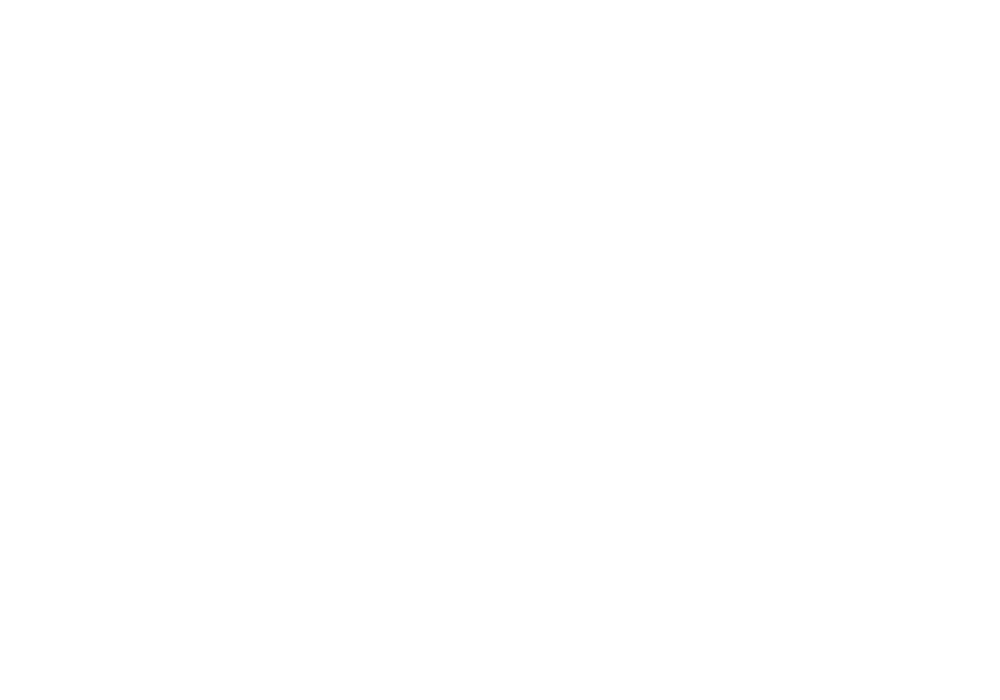

In [3]:
%matplotlib widget
#Speed distribution with sliders for galaxy type and lab/galaxy frame
import h5py
import numpy as np
import math
import matplotlib.pyplot as plt
import ipywidgets as widgets
from datetime import date
from IPython.display import clear_output
import scipy.integrate as integrate
import time as timer

clear_output()

base_date = date(2022, 3, 22)
current_date = date(2022, 3, 22)
t = (current_date - base_date).days

def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    if iteration == total: 
        print()

# The parametrized function to be plotted
def histogram(pos, vel, time, theta, v_E_total):
    x = pos[:,0]
    y = pos[:,1]
    z = pos[:,2]
    
    position_filter = np.sqrt((x-8*math.cos(theta*math.pi/180))**2 + (y-8*math.sin(theta*math.pi/180))**2 + z**2) <= 1.5
    
    
    x = x[position_filter]
    y = y[position_filter]
    z_lab = z[position_filter]
    x_lab = x-8*math.cos(theta*math.pi/180)
    y_lab = y-8*math.sin(theta*math.pi/180)
    
    vx = vel[:,0][position_filter]
    vy = vel[:,1][position_filter]
    vz = vel[:,2][position_filter] - v_E_total[2]
    
    radius = np.sqrt(x**2 + y**2)
    vR = (vx*x+vy*y)/radius - v_E_total[0]
    vPhi = (x*vy - y*vx)/radius + v_E_total[1]
    
    v_lab = np.sqrt(v_E_total[0]**2 + v_E_total[1]**2 + v_E_total[2]**2)
    speeds = np.sqrt(vR**2 + vPhi**2 + vz**2)/299792
    return speeds**2


galaxy_name = 'm12i'  # 'm12i' or 'm12f' or 'm12m'
frame = 'Galaxy'      # 'Galaxy' or 'Lab'


# Reference function to be numerically integrated, comes from eq'n 25 of https://arxiv.org/pdf/1701.03118.pdf
def f_lab_vt(v_gal,time):
    v_E = 29.79*(
        math.cos( ( (2*math.pi)/365 ) * time) * np.array([0.9941, 0.188, 0.0042]) +
        math.sin( ( (2*math.pi)/365 ) * time) * np.array([-0.0504, 0.4946, -0.8677])
    )
    v_PEC_LSR = np.array([11.1, 232.2, 7.3])
    v_E_total = v_E + v_PEC_LSR
    v_0 = 220/299792
    v_lab = np.sqrt(v_E_total[0]**2 + v_E_total[1]**2 + v_E_total[2]**2)/299792
    
    f_lab_vt = ( 2*np.sqrt(v_gal)*np.exp(-(np.sqrt(v_gal)**2 + v_lab**2)/(v_0**2))*np.sinh( (2*v_lab*np.sqrt(v_gal))/(v_0**2) ) ) / ( math.pi*math.sqrt(math.pi)*v_0*v_lab)
    #normalise integral of f_lab_vt to be 1
    #constant = integrate.quad(f_lab_vt1)...
    return (f_lab_vt**2)

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)

# The function to be called anytime a slider's value changes
@widgets.interact_manual(time=widgets.IntSlider(min=0, max=365, value=0, step=1))
def update(time=0):
    n=10
    bin_num = 17
    thetas = np.linspace(0,360,n)
    colours=['b','g','r']
    for j in range(0,3):
        Galaxy = ['m12i', 'm12f', 'm12m'][j]
        ratios = np.array([])
        
        f = h5py.File(Galaxy+"_darkmatter.hdf5", 'r')
        # get particle positions (Earth) as N x 3 array
        pos = np.array(f.get('position'))
        # get particle velocities (galaxy) as N x 3 array
        vel = np.array(f.get('velocity'))
        
        v_E = 29.79*(
            math.cos( ( (2*math.pi)/365 ) * time) * np.array([0.9941, 0.188, 0.0042]) +
            math.sin( ( (2*math.pi)/365 ) * time) * np.array([-0.0504, 0.4946, -0.8677])
        )
        v_PEC_LSR = np.array([11.1, 232.2, 7.3])
        v_E_total = v_E + v_PEC_LSR
        
        edges = np.linspace(0,6e-6,bin_num+1)
        #Reference integral using eq'n 25 from https://arxiv.org/pdf/1701.03118.pdf
        ref_int = integrate.quad(f_lab_vt, np.min(edges), np.max(edges), args=(time))[0]
        for Theta in thetas:
            x_variable = histogram(pos, vel,time,Theta, v_E_total)
            hist, edges = np.histogram(x_variable, bins=np.linspace(0,6e-6,bin_num+1)) #density = True
            #Histogram is scaled vertically to match eq'n 25 from https://arxiv.org/pdf/1701.03118.pdf
            hist = hist/np.sum(hist)

            #Numerical integral from scaled histogram of data
            num_int = 0
            for i in range(0,len(hist)):
                num_int += hist[i]**2
            ratios = np.append(ratios, num_int/ref_int)
            printProgressBar(Theta,max(thetas),prefix=(Galaxy+" plot progress"), length=90)
        print(np.mean(num_int))
        plt.plot(thetas, ratios, label=Galaxy, color=colours[j], linewidth=0.5)
        plt.plot(thetas, np.repeat(np.mean(ratios),n), linestyle='dashed', alpha=0.5, color=colours[j], linewidth=0.5)
    plt.ylabel(r'$\frac{I_{num}}{I_{ref}}$', fontsize=18)
    plt.xlabel(r'$\theta$' + ' (degrees)', fontsize=18)
    plt.title('Figure 53: ratio of numerical and reference integrals vs ' + r'$\theta$')
    plt.legend()
plt.show()

### b

Problem: since we are summing the squares of the heights of the histogram bins, the numerical integral will always change even if the shape and height of the histogram remains unchanged. Why?

Suppose that a bin has a height h. Then it will add h^2 to the integral. If you double the number of bins, then this bin will split into two bins roughly 50/50. Then each bin will add (h/2)^2 to the integral, meaning we now only get h^2/2. We expect, and observe, that doubling the number of bins will halve the numerical integral.

However, the bin does not always split 50/50. If it were to split 70/30, then the new integral is 0.58 of the previous one. Hence, the difference in shape between my histogram and the reference function also causes a fluctuation in the height of the ratio with differing numbers of bins. This can't be a problem that can be fixed, as we can only fix it if the derivatives of the curves matches, but then the curves are identical, unless they start at different heights. So how do we deal with it? Should I just set a number of bins that seems appropriate for the nicest histogram shape? Should I set a number of bins so that figures a and b are almost identical?

About the curves having the same derivatives but different heights: could the problem then be reduced to calculating the difference in density of the simulations compared to theoretical models?



By setting a number of bins so that figures a and b are identical, I am essentially ensuring that the scipy.integrate.quad integral is identical to sum(f(v^2))^2 using the binned reference function method. Does this also guarantee that the numerical integral is identical to sum(f(v^2))^2 for the numerical histogram? Only if the shapes of the reference distribution and numerical distribution are identical. However, we can assume that the reference distribution is at least similar to the numerical distribution, so this is the best method.

#### (i)

interactive(children=(IntSlider(value=0, description='time', max=365), Button(description='Run Interact', styl…

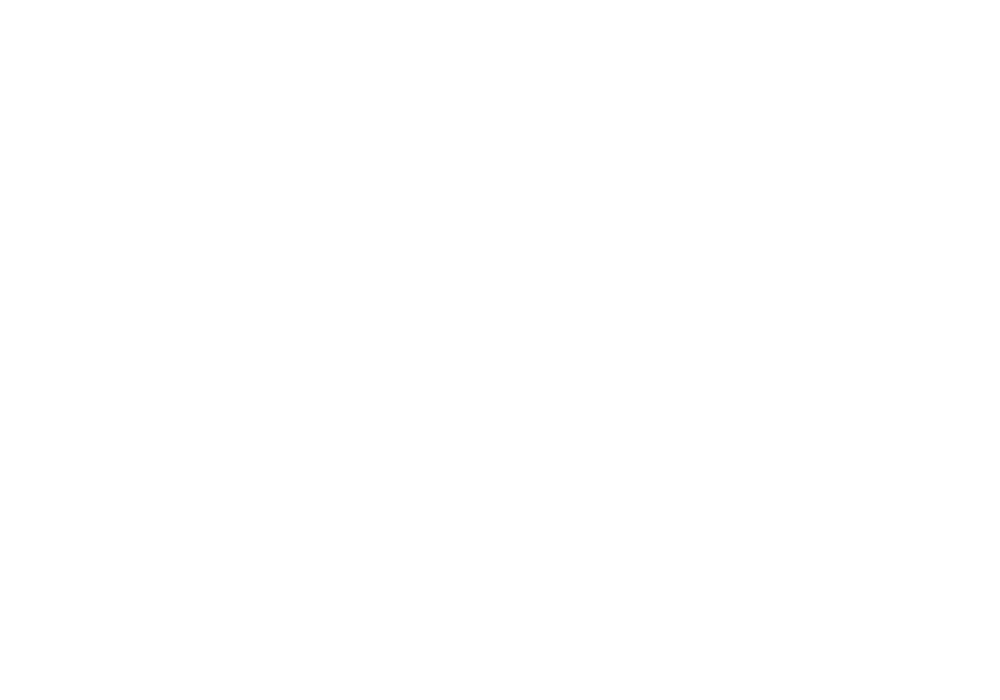

In [32]:
%matplotlib widget
#Speed distribution with sliders for galaxy type and lab/galaxy frame
import h5py
import numpy as np
import math
import matplotlib.pyplot as plt
import ipywidgets as widgets
from datetime import date
from IPython.display import clear_output
import scipy.integrate as integrate
import time as timer

clear_output()

base_date = date(2022, 3, 22)
current_date = date(2022, 3, 22)
t = (current_date - base_date).days

def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    if iteration == total: 
        print()

        
import numpy as np
from scipy import stats


def freedman_diaconis(data, returnas="width"):
    """
    Use Freedman Diaconis rule to compute optimal histogram bin width. 
    ``returnas`` can be one of "width" or "bins", indicating whether
    the bin width or number of bins should be returned respectively. 


    Parameters
    ----------
    data: np.ndarray
        One-dimensional array.

    returnas: {"width", "bins"}
        If "width", return the estimated width for each histogram bin. 
        If "bins", return the number of bins suggested by rule.
    """
    data = np.asarray(data, dtype=np.float_)
    IQR  = stats.iqr(data, rng=(25, 75), scale=1.0, nan_policy="omit")
    N    = data.size
    bw   = (2 * IQR) / np.power(N, 1/3)

    if returnas=="width":
        result = bw
    else:
        datmin, datmax = data.min(), data.max()
        datrng = datmax - datmin
        result = int((datrng / bw) + 1)
    return(result)

# The parametrized function to be plotted
def histogram(pos, vel, time, theta, v_E_total):
    x = pos[:,0]
    y = pos[:,1]
    z = pos[:,2]
    
    position_filter = np.sqrt((x-8.3*math.cos(theta*math.pi/180))**2 + (y-8.3*math.sin(theta*math.pi/180))**2 + z**2) <= 1.5
    
    
    x = x[position_filter]
    y = y[position_filter]
    z_lab = z[position_filter]
    x_lab = x-8*math.cos(theta*math.pi/180)
    y_lab = y-8*math.sin(theta*math.pi/180)
    
    vx = vel[:,0][position_filter]
    vy = vel[:,1][position_filter]
    vz = vel[:,2][position_filter] - v_E_total[2]
    
    radius = np.sqrt(x**2 + y**2)
    vR = (vx*x+vy*y)/radius - v_E_total[0]
    vPhi = (x*vy - y*vx)/radius + v_E_total[1]
    
    v_lab = np.sqrt(v_E_total[0]**2 + v_E_total[1]**2 + v_E_total[2]**2)
    speeds = np.sqrt(vR**2 + vPhi**2 + vz**2)/299792
    return speeds**2


galaxy_name = 'm12i'  # 'm12i' or 'm12f' or 'm12m'
frame = 'Galaxy'      # 'Galaxy' or 'Lab'


# Reference function to be numerically integrated, comes from eq'n 25 of https://arxiv.org/pdf/1701.03118.pdf
def f_lab_vt(v_gal,time):
    v_E = 29.79*(
        math.cos( ( (2*math.pi)/365 ) * time) * np.array([0.9941, 0.188, 0.0042]) +
        math.sin( ( (2*math.pi)/365 ) * time) * np.array([-0.0504, 0.4946, -0.8677])
    )
    v_PEC_LSR = np.array([11.1, 232.2, 7.3])
    v_E_total = v_E + v_PEC_LSR
    v_0 = 220/299792
    v_lab = np.sqrt(v_E_total[0]**2 + v_E_total[1]**2 + v_E_total[2]**2)/299792
    f_lab_vt = ( 2*np.sqrt(v_gal)*np.exp(-(np.sqrt(v_gal)**2 + v_lab**2)/(v_0**2))*np.sinh( (2*v_lab*np.sqrt(v_gal))/(v_0**2) ) ) / ( math.pi*math.sqrt(math.pi)*v_0*v_lab)
    #normalise integral of f_lab_vt to be 1
    #constant = integrate.quad(f_lab_vt1)...
    return f_lab_vt

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)

# The function to be called anytime a slider's value changes
@widgets.interact_manual(time=widgets.IntSlider(min=0, max=365, value=0, step=1))
def update(time=0):
    n=500
    thetas = np.linspace(0,360,n)
    colours=['b','g','r']
    for j in range(0,3):
        Galaxy = ['m12i', 'm12f', 'm12m'][j]
        ratios = np.array([])
        
        f = h5py.File(Galaxy+"_darkmatter.hdf5", 'r')
        # get particle positions (Earth) as N x 3 array
        pos = np.array(f.get('position'))
        # get particle velocities (galaxy) as N x 3 array
        vel = np.array(f.get('velocity'))
        
        v_E = 29.79*(
            math.cos( ( (2*math.pi)/365 ) * time) * np.array([0.9941, 0.188, 0.0042]) +
            math.sin( ( (2*math.pi)/365 ) * time) * np.array([-0.0504, 0.4946, -0.8677])
        )
        v_PEC_LSR = np.array([11.1, 232.2, 7.3])
        v_E_total = v_E + v_PEC_LSR
        
        for Theta in thetas:
            x_variable = histogram(pos, vel,time,Theta, v_E_total)
            bin_num = freedman_diaconis(x_variable, returnas="bins")
            hist, edges = np.histogram(x_variable, bins=np.linspace(0,6e-6,bin_num+1)) #density = True
            #Histogram is scaled vertically to match eq'n 25 from https://arxiv.org/pdf/1701.03118.pdf
            hist = hist/np.sum(hist)
    
            
            #Reference integral using eq'n 25 from https://arxiv.org/pdf/1701.03118.pdf
            hist_velocities = np.array([])
            for i in range(0,len(edges)-1):
                hist_velocities = np.append(hist_velocities, (edges[i]+edges[i+1])/2)
            reference_hist = f_lab_vt(hist_velocities, time)
            reference_hist = reference_hist/np.sum(reference_hist)
            
            #Numerical integral from scaled histogram of data
            num_int = np.sum(hist**2)
            ref_int = np.sum(reference_hist**2)
            
            ratios = np.append(ratios, num_int/ref_int)
            printProgressBar(Theta,max(thetas),prefix=(Galaxy+" plot progress "+str(bin_num)), length=90)
        plt.plot(thetas, ratios, label=Galaxy, color=colours[j], linewidth=0.5)
        plt.plot(thetas, np.repeat(np.mean(ratios),n), linestyle='dashed', alpha=0.5, color=colours[j], linewidth=0.5)
    plt.ylabel(r'$\frac{A_{sim}}{A_{ref}}$', fontsize=30, rotation=0, labelpad=30)
    plt.xlabel(r'$\theta$' + ' (degrees)', fontsize=18)
    #plt.title('Figure 53: ratio of numerical and reference integrals vs ' + r'$\theta$')
    plt.legend()
plt.show()

#### (ii)

interactive(children=(IntSlider(value=0, description='time', max=365), Button(description='Run Interact', styl…

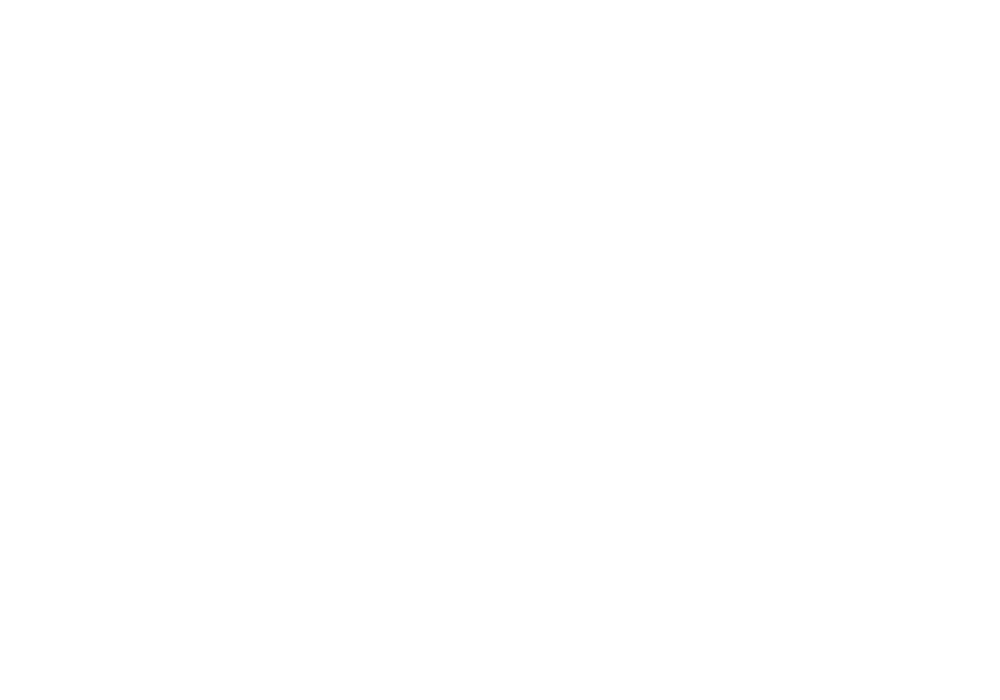

In [3]:
%matplotlib widget
#Speed distribution with sliders for galaxy type and lab/galaxy frame
import h5py
import numpy as np
import math
import matplotlib.pyplot as plt
import ipywidgets as widgets
from datetime import date
from IPython.display import clear_output
import scipy.integrate as integrate
import time as timer

clear_output()

base_date = date(2022, 3, 22)
current_date = date(2022, 3, 22)
t = (current_date - base_date).days

def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    if iteration == total: 
        print()

# The parametrized function to be plotted
def histogram(pos, vel, time, theta, v_E_total):
    x = pos[:,0]
    y = pos[:,1]
    z = pos[:,2]
    
    position_filter = np.sqrt((x-8*math.cos(theta*math.pi/180))**2 + (y-8*math.sin(theta*math.pi/180))**2 + z**2) <= 1.5**2
    
    
    x = x[position_filter]
    y = y[position_filter]
    z_lab = z[position_filter]
    x_lab = x-8*math.cos(theta*math.pi/180)
    y_lab = y-8*math.sin(theta*math.pi/180)
    
    vx = vel[:,0][position_filter]
    vy = vel[:,1][position_filter]
    vz = vel[:,2][position_filter] - v_E_total[2]
    
    radius = np.sqrt(x**2 + y**2)
    vR = (vx*x+vy*y)/radius - v_E_total[0]
    vPhi = (x*vy - y*vx)/radius + v_E_total[1]
    
    v_lab = np.sqrt(v_E_total[0]**2 + v_E_total[1]**2 + v_E_total[2]**2)
    speeds = np.sqrt(vR**2 + vPhi**2 + vz**2)/299792
    return speeds**2


galaxy_name = 'm12i'  # 'm12i' or 'm12f' or 'm12m'
frame = 'Galaxy'      # 'Galaxy' or 'Lab'


# Reference function to be numerically integrated, comes from eq'n 25 of https://arxiv.org/pdf/1701.03118.pdf
def f_lab_vt(v_gal,time):
    v_E = 29.79*(
        math.cos( ( (2*math.pi)/365 ) * time) * np.array([0.9941, 0.188, 0.0042]) +
        math.sin( ( (2*math.pi)/365 ) * time) * np.array([-0.0504, 0.4946, -0.8677])
    )
    v_PEC_LSR = np.array([11.1, 232.2, 7.3])
    v_E_total = v_E + v_PEC_LSR
    v_0 = 220/299792
    v_lab = np.sqrt(v_E_total[0]**2 + v_E_total[1]**2 + v_E_total[2]**2)/299792
    f_lab_vt = ( 2*np.sqrt(v_gal)*np.exp(-(np.sqrt(v_gal)**2 + v_lab**2)/(v_0**2))*np.sinh( (2*v_lab*np.sqrt(v_gal))/(v_0**2) ) ) / ( math.pi*math.sqrt(math.pi)*v_0*v_lab)
    #normalise integral of f_lab_vt to be 1
    #constant = integrate.quad(f_lab_vt1)...
    return (f_lab_vt**2)

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)

# The function to be called anytime a slider's value changes
@widgets.interact_manual(time=widgets.IntSlider(min=0, max=365, value=0, step=1))
def update(time=0):
    n=10
    bin_num = 17
    thetas = np.linspace(0,360,n)
    colours=['b','g','r']
    for j in range(0,3):
        Galaxy = ['m12i', 'm12f', 'm12m'][j]
        ratios = np.array([])
        
        f = h5py.File(Galaxy+"_darkmatter.hdf5", 'r')
        # get particle positions (Earth) as N x 3 array
        pos = np.array(f.get('position'))
        # get particle velocities (galaxy) as N x 3 array
        vel = np.array(f.get('velocity'))
        
        v_E = 29.79*(
            math.cos( ( (2*math.pi)/365 ) * time) * np.array([0.9941, 0.188, 0.0042]) +
            math.sin( ( (2*math.pi)/365 ) * time) * np.array([-0.0504, 0.4946, -0.8677])
        )
        v_PEC_LSR = np.array([11.1, 232.2, 7.3])
        v_E_total = v_E + v_PEC_LSR
        
        for Theta in thetas:
            t1 = timer.time()
            x_variable = histogram(pos, vel,time,Theta, v_E_total)
            t2 = timer.time()
            hist, edges = np.histogram(x_variable, bins=np.linspace(0,6e-6,bin_num+1)) #density = True
            #Histogram is scaled vertically to match eq'n 25 from https://arxiv.org/pdf/1701.03118.pdf
            hist = hist/np.sum(hist)
    
            
            #Reference integral using eq'n 25 from https://arxiv.org/pdf/1701.03118.pdf
            hist_velocities = np.array([])
            for i in range(0,len(edges)-1):
                hist_velocities = np.append(hist_velocities, (edges[i]+edges[i+1])/2)
            reference_hist = f_lab_vt(hist_velocities, time)
            reference_hist = reference_hist/np.sum(reference_hist)
            
            #Numerical integral from scaled histogram of data
            num_int = 0
            ref_int = 0
            for i in range(0,len(hist)):
                num_int += hist[i]**2
                ref_int += reference_hist[i]**2
            
            ratios = np.append(ratios, num_int/ref_int)
            printProgressBar(Theta,max(thetas),prefix=(Galaxy+" plot progress " + bin_num), length=90)
        plt.plot(thetas, ratios, label=Galaxy, color=colours[j], linewidth=0.5)
        plt.plot(thetas, np.repeat(np.mean(ratios),n), linestyle='dashed', alpha=0.5, color=colours[j], linewidth=0.5)
    plt.ylabel(r'$\frac{I_{num}}{I_{ref}}$', fontsize=18)
    plt.xlabel(r'$\theta$' + ' (degrees)', fontsize=18)
    plt.title('Figure 53: ratio of numerical and reference integrals vs ' + r'$\theta$')
    plt.legend()
plt.show()

## Figure 54 (2D position histograms for stream)

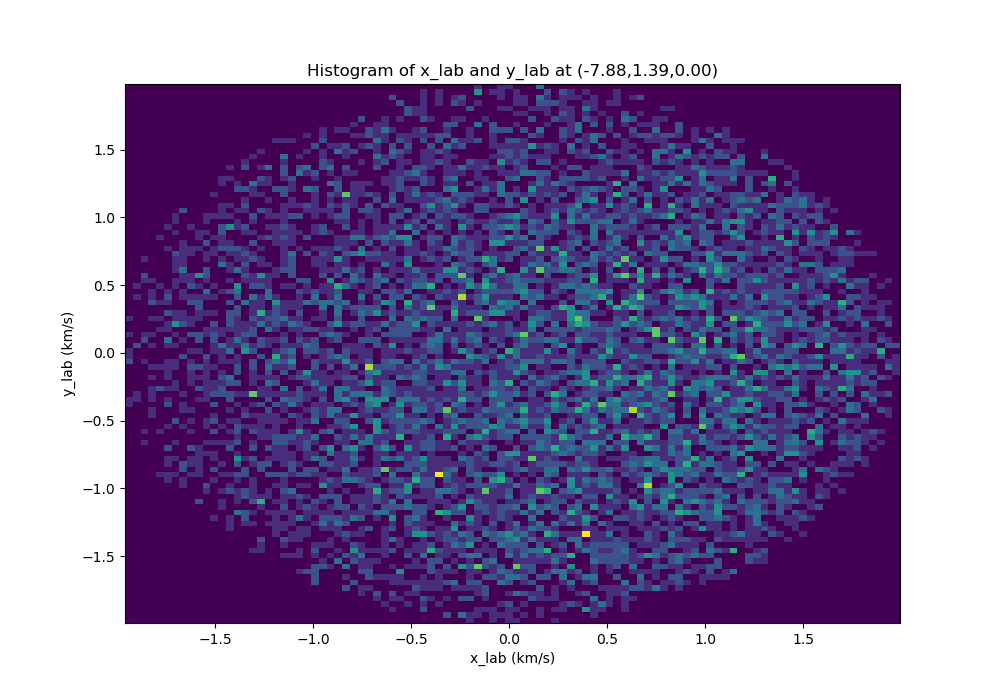

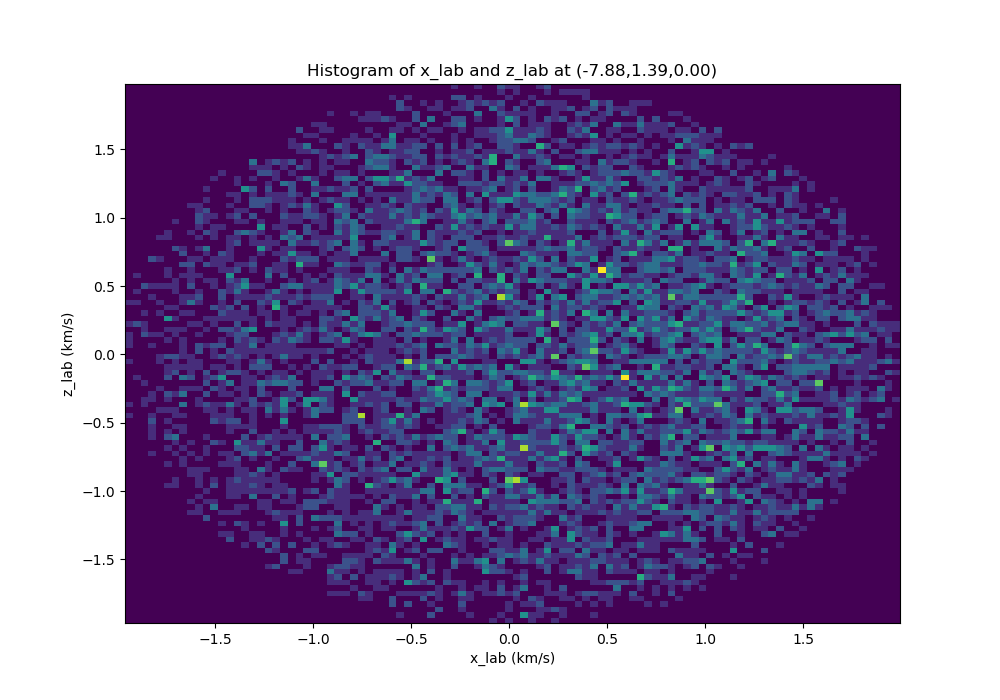

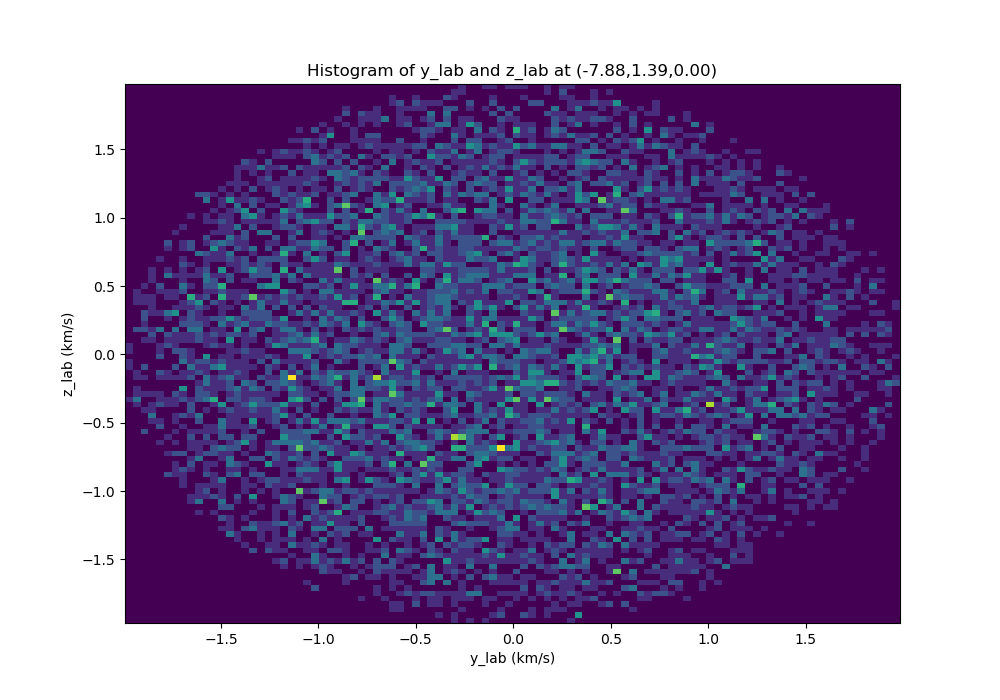

In [71]:
%matplotlib widget
import h5py
import time
import numpy as np
import matplotlib.pyplot as plt
import math
from IPython.display import clear_output

clear_output()


'''
Importing positions and velocities in Earth frame ===========================================================================
'''
theta=170

from datetime import date

base_date = date(2022, 3, 22)
current_date = date(2022, 3, 22)
t = (current_date - base_date).days

v_E = 29.79*(
    math.cos( ( (2*math.pi)/365 ) * t) * np.array([0.9941, 0.188, 0.0042]) +
    math.sin( ( (2*math.pi)/365 ) * t) * np.array([-0.0504, 0.4946, -0.8677])
)

v_PEC = np.array([11.1, 12.2, 7.3])

v_LSR = np.array([0, 220, 0])


# cylindrical coordinates (vR, vPhi, vz)
v_E_total = v_E + v_PEC + v_LSR

snapshot = 'm12i' # m12i or m12f or m12m

f = h5py.File(snapshot+"_darkmatter.hdf5", 'r')

# get particle positions (galaxy) as N x 3 array
pos = np.array(f.get('position'))
x = pos[:,0]
y = pos[:,1]
z = pos[:,2]

# get particle velocities (galaxy) as N x 3 array
vel = np.array(f.get('velocity'))
vx = vel[:,0]
vy = vel[:,1]
vz = vel[:,2]


x_lab = x-8*math.cos(theta*math.pi/180)
y_lab = y-8*math.sin(theta*math.pi/180)
z_lab = z


position_filter = np.sqrt(x_lab**2 + y_lab**2 + z_lab**2) <= 2

vR = (vx*x+vy*y)/np.sqrt(x**2 + y**2)

vPhi = (x*vy - y*vx)/np.sqrt(x**2 + y**2)
#vPhi > 0 means clockwise rotation

x_lab = x_lab[position_filter]
y_lab = y_lab[position_filter]
z_lab = z_lab[position_filter]

'''
=============================================================================================================================
'''


#---------------------------------------------------------------------------------------------------------------------------

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)

plt.hist2d(x_lab, y_lab, bins=100)
plt.title('Histogram of x_lab and y_lab at ({:.2f},{:.2f},{:.2f})'.format(8*math.cos(theta*math.pi/180),8*math.sin(theta*math.pi/180),0))
plt.xlabel('x_lab (km/s)')
plt.ylabel('y_lab (km/s)')



plt.show()

#---------------------------------------------------------------------------------------------------------------------------

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)

plt.hist2d(x_lab, z_lab, bins=100)
plt.title('Histogram of x_lab and z_lab at ({:.2f},{:.2f},{:.2f})'.format(8*math.cos(theta*math.pi/180),8*math.sin(theta*math.pi/180),0))
plt.xlabel('x_lab (km/s)')
plt.ylabel('z_lab (km/s)')


plt.show()

#---------------------------------------------------------------------------------------------------------------------------

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)


plt.hist2d(y_lab, z_lab, bins=100)
plt.title('Histogram of y_lab and z_lab at ({:.2f},{:.2f},{:.2f})'.format(8*math.cos(theta*math.pi/180),8*math.sin(theta*math.pi/180),0))
plt.xlabel('y_lab (km/s)')
plt.ylabel('z_lab (km/s)')
plt.show()


# We see that the stream is at       190 <= vPhi <= 225,
#                                   -470 <=  vR  <= -445,
#                                   -120 <=  vz  <= -100

## Figure 55 (Scatterplots)

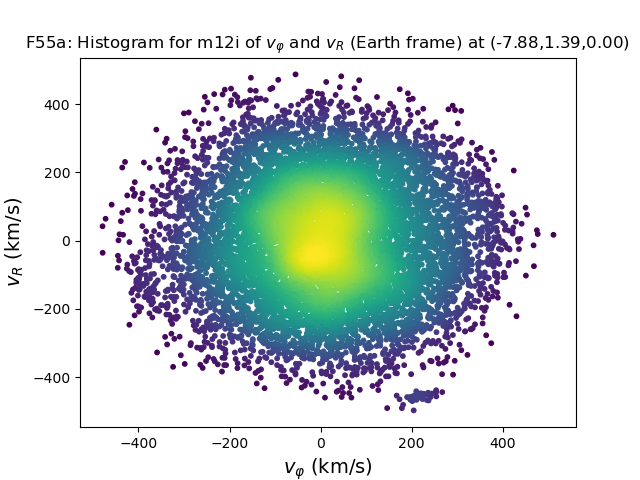

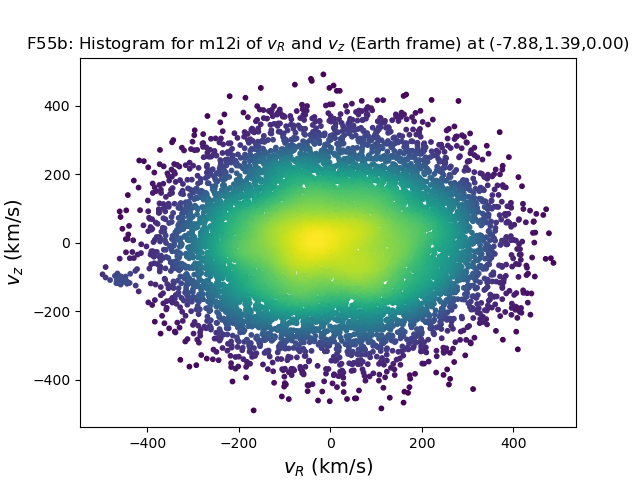

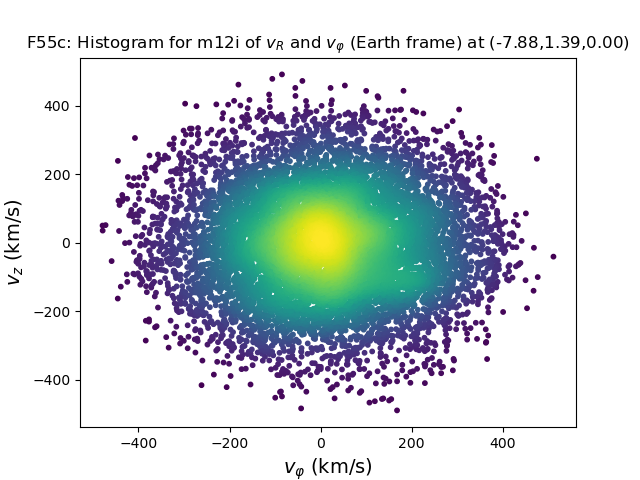

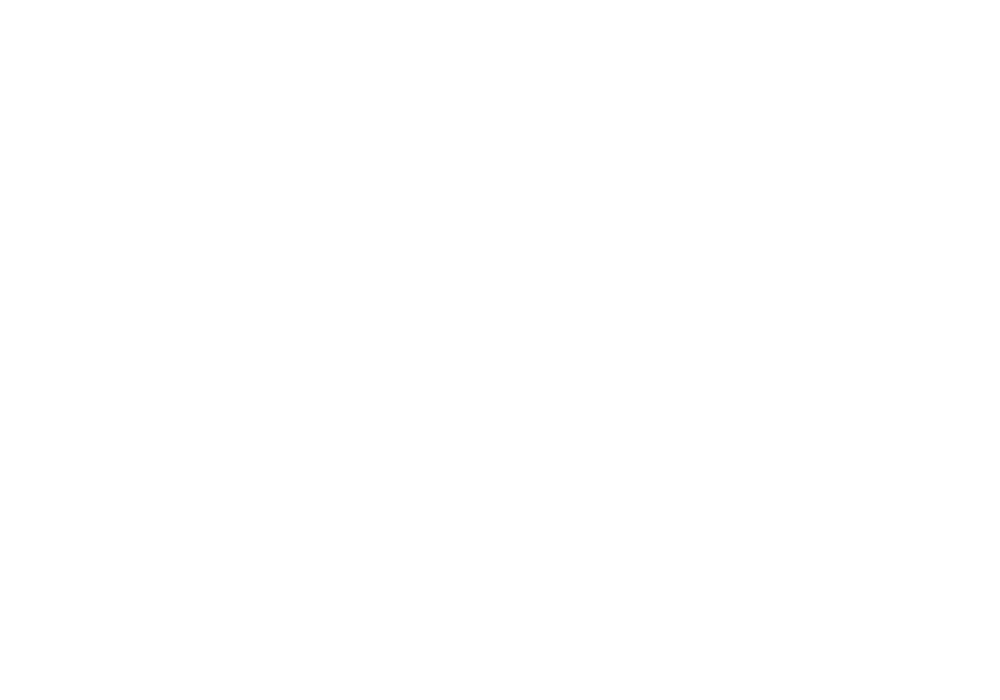

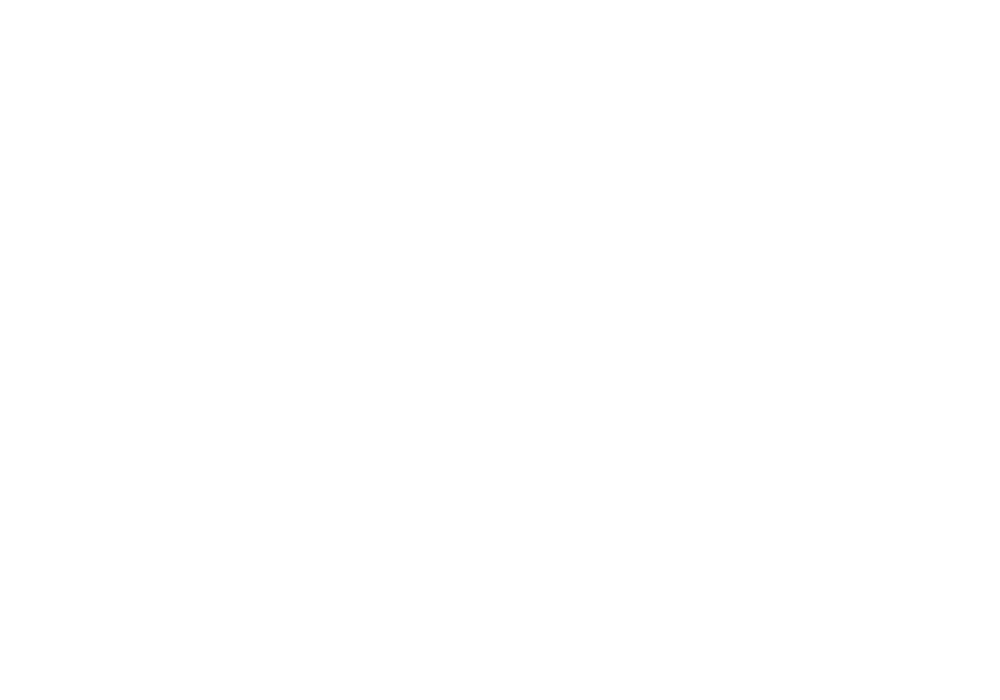

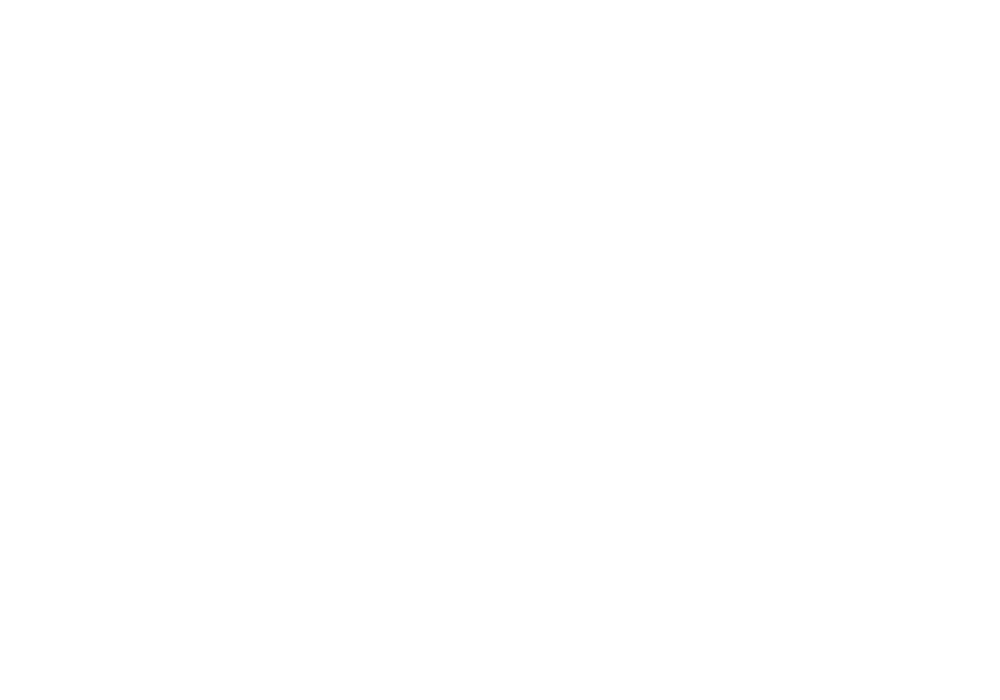

In [10]:
%matplotlib widget
import h5py
import time
import numpy as np
import matplotlib.pyplot as plt
import math
from IPython.display import clear_output
from scipy.stats import gaussian_kde

clear_output()


'''
Importing positions and velocities in Earth frame ===========================================================================
'''
theta=170
snapshot = 'm12i' # m12i or m12f or m12m

from datetime import date

base_date = date(2022, 3, 22)
current_date = date(2022, 3, 22)
t = (current_date - base_date).days

v_E = 29.79*(
    math.cos( ( (2*math.pi)/365 ) * t) * np.array([0.9941, 0.188, 0.0042]) +
    math.sin( ( (2*math.pi)/365 ) * t) * np.array([-0.0504, 0.4946, -0.8677])
)

v_PEC = np.array([11.1, 12.2, 7.3])

v_LSR = np.array([0, 220, 0])


# cylindrical coordinates (vR, vPhi, vz)
v_E_total = v_E + v_PEC + v_LSR


f = h5py.File(snapshot+"_darkmatter.hdf5", 'r')

# get particle positions (galaxy) as N x 3 array
pos = np.array(f.get('position'))
x = pos[:,0]
y = pos[:,1]
z = pos[:,2]

# get particle velocities (galaxy) as N x 3 array
vel = np.array(f.get('velocity'))
vx = vel[:,0]
vy = vel[:,1]
vz = vel[:,2]


x_lab = x-8*math.cos(theta*math.pi/180)
y_lab = y-8*math.sin(theta*math.pi/180)
z_lab = z


position_filter = np.sqrt(x_lab**2 + y_lab**2 + z_lab**2) <= 2

vR = (vx*x+vy*y)/np.sqrt(x**2 + y**2)

vPhi = (x*vy - y*vx)/np.sqrt(x**2 + y**2)
#vPhi > 0 means clockwise rotation

vR = vR[position_filter]
vPhi = vPhi[position_filter]
vz = vz[position_filter]

'''
=============================================================================================================================
'''

point_size = 10

#----------------------------------------------------------------------------------------------------------------------------

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)

# Calculate the point density
xy = np.vstack([vPhi,vR])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = vPhi[idx], vR[idx], z[idx]

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=point_size)
plt.title('F55a: Histogram for ' + snapshot + ' of ' + r'$v_\varphi$' + ' and $v_R$ (Earth frame) at ({:.2f},{:.2f},{:.2f})'.format(8*math.cos(theta*math.pi/180),8*math.sin(theta*math.pi/180),0))
plt.xlabel(r'$v_\varphi$' + ' (km/s)', fontsize=14)
plt.ylabel('$v_R$ (km/s)', fontsize=14)

plt.show()

#----------------------------------------------------------------------------------------------------------------------------


f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)

# Calculate the point density
xy = np.vstack([vR,vz])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = vR[idx], vz[idx], z[idx]

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=point_size)
plt.title('F55b: Histogram for ' + snapshot + ' of $v_R$ and $v_z$ (Earth frame) at ({:.2f},{:.2f},{:.2f})'.format(8*math.cos(theta*math.pi/180),8*math.sin(theta*math.pi/180),0))
plt.xlabel(r'$v_R$' + ' (km/s)', fontsize=14)
plt.ylabel('$v_z$ (km/s)', fontsize=14)

plt.show()

#----------------------------------------------------------------------------------------------------------------------------


f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)

# Calculate the point density
xy = np.vstack([vPhi,vz])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = vPhi[idx], vz[idx], z[idx]

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=point_size)
plt.title('F55c: Histogram for ' + snapshot + ' of $v_R$ and ' + r'$v_\varphi$' + ' (Earth frame) at ({:.2f},{:.2f},{:.2f})'.format(8*math.cos(theta*math.pi/180),8*math.sin(theta*math.pi/180),0))
plt.xlabel(r'$v_\varphi$' + ' (km/s)', fontsize=14)
plt.ylabel('$v_z$ (km/s)', fontsize=14)

plt.show()

#----------------------------------------------------------------------------------------------------------------------------


## Figure 56

Altered version of figure 53a. Changes:
    
    + f_lab_vt function has v^2 input and no longer sqrts v^2 input. i.e. we are actually taking f(v^2). Is this the correct 
      method? NO! f_lab_vt is modelled by a function in terms of v. We must sqrt v^2 to use v in model.

interactive(children=(IntSlider(value=0, description='time', max=365), Button(description='Run Interact', styl…

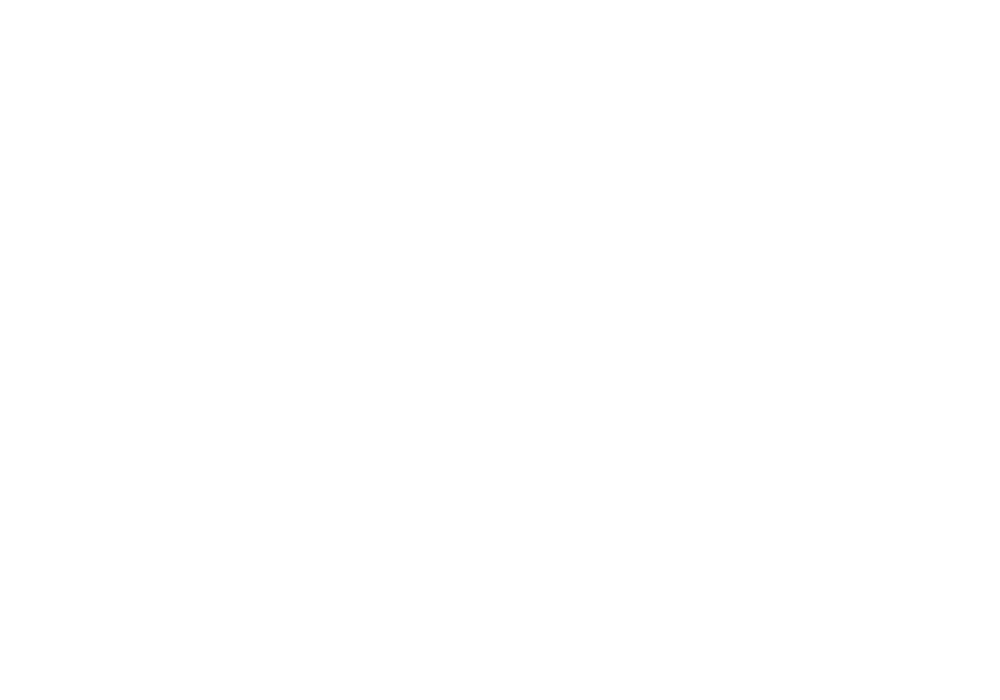

In [5]:
%matplotlib widget
#Speed distribution with sliders for galaxy type and lab/galaxy frame
import h5py
import numpy as np
import math
import matplotlib.pyplot as plt
import ipywidgets as widgets
from datetime import date
from IPython.display import clear_output
import scipy.integrate as integrate
import time as timer

clear_output()

base_date = date(2022, 3, 22)
current_date = date(2022, 3, 22)
t = (current_date - base_date).days

def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    if iteration == total: 
        print()

# The parametrized function to be plotted
def histogram(pos, vel, time, theta, v_E_total):
    x = pos[:,0]
    y = pos[:,1]
    z = pos[:,2]
    
    position_filter = np.sqrt((x-8*math.cos(theta*math.pi/180))**2 + (y-8*math.sin(theta*math.pi/180))**2 + z**2) <= 1.5
    
    
    x = x[position_filter]
    y = y[position_filter]
    z_lab = z[position_filter]
    x_lab = x-8*math.cos(theta*math.pi/180)
    y_lab = y-8*math.sin(theta*math.pi/180)
    
    vx = vel[:,0][position_filter]
    vy = vel[:,1][position_filter]
    vz = vel[:,2][position_filter] - v_E_total[2]
    
    radius = np.sqrt(x**2 + y**2)
    vR = (vx*x+vy*y)/radius - v_E_total[0]
    vPhi = (x*vy - y*vx)/radius + v_E_total[1]
    
    v_lab = np.sqrt(v_E_total[0]**2 + v_E_total[1]**2 + v_E_total[2]**2)
    speeds = np.sqrt(vR**2 + vPhi**2 + vz**2)/299792
    return speeds**2


galaxy_name = 'm12i'  # 'm12i' or 'm12f' or 'm12m'
frame = 'Galaxy'      # 'Galaxy' or 'Lab'


# Reference function to be numerically integrated, comes from eq'n 25 of https://arxiv.org/pdf/1701.03118.pdf
def f_lab_vt(v_gal,time):
    v_E = 29.79*(
        math.cos( ( (2*math.pi)/365 ) * time) * np.array([0.9941, 0.188, 0.0042]) +
        math.sin( ( (2*math.pi)/365 ) * time) * np.array([-0.0504, 0.4946, -0.8677])
    )
    v_PEC_LSR = np.array([11.1, 232.2, 7.3])
    v_E_total = v_E + v_PEC_LSR
    v_0 = 220/299792
    v_lab = np.sqrt(v_E_total[0]**2 + v_E_total[1]**2 + v_E_total[2]**2)/299792
    
    f_lab_vt = ( 2*v_gal*np.exp(-(v_gal**2 + v_lab**2)/(v_0**2))*np.sinh( (2*v_lab*v_gal)/(v_0**2) ) ) / ( math.pi*math.sqrt(math.pi)*v_0*v_lab)
    #normalise integral of f_lab_vt to be 1
    #constant = integrate.quad(f_lab_vt1)...
    return (f_lab_vt**2)

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)

# The function to be called anytime a slider's value changes
@widgets.interact_manual(time=widgets.IntSlider(min=0, max=365, value=0, step=1))
def update(time=0):
    n=10
    bin_num = 17
    thetas = np.linspace(0,360,n)
    colours=['b','g','r']
    for j in range(0,3):
        Galaxy = ['m12i', 'm12f', 'm12m'][j]
        ratios = np.array([])
        
        f = h5py.File(Galaxy+"_darkmatter.hdf5", 'r')
        # get particle positions (Earth) as N x 3 array
        pos = np.array(f.get('position'))
        # get particle velocities (galaxy) as N x 3 array
        vel = np.array(f.get('velocity'))
        
        v_E = 29.79*(
            math.cos( ( (2*math.pi)/365 ) * time) * np.array([0.9941, 0.188, 0.0042]) +
            math.sin( ( (2*math.pi)/365 ) * time) * np.array([-0.0504, 0.4946, -0.8677])
        )
        v_PEC_LSR = np.array([11.1, 232.2, 7.3])
        v_E_total = v_E + v_PEC_LSR
        
        edges = np.linspace(0,6e-6,bin_num+1)
        #Reference integral using eq'n 25 from https://arxiv.org/pdf/1701.03118.pdf
        ref_int = integrate.quad(f_lab_vt, np.min(edges), np.max(edges), args=(time))[0]
        for Theta in thetas:
            x_variable = histogram(pos, vel,time,Theta, v_E_total)
            hist, edges = np.histogram(x_variable, bins=np.linspace(0,6e-6,bin_num+1)) #density = True
            #Histogram is scaled vertically to match eq'n 25 from https://arxiv.org/pdf/1701.03118.pdf
            hist = hist/np.sum(hist)

            #Numerical integral from scaled histogram of data
            num_int = 0
            for i in range(0,len(hist)):
                num_int += hist[i]**2
            ratios = np.append(ratios, num_int/ref_int)
            printProgressBar(Theta,max(thetas),prefix=(Galaxy+" plot progress"), length=90)
        print(np.mean(num_int))
        plt.plot(thetas, ratios, label=Galaxy, color=colours[j], linewidth=0.5)
        plt.plot(thetas, np.repeat(np.mean(ratios),n), linestyle='dashed', alpha=0.5, color=colours[j], linewidth=0.5)
    plt.ylabel(r'$\frac{I_{num}}{I_{ref}}$', fontsize=18)
    plt.xlabel(r'$\theta$' + ' (degrees)', fontsize=18)
    plt.title('Figure 53: ratio of numerical and reference integrals vs ' + r'$\theta$')
    plt.legend()
plt.show()

## EnergySquared

m12i I_num/I_ref =  1.0341457028107597
m12f I_num/I_ref =  1.0453229528142682
m12m I_num/I_ref =  1.2470601682728133


Text(0, 0.5, '$f(\\omega)^2$ [arb. units.]')

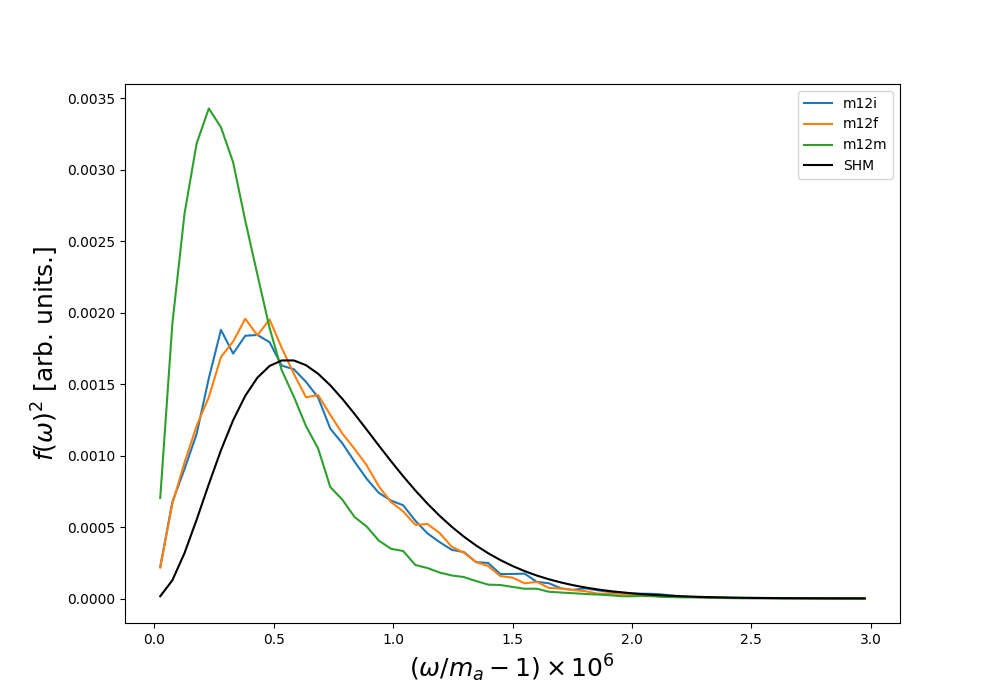

In [25]:
%matplotlib widget
import h5py
import numpy as np
from scipy.stats import binned_statistic_2d
import os
from scipy import stats


FIRE_dir = os.path.expanduser('~/Data/FIRE/')

snapshot = 'm12m'
f = h5py.File(snapshot+"_darkmatter.hdf5", 'r')
pos_m = array(f.get('position'))
vel_m = array(f.get('velocity'))
f.close()

snapshot = 'm12i'
f = h5py.File(snapshot+"_darkmatter.hdf5", 'r')
pos_i = array(f.get('position'))
vel_i = array(f.get('velocity'))
f.close()

snapshot = 'm12f'
f = h5py.File(snapshot+"_darkmatter.hdf5", 'r')
pos_f = array(f.get('position'))
vel_f = array(f.get('velocity'))
f.close()

def freedman_diaconis(data, returnas="width"):
    """
    Use Freedman Diaconis rule to compute optimal histogram bin width. 
    ``returnas`` can be one of "width" or "bins", indicating whether
    the bin width or number of bins should be returned respectively. 


    Parameters
    ----------
    data: np.ndarray
        One-dimensional array.

    returnas: {"width", "bins"}
        If "width", return the estimated width for each histogram bin. 
        If "bins", return the number of bins suggested by rule.
    """
    data = np.asarray(data, dtype=np.float_)
    IQR  = stats.iqr(data, rng=(25, 75), scale=1.0, nan_policy="omit")
    N    = data.size
    bw   = (2 * IQR) / np.power(N, 1/3)

    if returnas=="width":
        result = bw
    else:
        datmin, datmax = data.min(), data.max()
        datrng = datmax - datmin
        result = int((datrng / bw) + 1)
    return(result)

def fOmega_Torus(pos,vel,v_lab=240,R_sun=8.3,r_torus=1.0):
    
    x = pos[:,0]
    y = pos[:,1]
    z = pos[:,2]
    vx = vel[:,0]
    vy = vel[:,1]
    vz = vel[:,2]

    # Torus around solar circle
    mask_torus = (x**2+y**2+z**2-(R_sun**2+r_torus**2))**2 - 4*R_sun**2*(r_torus**2-z**2) < 0

    c = 3e8/1000

    vR = (x*vx + y*vy)/sqrt(x**2+y**2)
    vT = (x*vy - y*vx)/sqrt(x**2+y**2)
    v = sqrt(vz**2+vR**2+(vT+v_lab)**2)
    v2 = 0.5*(v**2/c**2) # technically this is omega/m_a, but since m_a doesn't affect the shape we can just set m_a=1
    nbins = freedman_diaconis(v2, returnas="bins")
    h,w_edges = histogram(v2[mask_torus],bins=linspace(0,3e-6,60)) # nbins from omega = 1 to 1 + 3e-6
    fw = h/sum(h)
    w_bins = (w_edges[1:]+w_edges[0:-1])/2 # bin centers
    return fw,w_bins

fw_i,v2_i = fOmega_Torus(pos_i,vel_i)
fw_f,v2_f = fOmega_Torus(pos_f,vel_f)
fw_m,v2_m = fOmega_Torus(pos_m,vel_m)

# reference distribution
v0 = 220.0
v_lab = 240.0
fv_SHM = lambda v : 2*v*exp(-(v**2+v_lab**2)/v0**2)*((exp(2*v_lab*v/v0**2)-exp(-2*v_lab*v/v0**2))/2)/(sqrt(pi)*v0*v_lab)
v_vals = sqrt(2*(v2_i))*3e5
fw_ref = fv_SHM(v_vals)/sum(fv_SHM(v_vals))


import matplotlib.pyplot as plt

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)

plt.plot(1e6*(v2_i),fw_i**2,label='m12i')
plt.plot(1e6*(v2_f),fw_f**2,label='m12f')
plt.plot(1e6*(v2_m),fw_m**2,label='m12m')
plt.plot(1e6*(v2_i),fw_ref**2,'k-',label='SHM')

plt.legend()

I_ref = sum(fw_ref**2)
print('m12i I_num/I_ref = ',sum(fw_i**2)/I_ref)
print('m12f I_num/I_ref = ',sum(fw_f**2)/I_ref)
print('m12m I_num/I_ref = ',sum(fw_m**2)/I_ref)

plt.xlabel(r'$(\omega/m_a - 1)\times 10^6$', fontsize=18)
plt.ylabel(r'$f(\omega)^2$ [arb. units.]', fontsize=18)


m12i I_num/I_ref =  1.0341457028107597
m12f I_num/I_ref =  1.0453229528142682
m12m I_num/I_ref =  1.2470601682728133


Text(0, 0.5, '$f(\\omega)^2$ [arb. units.]')

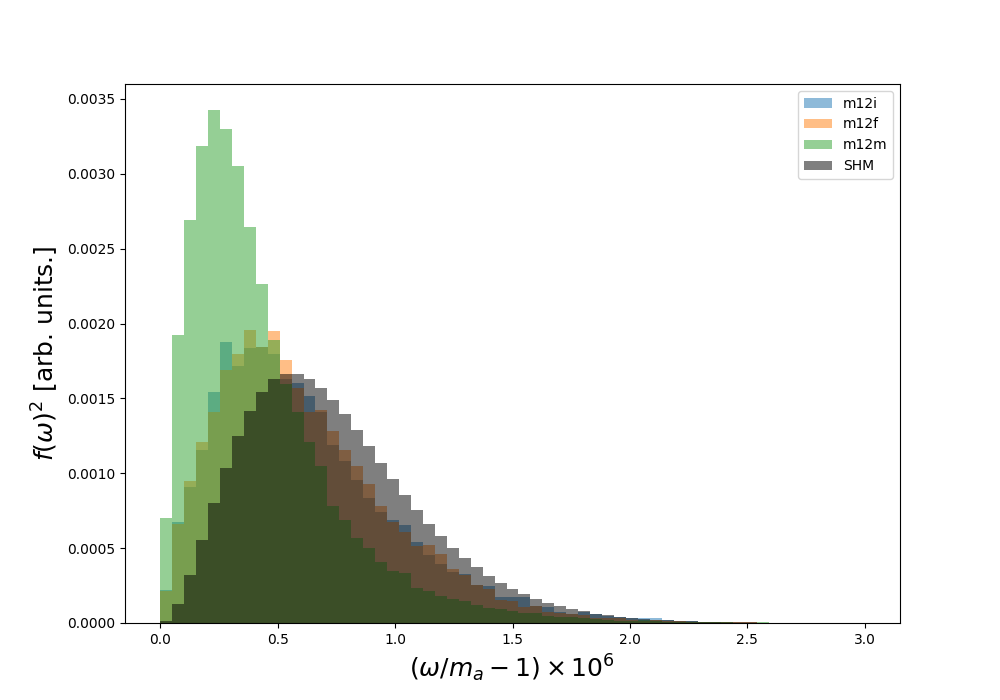

In [24]:
%matplotlib widget
import h5py
import numpy as np
from scipy.stats import binned_statistic_2d
import os
from scipy import stats


FIRE_dir = os.path.expanduser('~/Data/FIRE/')

snapshot = 'm12m'
f = h5py.File(snapshot+"_darkmatter.hdf5", 'r')
pos_m = array(f.get('position'))
vel_m = array(f.get('velocity'))
f.close()

snapshot = 'm12i'
f = h5py.File(snapshot+"_darkmatter.hdf5", 'r')
pos_i = array(f.get('position'))
vel_i = array(f.get('velocity'))
f.close()

snapshot = 'm12f'
f = h5py.File(snapshot+"_darkmatter.hdf5", 'r')
pos_f = array(f.get('position'))
vel_f = array(f.get('velocity'))
f.close()

def freedman_diaconis(data, returnas="width"):
    """
    Use Freedman Diaconis rule to compute optimal histogram bin width. 
    ``returnas`` can be one of "width" or "bins", indicating whether
    the bin width or number of bins should be returned respectively. 


    Parameters
    ----------
    data: np.ndarray
        One-dimensional array.

    returnas: {"width", "bins"}
        If "width", return the estimated width for each histogram bin. 
        If "bins", return the number of bins suggested by rule.
    """
    data = np.asarray(data, dtype=np.float_)
    IQR  = stats.iqr(data, rng=(25, 75), scale=1.0, nan_policy="omit")
    N    = data.size
    bw   = (2 * IQR) / np.power(N, 1/3)

    if returnas=="width":
        result = bw
    else:
        datmin, datmax = data.min(), data.max()
        datrng = datmax - datmin
        result = int((datrng / bw) + 1)
    return(result)

def fOmega_Torus(pos,vel,v_lab=240,R_sun=8.3,r_torus=1.0):
    
    x = pos[:,0]
    y = pos[:,1]
    z = pos[:,2]
    vx = vel[:,0]
    vy = vel[:,1]
    vz = vel[:,2]

    # Torus around solar circle
    mask_torus = (x**2+y**2+z**2-(R_sun**2+r_torus**2))**2 - 4*R_sun**2*(r_torus**2-z**2) < 0

    c = 3e8/1000

    vR = (x*vx + y*vy)/sqrt(x**2+y**2)
    vT = (x*vy - y*vx)/sqrt(x**2+y**2)
    v = sqrt(vz**2+vR**2+(vT+v_lab)**2)
    v2 = 0.5*(v**2/c**2) # technically this is omega/m_a, but since m_a doesn't affect the shape we can just set m_a=1
    nbins = freedman_diaconis(v2, returnas="bins")
    h,w_edges = histogram(v2[mask_torus],bins=linspace(0,3e-6,60)) # nbins from omega = 1 to 1 + 3e-6
    fw = h/sum(h)
    w_bins = (w_edges[1:]+w_edges[0:-1])/2 # bin centers
    return fw,w_bins

fw_i,v2_i = fOmega_Torus(pos_i,vel_i)
fw_f,v2_f = fOmega_Torus(pos_f,vel_f)
fw_m,v2_m = fOmega_Torus(pos_m,vel_m)

# reference distribution
v0 = 220.0
v_lab = 240.0
fv_SHM = lambda v : 2*v*exp(-(v**2+v_lab**2)/v0**2)*((exp(2*v_lab*v/v0**2)-exp(-2*v_lab*v/v0**2))/2)/(sqrt(pi)*v0*v_lab)
v_vals = sqrt(2*(v2_i))*3e5
fw_ref = fv_SHM(v_vals)/sum(fv_SHM(v_vals))


import matplotlib.pyplot as plt

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)

plt.bar(1e6*(v2_i),fw_i**2,label='m12i',alpha=0.5,width=1e6*(v2_i[1]-v2_i[0]))
plt.bar(1e6*(v2_f),fw_f**2,label='m12f',alpha=0.5,width=1e6*(v2_i[1]-v2_i[0]))
plt.bar(1e6*(v2_m),fw_m**2,label='m12m',alpha=0.5,width=1e6*(v2_i[1]-v2_i[0]))
plt.bar(1e6*(v2_i),fw_ref**2,color='black',label='SHM',alpha=0.5,width=1e6*(v2_i[1]-v2_i[0]))

plt.legend()

I_ref = sum(fw_ref**2)
print('m12i I_num/I_ref = ',sum(fw_i**2)/I_ref)
print('m12f I_num/I_ref = ',sum(fw_f**2)/I_ref)
print('m12m I_num/I_ref = ',sum(fw_m**2)/I_ref)

plt.xlabel(r'$(\omega/m_a - 1)\times 10^6$', fontsize=18)
plt.ylabel(r'$f(\omega)^2$ [arb. units.]', fontsize=18)


# End